In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


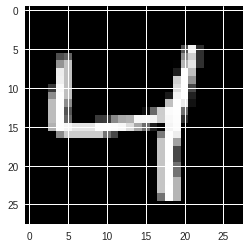

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [0]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images[0].shape[0]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [0]:
# Create the session
sess = tf.Session()

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

('Epoch: 1/20...', 'Training loss: 0.6944')
('Epoch: 1/20...', 'Training loss: 0.6914')
('Epoch: 1/20...', 'Training loss: 0.6888')
('Epoch: 1/20...', 'Training loss: 0.6856')
('Epoch: 1/20...', 'Training loss: 0.6820')
('Epoch: 1/20...', 'Training loss: 0.6773')
('Epoch: 1/20...', 'Training loss: 0.6727')
('Epoch: 1/20...', 'Training loss: 0.6666')
('Epoch: 1/20...', 'Training loss: 0.6576')
('Epoch: 1/20...', 'Training loss: 0.6490')
('Epoch: 1/20...', 'Training loss: 0.6387')
('Epoch: 1/20...', 'Training loss: 0.6261')
('Epoch: 1/20...', 'Training loss: 0.6144')
('Epoch: 1/20...', 'Training loss: 0.5996')
('Epoch: 1/20...', 'Training loss: 0.5841')
('Epoch: 1/20...', 'Training loss: 0.5703')
('Epoch: 1/20...', 'Training loss: 0.5512')
('Epoch: 1/20...', 'Training loss: 0.5369')
('Epoch: 1/20...', 'Training loss: 0.5179')
('Epoch: 1/20...', 'Training loss: 0.5011')
('Epoch: 1/20...', 'Training loss: 0.4824')
('Epoch: 1/20...', 'Training loss: 0.4636')
('Epoch: 1/20...', 'Training los

('Epoch: 2/20...', 'Training loss: 0.1527')
('Epoch: 2/20...', 'Training loss: 0.1536')
('Epoch: 2/20...', 'Training loss: 0.1549')
('Epoch: 2/20...', 'Training loss: 0.1500')
('Epoch: 2/20...', 'Training loss: 0.1580')
('Epoch: 2/20...', 'Training loss: 0.1517')
('Epoch: 2/20...', 'Training loss: 0.1596')
('Epoch: 2/20...', 'Training loss: 0.1515')
('Epoch: 2/20...', 'Training loss: 0.1579')
('Epoch: 2/20...', 'Training loss: 0.1566')
('Epoch: 2/20...', 'Training loss: 0.1549')
('Epoch: 2/20...', 'Training loss: 0.1536')
('Epoch: 2/20...', 'Training loss: 0.1511')
('Epoch: 2/20...', 'Training loss: 0.1513')
('Epoch: 2/20...', 'Training loss: 0.1515')
('Epoch: 2/20...', 'Training loss: 0.1547')
('Epoch: 2/20...', 'Training loss: 0.1503')
('Epoch: 2/20...', 'Training loss: 0.1558')
('Epoch: 2/20...', 'Training loss: 0.1545')
('Epoch: 2/20...', 'Training loss: 0.1541')
('Epoch: 2/20...', 'Training loss: 0.1517')
('Epoch: 2/20...', 'Training loss: 0.1479')
('Epoch: 2/20...', 'Training los

('Epoch: 4/20...', 'Training loss: 0.1193')
('Epoch: 4/20...', 'Training loss: 0.1270')
('Epoch: 4/20...', 'Training loss: 0.1259')
('Epoch: 4/20...', 'Training loss: 0.1221')
('Epoch: 4/20...', 'Training loss: 0.1233')
('Epoch: 4/20...', 'Training loss: 0.1217')
('Epoch: 4/20...', 'Training loss: 0.1245')
('Epoch: 4/20...', 'Training loss: 0.1188')
('Epoch: 4/20...', 'Training loss: 0.1263')
('Epoch: 4/20...', 'Training loss: 0.1204')
('Epoch: 4/20...', 'Training loss: 0.1234')
('Epoch: 4/20...', 'Training loss: 0.1185')
('Epoch: 4/20...', 'Training loss: 0.1235')
('Epoch: 4/20...', 'Training loss: 0.1198')
('Epoch: 4/20...', 'Training loss: 0.1234')
('Epoch: 4/20...', 'Training loss: 0.1209')
('Epoch: 4/20...', 'Training loss: 0.1236')
('Epoch: 4/20...', 'Training loss: 0.1196')
('Epoch: 4/20...', 'Training loss: 0.1159')
('Epoch: 4/20...', 'Training loss: 0.1209')
('Epoch: 4/20...', 'Training loss: 0.1175')
('Epoch: 4/20...', 'Training loss: 0.1226')
('Epoch: 4/20...', 'Training los

('Epoch: 5/20...', 'Training loss: 0.1060')
('Epoch: 5/20...', 'Training loss: 0.1040')
('Epoch: 5/20...', 'Training loss: 0.1016')
('Epoch: 5/20...', 'Training loss: 0.1057')
('Epoch: 5/20...', 'Training loss: 0.1020')
('Epoch: 5/20...', 'Training loss: 0.1057')
('Epoch: 5/20...', 'Training loss: 0.1087')
('Epoch: 5/20...', 'Training loss: 0.1069')
('Epoch: 5/20...', 'Training loss: 0.1031')
('Epoch: 5/20...', 'Training loss: 0.1098')
('Epoch: 5/20...', 'Training loss: 0.1058')
('Epoch: 5/20...', 'Training loss: 0.1061')
('Epoch: 5/20...', 'Training loss: 0.1054')
('Epoch: 5/20...', 'Training loss: 0.1072')
('Epoch: 5/20...', 'Training loss: 0.1070')
('Epoch: 5/20...', 'Training loss: 0.1052')
('Epoch: 5/20...', 'Training loss: 0.1082')
('Epoch: 5/20...', 'Training loss: 0.1044')
('Epoch: 5/20...', 'Training loss: 0.1057')
('Epoch: 5/20...', 'Training loss: 0.1051')
('Epoch: 5/20...', 'Training loss: 0.1058')
('Epoch: 5/20...', 'Training loss: 0.1069')
('Epoch: 5/20...', 'Training los

('Epoch: 7/20...', 'Training loss: 0.0976')
('Epoch: 7/20...', 'Training loss: 0.0934')
('Epoch: 7/20...', 'Training loss: 0.1006')
('Epoch: 7/20...', 'Training loss: 0.0975')
('Epoch: 7/20...', 'Training loss: 0.0979')
('Epoch: 7/20...', 'Training loss: 0.1013')
('Epoch: 7/20...', 'Training loss: 0.0994')
('Epoch: 7/20...', 'Training loss: 0.0988')
('Epoch: 7/20...', 'Training loss: 0.0971')
('Epoch: 7/20...', 'Training loss: 0.0998')
('Epoch: 7/20...', 'Training loss: 0.0957')
('Epoch: 7/20...', 'Training loss: 0.0987')
('Epoch: 7/20...', 'Training loss: 0.0998')
('Epoch: 7/20...', 'Training loss: 0.0999')
('Epoch: 7/20...', 'Training loss: 0.0978')
('Epoch: 7/20...', 'Training loss: 0.0994')
('Epoch: 7/20...', 'Training loss: 0.1001')
('Epoch: 7/20...', 'Training loss: 0.0972')
('Epoch: 7/20...', 'Training loss: 0.1028')
('Epoch: 7/20...', 'Training loss: 0.1010')
('Epoch: 7/20...', 'Training loss: 0.0975')
('Epoch: 7/20...', 'Training loss: 0.0997')
('Epoch: 7/20...', 'Training los

('Epoch: 9/20...', 'Training loss: 0.0933')
('Epoch: 9/20...', 'Training loss: 0.0955')
('Epoch: 9/20...', 'Training loss: 0.0939')
('Epoch: 9/20...', 'Training loss: 0.0934')
('Epoch: 9/20...', 'Training loss: 0.0963')
('Epoch: 9/20...', 'Training loss: 0.0979')
('Epoch: 9/20...', 'Training loss: 0.0968')
('Epoch: 9/20...', 'Training loss: 0.1016')
('Epoch: 9/20...', 'Training loss: 0.0935')
('Epoch: 9/20...', 'Training loss: 0.0950')
('Epoch: 9/20...', 'Training loss: 0.0948')
('Epoch: 9/20...', 'Training loss: 0.0962')
('Epoch: 9/20...', 'Training loss: 0.0955')
('Epoch: 9/20...', 'Training loss: 0.0955')
('Epoch: 9/20...', 'Training loss: 0.0966')
('Epoch: 9/20...', 'Training loss: 0.0963')
('Epoch: 9/20...', 'Training loss: 0.0960')
('Epoch: 9/20...', 'Training loss: 0.0930')
('Epoch: 9/20...', 'Training loss: 0.0967')
('Epoch: 9/20...', 'Training loss: 0.0979')
('Epoch: 9/20...', 'Training loss: 0.0989')
('Epoch: 9/20...', 'Training loss: 0.0947')
('Epoch: 9/20...', 'Training los

('Epoch: 10/20...', 'Training loss: 0.0968')
('Epoch: 10/20...', 'Training loss: 0.0950')
('Epoch: 10/20...', 'Training loss: 0.0956')
('Epoch: 10/20...', 'Training loss: 0.0954')
('Epoch: 10/20...', 'Training loss: 0.0968')
('Epoch: 10/20...', 'Training loss: 0.0936')
('Epoch: 10/20...', 'Training loss: 0.0968')
('Epoch: 10/20...', 'Training loss: 0.0939')
('Epoch: 10/20...', 'Training loss: 0.0966')
('Epoch: 10/20...', 'Training loss: 0.0959')
('Epoch: 10/20...', 'Training loss: 0.0934')
('Epoch: 10/20...', 'Training loss: 0.0955')
('Epoch: 10/20...', 'Training loss: 0.0979')
('Epoch: 10/20...', 'Training loss: 0.0952')
('Epoch: 10/20...', 'Training loss: 0.0941')
('Epoch: 10/20...', 'Training loss: 0.0937')
('Epoch: 10/20...', 'Training loss: 0.0940')
('Epoch: 10/20...', 'Training loss: 0.0964')
('Epoch: 10/20...', 'Training loss: 0.0961')
('Epoch: 10/20...', 'Training loss: 0.0934')
('Epoch: 10/20...', 'Training loss: 0.0935')
('Epoch: 10/20...', 'Training loss: 0.0937')
('Epoch: 1

('Epoch: 12/20...', 'Training loss: 0.0930')
('Epoch: 12/20...', 'Training loss: 0.0967')
('Epoch: 12/20...', 'Training loss: 0.0932')
('Epoch: 12/20...', 'Training loss: 0.0929')
('Epoch: 12/20...', 'Training loss: 0.0906')
('Epoch: 12/20...', 'Training loss: 0.0978')
('Epoch: 12/20...', 'Training loss: 0.0962')
('Epoch: 12/20...', 'Training loss: 0.0916')
('Epoch: 12/20...', 'Training loss: 0.0943')
('Epoch: 12/20...', 'Training loss: 0.0903')
('Epoch: 12/20...', 'Training loss: 0.0924')
('Epoch: 12/20...', 'Training loss: 0.0946')
('Epoch: 12/20...', 'Training loss: 0.0927')
('Epoch: 12/20...', 'Training loss: 0.0921')
('Epoch: 12/20...', 'Training loss: 0.0959')
('Epoch: 12/20...', 'Training loss: 0.0950')
('Epoch: 12/20...', 'Training loss: 0.0952')
('Epoch: 12/20...', 'Training loss: 0.0938')
('Epoch: 12/20...', 'Training loss: 0.0944')
('Epoch: 12/20...', 'Training loss: 0.0932')
('Epoch: 12/20...', 'Training loss: 0.0936')
('Epoch: 12/20...', 'Training loss: 0.0956')
('Epoch: 1

('Epoch: 13/20...', 'Training loss: 0.0950')
('Epoch: 13/20...', 'Training loss: 0.0919')
('Epoch: 13/20...', 'Training loss: 0.0940')
('Epoch: 13/20...', 'Training loss: 0.0954')
('Epoch: 13/20...', 'Training loss: 0.0948')
('Epoch: 13/20...', 'Training loss: 0.0951')
('Epoch: 13/20...', 'Training loss: 0.0939')
('Epoch: 14/20...', 'Training loss: 0.0936')
('Epoch: 14/20...', 'Training loss: 0.0946')
('Epoch: 14/20...', 'Training loss: 0.0905')
('Epoch: 14/20...', 'Training loss: 0.0935')
('Epoch: 14/20...', 'Training loss: 0.0938')
('Epoch: 14/20...', 'Training loss: 0.0908')
('Epoch: 14/20...', 'Training loss: 0.0990')
('Epoch: 14/20...', 'Training loss: 0.0960')
('Epoch: 14/20...', 'Training loss: 0.0967')
('Epoch: 14/20...', 'Training loss: 0.0964')
('Epoch: 14/20...', 'Training loss: 0.0954')
('Epoch: 14/20...', 'Training loss: 0.0965')
('Epoch: 14/20...', 'Training loss: 0.0933')
('Epoch: 14/20...', 'Training loss: 0.0969')
('Epoch: 14/20...', 'Training loss: 0.0927')
('Epoch: 1

('Epoch: 15/20...', 'Training loss: 0.0929')
('Epoch: 15/20...', 'Training loss: 0.0957')
('Epoch: 15/20...', 'Training loss: 0.0878')
('Epoch: 15/20...', 'Training loss: 0.0934')
('Epoch: 15/20...', 'Training loss: 0.0954')
('Epoch: 15/20...', 'Training loss: 0.0955')
('Epoch: 15/20...', 'Training loss: 0.0943')
('Epoch: 15/20...', 'Training loss: 0.0939')
('Epoch: 15/20...', 'Training loss: 0.0932')
('Epoch: 15/20...', 'Training loss: 0.0980')
('Epoch: 15/20...', 'Training loss: 0.0942')
('Epoch: 15/20...', 'Training loss: 0.0925')
('Epoch: 15/20...', 'Training loss: 0.0954')
('Epoch: 15/20...', 'Training loss: 0.0959')
('Epoch: 15/20...', 'Training loss: 0.0927')
('Epoch: 15/20...', 'Training loss: 0.0945')
('Epoch: 15/20...', 'Training loss: 0.0907')
('Epoch: 15/20...', 'Training loss: 0.0942')
('Epoch: 15/20...', 'Training loss: 0.0956')
('Epoch: 15/20...', 'Training loss: 0.0955')
('Epoch: 15/20...', 'Training loss: 0.0933')
('Epoch: 15/20...', 'Training loss: 0.0928')
('Epoch: 1

('Epoch: 17/20...', 'Training loss: 0.0900')
('Epoch: 17/20...', 'Training loss: 0.0951')
('Epoch: 17/20...', 'Training loss: 0.0933')
('Epoch: 17/20...', 'Training loss: 0.0936')
('Epoch: 17/20...', 'Training loss: 0.0935')
('Epoch: 17/20...', 'Training loss: 0.0926')
('Epoch: 17/20...', 'Training loss: 0.0952')
('Epoch: 17/20...', 'Training loss: 0.0983')
('Epoch: 17/20...', 'Training loss: 0.0946')
('Epoch: 17/20...', 'Training loss: 0.0936')
('Epoch: 17/20...', 'Training loss: 0.0933')
('Epoch: 17/20...', 'Training loss: 0.0925')
('Epoch: 17/20...', 'Training loss: 0.0972')
('Epoch: 17/20...', 'Training loss: 0.0930')
('Epoch: 17/20...', 'Training loss: 0.0957')
('Epoch: 17/20...', 'Training loss: 0.0914')
('Epoch: 17/20...', 'Training loss: 0.0930')
('Epoch: 17/20...', 'Training loss: 0.0920')
('Epoch: 17/20...', 'Training loss: 0.0926')
('Epoch: 17/20...', 'Training loss: 0.0942')
('Epoch: 17/20...', 'Training loss: 0.0926')
('Epoch: 17/20...', 'Training loss: 0.0928')
('Epoch: 1

('Epoch: 18/20...', 'Training loss: 0.0909')
('Epoch: 18/20...', 'Training loss: 0.0912')
('Epoch: 18/20...', 'Training loss: 0.0958')
('Epoch: 18/20...', 'Training loss: 0.0947')
('Epoch: 18/20...', 'Training loss: 0.0938')
('Epoch: 18/20...', 'Training loss: 0.0898')
('Epoch: 18/20...', 'Training loss: 0.0918')
('Epoch: 18/20...', 'Training loss: 0.0949')
('Epoch: 18/20...', 'Training loss: 0.0967')
('Epoch: 18/20...', 'Training loss: 0.0927')
('Epoch: 18/20...', 'Training loss: 0.0888')
('Epoch: 18/20...', 'Training loss: 0.0968')
('Epoch: 18/20...', 'Training loss: 0.0923')
('Epoch: 18/20...', 'Training loss: 0.0913')
('Epoch: 18/20...', 'Training loss: 0.0963')
('Epoch: 18/20...', 'Training loss: 0.0938')
('Epoch: 18/20...', 'Training loss: 0.0921')
('Epoch: 18/20...', 'Training loss: 0.0950')
('Epoch: 18/20...', 'Training loss: 0.0957')
('Epoch: 18/20...', 'Training loss: 0.0959')
('Epoch: 18/20...', 'Training loss: 0.0945')
('Epoch: 18/20...', 'Training loss: 0.0933')
('Epoch: 1

('Epoch: 20/20...', 'Training loss: 0.0976')
('Epoch: 20/20...', 'Training loss: 0.0941')
('Epoch: 20/20...', 'Training loss: 0.0964')
('Epoch: 20/20...', 'Training loss: 0.0944')
('Epoch: 20/20...', 'Training loss: 0.0936')
('Epoch: 20/20...', 'Training loss: 0.0920')
('Epoch: 20/20...', 'Training loss: 0.0935')
('Epoch: 20/20...', 'Training loss: 0.0949')
('Epoch: 20/20...', 'Training loss: 0.0935')
('Epoch: 20/20...', 'Training loss: 0.0925')
('Epoch: 20/20...', 'Training loss: 0.0947')
('Epoch: 20/20...', 'Training loss: 0.0948')
('Epoch: 20/20...', 'Training loss: 0.0990')
('Epoch: 20/20...', 'Training loss: 0.0926')
('Epoch: 20/20...', 'Training loss: 0.0924')
('Epoch: 20/20...', 'Training loss: 0.0957')
('Epoch: 20/20...', 'Training loss: 0.0923')
('Epoch: 20/20...', 'Training loss: 0.0950')
('Epoch: 20/20...', 'Training loss: 0.0917')
('Epoch: 20/20...', 'Training loss: 0.0936')
('Epoch: 20/20...', 'Training loss: 0.0891')
('Epoch: 20/20...', 'Training loss: 0.0974')
('Epoch: 2

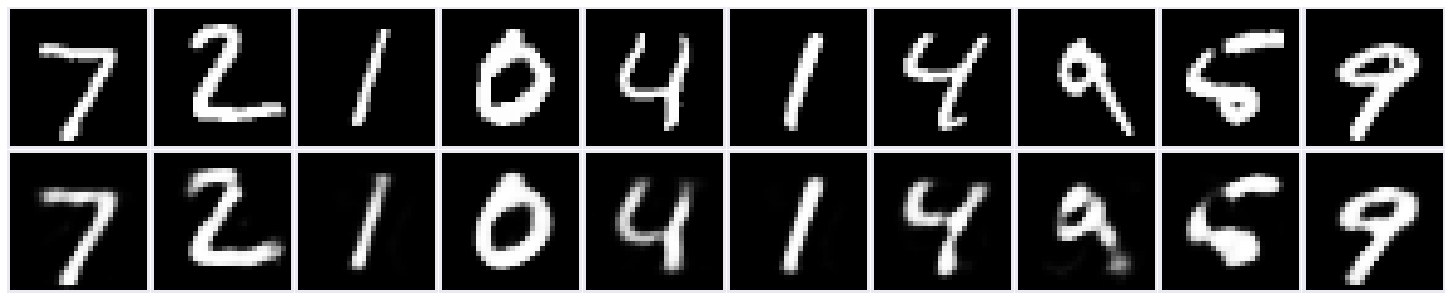

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [0]:
sess.close()

# **Convolutional Autoencoder**

In [0]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


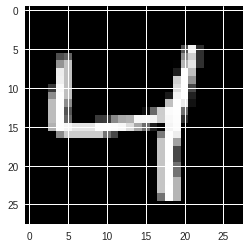

In [12]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [0]:

learning_rate = 0.001

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, 28, 28, 1], name='inputs')
targets_ = tf.placeholder(tf.float32, [None, 28, 28, 1], name='targets')

### Encoder
conv1 = tf.layers.conv2d(inputs_, 16, kernel_size = (3, 3), padding = 'same', activation = tf.nn.relu)
# Now 28x28x16
maxpool1 = tf.layers.max_pooling2d(conv1, pool_size = (2, 2), strides = (2, 2), padding = 'same')
# Now 14x14x16
conv2 = tf.layers.conv2d(maxpool1, 8, kernel_size = (3, 3), padding = 'same', activation = tf.nn.relu)
# Now 14x14x8
maxpool2 = tf.layers.max_pooling2d(conv2, pool_size = (2, 2), strides = (2, 2), padding = 'same')
# Now 7x7x8
conv3 = tf.layers.conv2d(maxpool2, 8, kernel_size = (3, 3), padding = 'same')
# Now 7x7x8
encoded = tf.layers.max_pooling2d(conv3, pool_size=(2,2), strides=(2,2), padding='same')
# Now 4x4x8

### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded, size = (7, 7))
# Now 7x7x8
conv4 = tf.layers.conv2d(upsample1, 8, kernel_size = (3, 3), padding = 'same', activation = tf.nn.relu)
# Now 7x7x8
upsample2 = tf.image.resize_nearest_neighbor(conv4, size = (14, 14))
# Now 14x14x8
conv5 = tf.layers.conv2d(upsample2, 8, kernel_size = (3, 3), padding = 'same', activation = tf.nn.relu)
# Now 14x14x8
upsample3 = tf.image.resize_nearest_neighbor(conv5, size = (28, 28))
# Now 28x28x8
conv6 = tf.layers.conv2d(upsample3, 16, kernel_size = (3, 3), padding = 'same', activation = tf.nn.relu)
# Now 28x28x16

logits = tf.layers.conv2d(conv6, 1, (3, 3), padding = 'same', activation = None)
#Now 28x28x1

# Pass logits through sigmoid to get reconstructed image
decoded = tf.nn.sigmoid(logits, name = 'decoded')

# Pass logits through sigmoid and calculate the cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)

# Get cost and define the optimizer
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [0]:
sess = tf.Session()

In [15]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: imgs,
                                                         targets_: imgs})

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

('Epoch: 1/20...', 'Training loss: 0.6639')
('Epoch: 1/20...', 'Training loss: 0.6506')
('Epoch: 1/20...', 'Training loss: 0.6360')
('Epoch: 1/20...', 'Training loss: 0.6171')
('Epoch: 1/20...', 'Training loss: 0.6009')
('Epoch: 1/20...', 'Training loss: 0.5783')
('Epoch: 1/20...', 'Training loss: 0.5599')
('Epoch: 1/20...', 'Training loss: 0.5391')
('Epoch: 1/20...', 'Training loss: 0.5312')
('Epoch: 1/20...', 'Training loss: 0.5267')
('Epoch: 1/20...', 'Training loss: 0.5205')
('Epoch: 1/20...', 'Training loss: 0.5260')
('Epoch: 1/20...', 'Training loss: 0.5074')
('Epoch: 1/20...', 'Training loss: 0.5034')
('Epoch: 1/20...', 'Training loss: 0.4967')
('Epoch: 1/20...', 'Training loss: 0.4845')
('Epoch: 1/20...', 'Training loss: 0.4751')
('Epoch: 1/20...', 'Training loss: 0.4697')
('Epoch: 1/20...', 'Training loss: 0.4735')
('Epoch: 1/20...', 'Training loss: 0.4573')
('Epoch: 1/20...', 'Training loss: 0.4455')
('Epoch: 1/20...', 'Training loss: 0.4440')
('Epoch: 1/20...', 'Training los

('Epoch: 1/20...', 'Training loss: 0.1606')
('Epoch: 1/20...', 'Training loss: 0.1612')
('Epoch: 1/20...', 'Training loss: 0.1561')
('Epoch: 1/20...', 'Training loss: 0.1597')
('Epoch: 1/20...', 'Training loss: 0.1583')
('Epoch: 1/20...', 'Training loss: 0.1614')
('Epoch: 1/20...', 'Training loss: 0.1586')
('Epoch: 1/20...', 'Training loss: 0.1557')
('Epoch: 1/20...', 'Training loss: 0.1625')
('Epoch: 1/20...', 'Training loss: 0.1597')
('Epoch: 1/20...', 'Training loss: 0.1588')
('Epoch: 1/20...', 'Training loss: 0.1549')
('Epoch: 1/20...', 'Training loss: 0.1553')
('Epoch: 1/20...', 'Training loss: 0.1500')
('Epoch: 1/20...', 'Training loss: 0.1560')
('Epoch: 1/20...', 'Training loss: 0.1558')
('Epoch: 1/20...', 'Training loss: 0.1543')
('Epoch: 1/20...', 'Training loss: 0.1547')
('Epoch: 1/20...', 'Training loss: 0.1586')
('Epoch: 1/20...', 'Training loss: 0.1541')
('Epoch: 1/20...', 'Training loss: 0.1580')
('Epoch: 1/20...', 'Training loss: 0.1490')
('Epoch: 1/20...', 'Training los

('Epoch: 2/20...', 'Training loss: 0.1369')
('Epoch: 2/20...', 'Training loss: 0.1399')
('Epoch: 2/20...', 'Training loss: 0.1353')
('Epoch: 2/20...', 'Training loss: 0.1378')
('Epoch: 2/20...', 'Training loss: 0.1326')
('Epoch: 2/20...', 'Training loss: 0.1341')
('Epoch: 2/20...', 'Training loss: 0.1330')
('Epoch: 2/20...', 'Training loss: 0.1327')
('Epoch: 2/20...', 'Training loss: 0.1367')
('Epoch: 2/20...', 'Training loss: 0.1361')
('Epoch: 2/20...', 'Training loss: 0.1374')
('Epoch: 2/20...', 'Training loss: 0.1353')
('Epoch: 2/20...', 'Training loss: 0.1321')
('Epoch: 2/20...', 'Training loss: 0.1282')
('Epoch: 2/20...', 'Training loss: 0.1351')
('Epoch: 2/20...', 'Training loss: 0.1376')
('Epoch: 2/20...', 'Training loss: 0.1367')
('Epoch: 2/20...', 'Training loss: 0.1311')
('Epoch: 2/20...', 'Training loss: 0.1313')
('Epoch: 2/20...', 'Training loss: 0.1358')
('Epoch: 2/20...', 'Training loss: 0.1404')
('Epoch: 2/20...', 'Training loss: 0.1331')
('Epoch: 2/20...', 'Training los

('Epoch: 3/20...', 'Training loss: 0.1303')
('Epoch: 3/20...', 'Training loss: 0.1252')
('Epoch: 3/20...', 'Training loss: 0.1268')
('Epoch: 3/20...', 'Training loss: 0.1279')
('Epoch: 3/20...', 'Training loss: 0.1260')
('Epoch: 3/20...', 'Training loss: 0.1267')
('Epoch: 3/20...', 'Training loss: 0.1257')
('Epoch: 3/20...', 'Training loss: 0.1226')
('Epoch: 3/20...', 'Training loss: 0.1272')
('Epoch: 3/20...', 'Training loss: 0.1258')
('Epoch: 3/20...', 'Training loss: 0.1266')
('Epoch: 3/20...', 'Training loss: 0.1273')
('Epoch: 3/20...', 'Training loss: 0.1246')
('Epoch: 3/20...', 'Training loss: 0.1285')
('Epoch: 3/20...', 'Training loss: 0.1278')
('Epoch: 3/20...', 'Training loss: 0.1276')
('Epoch: 3/20...', 'Training loss: 0.1233')
('Epoch: 3/20...', 'Training loss: 0.1298')
('Epoch: 3/20...', 'Training loss: 0.1231')
('Epoch: 3/20...', 'Training loss: 0.1301')
('Epoch: 3/20...', 'Training loss: 0.1300')
('Epoch: 3/20...', 'Training loss: 0.1229')
('Epoch: 3/20...', 'Training los

('Epoch: 3/20...', 'Training loss: 0.1237')
('Epoch: 3/20...', 'Training loss: 0.1225')
('Epoch: 3/20...', 'Training loss: 0.1240')
('Epoch: 3/20...', 'Training loss: 0.1212')
('Epoch: 3/20...', 'Training loss: 0.1181')
('Epoch: 3/20...', 'Training loss: 0.1186')
('Epoch: 3/20...', 'Training loss: 0.1195')
('Epoch: 3/20...', 'Training loss: 0.1251')
('Epoch: 3/20...', 'Training loss: 0.1173')
('Epoch: 3/20...', 'Training loss: 0.1181')
('Epoch: 3/20...', 'Training loss: 0.1197')
('Epoch: 3/20...', 'Training loss: 0.1179')
('Epoch: 3/20...', 'Training loss: 0.1217')
('Epoch: 3/20...', 'Training loss: 0.1245')
('Epoch: 3/20...', 'Training loss: 0.1223')
('Epoch: 3/20...', 'Training loss: 0.1225')
('Epoch: 3/20...', 'Training loss: 0.1229')
('Epoch: 3/20...', 'Training loss: 0.1260')
('Epoch: 3/20...', 'Training loss: 0.1239')
('Epoch: 3/20...', 'Training loss: 0.1249')
('Epoch: 3/20...', 'Training loss: 0.1161')
('Epoch: 3/20...', 'Training loss: 0.1205')
('Epoch: 3/20...', 'Training los

('Epoch: 4/20...', 'Training loss: 0.1200')
('Epoch: 4/20...', 'Training loss: 0.1211')
('Epoch: 4/20...', 'Training loss: 0.1189')
('Epoch: 4/20...', 'Training loss: 0.1150')
('Epoch: 4/20...', 'Training loss: 0.1173')
('Epoch: 4/20...', 'Training loss: 0.1140')
('Epoch: 4/20...', 'Training loss: 0.1151')
('Epoch: 4/20...', 'Training loss: 0.1176')
('Epoch: 4/20...', 'Training loss: 0.1197')
('Epoch: 4/20...', 'Training loss: 0.1194')
('Epoch: 4/20...', 'Training loss: 0.1186')
('Epoch: 4/20...', 'Training loss: 0.1184')
('Epoch: 4/20...', 'Training loss: 0.1177')
('Epoch: 4/20...', 'Training loss: 0.1172')
('Epoch: 4/20...', 'Training loss: 0.1165')
('Epoch: 4/20...', 'Training loss: 0.1146')
('Epoch: 4/20...', 'Training loss: 0.1179')
('Epoch: 4/20...', 'Training loss: 0.1180')
('Epoch: 4/20...', 'Training loss: 0.1140')
('Epoch: 4/20...', 'Training loss: 0.1168')
('Epoch: 4/20...', 'Training loss: 0.1144')
('Epoch: 4/20...', 'Training loss: 0.1149')
('Epoch: 4/20...', 'Training los

('Epoch: 5/20...', 'Training loss: 0.1099')
('Epoch: 5/20...', 'Training loss: 0.1111')
('Epoch: 5/20...', 'Training loss: 0.1164')
('Epoch: 5/20...', 'Training loss: 0.1125')
('Epoch: 5/20...', 'Training loss: 0.1108')
('Epoch: 5/20...', 'Training loss: 0.1133')
('Epoch: 5/20...', 'Training loss: 0.1160')
('Epoch: 5/20...', 'Training loss: 0.1126')
('Epoch: 5/20...', 'Training loss: 0.1127')
('Epoch: 5/20...', 'Training loss: 0.1096')
('Epoch: 5/20...', 'Training loss: 0.1108')
('Epoch: 5/20...', 'Training loss: 0.1098')
('Epoch: 5/20...', 'Training loss: 0.1177')
('Epoch: 5/20...', 'Training loss: 0.1159')
('Epoch: 5/20...', 'Training loss: 0.1144')
('Epoch: 5/20...', 'Training loss: 0.1129')
('Epoch: 5/20...', 'Training loss: 0.1145')
('Epoch: 5/20...', 'Training loss: 0.1137')
('Epoch: 5/20...', 'Training loss: 0.1133')
('Epoch: 5/20...', 'Training loss: 0.1131')
('Epoch: 5/20...', 'Training loss: 0.1209')
('Epoch: 5/20...', 'Training loss: 0.1155')
('Epoch: 5/20...', 'Training los

('Epoch: 5/20...', 'Training loss: 0.1142')
('Epoch: 5/20...', 'Training loss: 0.1133')
('Epoch: 5/20...', 'Training loss: 0.1111')
('Epoch: 5/20...', 'Training loss: 0.1127')
('Epoch: 5/20...', 'Training loss: 0.1129')
('Epoch: 5/20...', 'Training loss: 0.1147')
('Epoch: 5/20...', 'Training loss: 0.1109')
('Epoch: 5/20...', 'Training loss: 0.1116')
('Epoch: 5/20...', 'Training loss: 0.1148')
('Epoch: 5/20...', 'Training loss: 0.1154')
('Epoch: 5/20...', 'Training loss: 0.1081')
('Epoch: 5/20...', 'Training loss: 0.1097')
('Epoch: 5/20...', 'Training loss: 0.1111')
('Epoch: 5/20...', 'Training loss: 0.1147')
('Epoch: 5/20...', 'Training loss: 0.1182')
('Epoch: 5/20...', 'Training loss: 0.1101')
('Epoch: 5/20...', 'Training loss: 0.1122')
('Epoch: 5/20...', 'Training loss: 0.1098')
('Epoch: 5/20...', 'Training loss: 0.1099')
('Epoch: 5/20...', 'Training loss: 0.1082')
('Epoch: 5/20...', 'Training loss: 0.1101')
('Epoch: 5/20...', 'Training loss: 0.1110')
('Epoch: 5/20...', 'Training los

('Epoch: 6/20...', 'Training loss: 0.1095')
('Epoch: 6/20...', 'Training loss: 0.1135')
('Epoch: 6/20...', 'Training loss: 0.1150')
('Epoch: 6/20...', 'Training loss: 0.1131')
('Epoch: 6/20...', 'Training loss: 0.1078')
('Epoch: 6/20...', 'Training loss: 0.1113')
('Epoch: 6/20...', 'Training loss: 0.1082')
('Epoch: 6/20...', 'Training loss: 0.1108')
('Epoch: 6/20...', 'Training loss: 0.1081')
('Epoch: 6/20...', 'Training loss: 0.1102')
('Epoch: 6/20...', 'Training loss: 0.1090')
('Epoch: 6/20...', 'Training loss: 0.1125')
('Epoch: 6/20...', 'Training loss: 0.1130')
('Epoch: 6/20...', 'Training loss: 0.1123')
('Epoch: 6/20...', 'Training loss: 0.1102')
('Epoch: 6/20...', 'Training loss: 0.1074')
('Epoch: 6/20...', 'Training loss: 0.1091')
('Epoch: 6/20...', 'Training loss: 0.1114')
('Epoch: 6/20...', 'Training loss: 0.1104')
('Epoch: 6/20...', 'Training loss: 0.1148')
('Epoch: 6/20...', 'Training loss: 0.1114')
('Epoch: 6/20...', 'Training loss: 0.1107')
('Epoch: 6/20...', 'Training los

('Epoch: 7/20...', 'Training loss: 0.1058')
('Epoch: 7/20...', 'Training loss: 0.1079')
('Epoch: 7/20...', 'Training loss: 0.1084')
('Epoch: 7/20...', 'Training loss: 0.1087')
('Epoch: 7/20...', 'Training loss: 0.1094')
('Epoch: 7/20...', 'Training loss: 0.1101')
('Epoch: 7/20...', 'Training loss: 0.1105')
('Epoch: 7/20...', 'Training loss: 0.1069')
('Epoch: 7/20...', 'Training loss: 0.1061')
('Epoch: 7/20...', 'Training loss: 0.1083')
('Epoch: 7/20...', 'Training loss: 0.1057')
('Epoch: 7/20...', 'Training loss: 0.1067')
('Epoch: 7/20...', 'Training loss: 0.1084')
('Epoch: 7/20...', 'Training loss: 0.1077')
('Epoch: 7/20...', 'Training loss: 0.1047')
('Epoch: 7/20...', 'Training loss: 0.1102')
('Epoch: 7/20...', 'Training loss: 0.1090')
('Epoch: 7/20...', 'Training loss: 0.1076')
('Epoch: 7/20...', 'Training loss: 0.1104')
('Epoch: 7/20...', 'Training loss: 0.1062')
('Epoch: 7/20...', 'Training loss: 0.1104')
('Epoch: 7/20...', 'Training loss: 0.1040')
('Epoch: 7/20...', 'Training los

('Epoch: 7/20...', 'Training loss: 0.1079')
('Epoch: 7/20...', 'Training loss: 0.1066')
('Epoch: 7/20...', 'Training loss: 0.1048')
('Epoch: 7/20...', 'Training loss: 0.1042')
('Epoch: 7/20...', 'Training loss: 0.1068')
('Epoch: 7/20...', 'Training loss: 0.1052')
('Epoch: 7/20...', 'Training loss: 0.1031')
('Epoch: 7/20...', 'Training loss: 0.1069')
('Epoch: 7/20...', 'Training loss: 0.1078')
('Epoch: 8/20...', 'Training loss: 0.1099')
('Epoch: 8/20...', 'Training loss: 0.1057')
('Epoch: 8/20...', 'Training loss: 0.1064')
('Epoch: 8/20...', 'Training loss: 0.0999')
('Epoch: 8/20...', 'Training loss: 0.1023')
('Epoch: 8/20...', 'Training loss: 0.1085')
('Epoch: 8/20...', 'Training loss: 0.1082')
('Epoch: 8/20...', 'Training loss: 0.1039')
('Epoch: 8/20...', 'Training loss: 0.1039')
('Epoch: 8/20...', 'Training loss: 0.1074')
('Epoch: 8/20...', 'Training loss: 0.1099')
('Epoch: 8/20...', 'Training loss: 0.1019')
('Epoch: 8/20...', 'Training loss: 0.1051')
('Epoch: 8/20...', 'Training los

('Epoch: 8/20...', 'Training loss: 0.1068')
('Epoch: 8/20...', 'Training loss: 0.1057')
('Epoch: 8/20...', 'Training loss: 0.1067')
('Epoch: 8/20...', 'Training loss: 0.1050')
('Epoch: 8/20...', 'Training loss: 0.1048')
('Epoch: 8/20...', 'Training loss: 0.1048')
('Epoch: 8/20...', 'Training loss: 0.1018')
('Epoch: 8/20...', 'Training loss: 0.1041')
('Epoch: 8/20...', 'Training loss: 0.1067')
('Epoch: 8/20...', 'Training loss: 0.1022')
('Epoch: 8/20...', 'Training loss: 0.1068')
('Epoch: 8/20...', 'Training loss: 0.1076')
('Epoch: 8/20...', 'Training loss: 0.1052')
('Epoch: 8/20...', 'Training loss: 0.1056')
('Epoch: 8/20...', 'Training loss: 0.1017')
('Epoch: 8/20...', 'Training loss: 0.1108')
('Epoch: 8/20...', 'Training loss: 0.1073')
('Epoch: 8/20...', 'Training loss: 0.1076')
('Epoch: 8/20...', 'Training loss: 0.1041')
('Epoch: 8/20...', 'Training loss: 0.1021')
('Epoch: 8/20...', 'Training loss: 0.1026')
('Epoch: 8/20...', 'Training loss: 0.1020')
('Epoch: 8/20...', 'Training los

('Epoch: 9/20...', 'Training loss: 0.0998')
('Epoch: 9/20...', 'Training loss: 0.1043')
('Epoch: 9/20...', 'Training loss: 0.1055')
('Epoch: 9/20...', 'Training loss: 0.1066')
('Epoch: 9/20...', 'Training loss: 0.1051')
('Epoch: 9/20...', 'Training loss: 0.1013')
('Epoch: 9/20...', 'Training loss: 0.1044')
('Epoch: 9/20...', 'Training loss: 0.1051')
('Epoch: 9/20...', 'Training loss: 0.1001')
('Epoch: 9/20...', 'Training loss: 0.1062')
('Epoch: 9/20...', 'Training loss: 0.1020')
('Epoch: 9/20...', 'Training loss: 0.1020')
('Epoch: 9/20...', 'Training loss: 0.1037')
('Epoch: 9/20...', 'Training loss: 0.1094')
('Epoch: 9/20...', 'Training loss: 0.1031')
('Epoch: 9/20...', 'Training loss: 0.1044')
('Epoch: 9/20...', 'Training loss: 0.1044')
('Epoch: 9/20...', 'Training loss: 0.1009')
('Epoch: 9/20...', 'Training loss: 0.1064')
('Epoch: 9/20...', 'Training loss: 0.1053')
('Epoch: 9/20...', 'Training loss: 0.1033')
('Epoch: 9/20...', 'Training loss: 0.1038')
('Epoch: 9/20...', 'Training los

('Epoch: 10/20...', 'Training loss: 0.1068')
('Epoch: 10/20...', 'Training loss: 0.1006')
('Epoch: 10/20...', 'Training loss: 0.1059')
('Epoch: 10/20...', 'Training loss: 0.1012')
('Epoch: 10/20...', 'Training loss: 0.1036')
('Epoch: 10/20...', 'Training loss: 0.1007')
('Epoch: 10/20...', 'Training loss: 0.1027')
('Epoch: 10/20...', 'Training loss: 0.1034')
('Epoch: 10/20...', 'Training loss: 0.1026')
('Epoch: 10/20...', 'Training loss: 0.0997')
('Epoch: 10/20...', 'Training loss: 0.1038')
('Epoch: 10/20...', 'Training loss: 0.1003')
('Epoch: 10/20...', 'Training loss: 0.1019')
('Epoch: 10/20...', 'Training loss: 0.1070')
('Epoch: 10/20...', 'Training loss: 0.1044')
('Epoch: 10/20...', 'Training loss: 0.1037')
('Epoch: 10/20...', 'Training loss: 0.1064')
('Epoch: 10/20...', 'Training loss: 0.1030')
('Epoch: 10/20...', 'Training loss: 0.1017')
('Epoch: 10/20...', 'Training loss: 0.1057')
('Epoch: 10/20...', 'Training loss: 0.1056')
('Epoch: 10/20...', 'Training loss: 0.1021')
('Epoch: 1

('Epoch: 10/20...', 'Training loss: 0.1051')
('Epoch: 10/20...', 'Training loss: 0.1034')
('Epoch: 10/20...', 'Training loss: 0.0996')
('Epoch: 10/20...', 'Training loss: 0.1032')
('Epoch: 10/20...', 'Training loss: 0.1037')
('Epoch: 10/20...', 'Training loss: 0.1017')
('Epoch: 10/20...', 'Training loss: 0.1045')
('Epoch: 10/20...', 'Training loss: 0.1044')
('Epoch: 10/20...', 'Training loss: 0.1024')
('Epoch: 10/20...', 'Training loss: 0.1017')
('Epoch: 10/20...', 'Training loss: 0.1007')
('Epoch: 10/20...', 'Training loss: 0.1033')
('Epoch: 10/20...', 'Training loss: 0.1012')
('Epoch: 10/20...', 'Training loss: 0.0992')
('Epoch: 10/20...', 'Training loss: 0.0983')
('Epoch: 10/20...', 'Training loss: 0.1003')
('Epoch: 10/20...', 'Training loss: 0.1029')
('Epoch: 10/20...', 'Training loss: 0.1015')
('Epoch: 10/20...', 'Training loss: 0.1016')
('Epoch: 10/20...', 'Training loss: 0.1024')
('Epoch: 10/20...', 'Training loss: 0.1002')
('Epoch: 10/20...', 'Training loss: 0.1006')
('Epoch: 1

('Epoch: 11/20...', 'Training loss: 0.1015')
('Epoch: 11/20...', 'Training loss: 0.1021')
('Epoch: 11/20...', 'Training loss: 0.1079')
('Epoch: 11/20...', 'Training loss: 0.1025')
('Epoch: 11/20...', 'Training loss: 0.1002')
('Epoch: 11/20...', 'Training loss: 0.1051')
('Epoch: 11/20...', 'Training loss: 0.1011')
('Epoch: 11/20...', 'Training loss: 0.1025')
('Epoch: 11/20...', 'Training loss: 0.1009')
('Epoch: 11/20...', 'Training loss: 0.1013')
('Epoch: 11/20...', 'Training loss: 0.1051')
('Epoch: 11/20...', 'Training loss: 0.1007')
('Epoch: 11/20...', 'Training loss: 0.1017')
('Epoch: 11/20...', 'Training loss: 0.1008')
('Epoch: 11/20...', 'Training loss: 0.1023')
('Epoch: 11/20...', 'Training loss: 0.1030')
('Epoch: 11/20...', 'Training loss: 0.1025')
('Epoch: 11/20...', 'Training loss: 0.0969')
('Epoch: 11/20...', 'Training loss: 0.0993')
('Epoch: 11/20...', 'Training loss: 0.0992')
('Epoch: 11/20...', 'Training loss: 0.1001')
('Epoch: 11/20...', 'Training loss: 0.1008')
('Epoch: 1

('Epoch: 12/20...', 'Training loss: 0.1029')
('Epoch: 12/20...', 'Training loss: 0.1017')
('Epoch: 12/20...', 'Training loss: 0.1042')
('Epoch: 12/20...', 'Training loss: 0.0978')
('Epoch: 12/20...', 'Training loss: 0.0988')
('Epoch: 12/20...', 'Training loss: 0.1026')
('Epoch: 12/20...', 'Training loss: 0.1004')
('Epoch: 12/20...', 'Training loss: 0.1013')
('Epoch: 12/20...', 'Training loss: 0.0996')
('Epoch: 12/20...', 'Training loss: 0.1028')
('Epoch: 12/20...', 'Training loss: 0.1024')
('Epoch: 12/20...', 'Training loss: 0.0994')
('Epoch: 12/20...', 'Training loss: 0.0994')
('Epoch: 12/20...', 'Training loss: 0.0989')
('Epoch: 12/20...', 'Training loss: 0.1007')
('Epoch: 12/20...', 'Training loss: 0.1008')
('Epoch: 12/20...', 'Training loss: 0.0986')
('Epoch: 12/20...', 'Training loss: 0.1024')
('Epoch: 12/20...', 'Training loss: 0.0987')
('Epoch: 12/20...', 'Training loss: 0.1012')
('Epoch: 12/20...', 'Training loss: 0.0976')
('Epoch: 12/20...', 'Training loss: 0.1023')
('Epoch: 1

('Epoch: 12/20...', 'Training loss: 0.1011')
('Epoch: 12/20...', 'Training loss: 0.0981')
('Epoch: 12/20...', 'Training loss: 0.1001')
('Epoch: 12/20...', 'Training loss: 0.1009')
('Epoch: 12/20...', 'Training loss: 0.1001')
('Epoch: 12/20...', 'Training loss: 0.1006')
('Epoch: 12/20...', 'Training loss: 0.1000')
('Epoch: 12/20...', 'Training loss: 0.0993')
('Epoch: 12/20...', 'Training loss: 0.0971')
('Epoch: 12/20...', 'Training loss: 0.0973')
('Epoch: 12/20...', 'Training loss: 0.1045')
('Epoch: 12/20...', 'Training loss: 0.0994')
('Epoch: 12/20...', 'Training loss: 0.1006')
('Epoch: 12/20...', 'Training loss: 0.1042')
('Epoch: 12/20...', 'Training loss: 0.0964')
('Epoch: 12/20...', 'Training loss: 0.0976')
('Epoch: 12/20...', 'Training loss: 0.1000')
('Epoch: 12/20...', 'Training loss: 0.1027')
('Epoch: 12/20...', 'Training loss: 0.1018')
('Epoch: 12/20...', 'Training loss: 0.0965')
('Epoch: 12/20...', 'Training loss: 0.0981')
('Epoch: 12/20...', 'Training loss: 0.1024')
('Epoch: 1

('Epoch: 13/20...', 'Training loss: 0.0990')
('Epoch: 13/20...', 'Training loss: 0.0976')
('Epoch: 13/20...', 'Training loss: 0.1002')
('Epoch: 13/20...', 'Training loss: 0.0993')
('Epoch: 13/20...', 'Training loss: 0.0972')
('Epoch: 13/20...', 'Training loss: 0.0993')
('Epoch: 13/20...', 'Training loss: 0.1029')
('Epoch: 13/20...', 'Training loss: 0.0962')
('Epoch: 13/20...', 'Training loss: 0.1022')
('Epoch: 13/20...', 'Training loss: 0.1058')
('Epoch: 13/20...', 'Training loss: 0.1009')
('Epoch: 13/20...', 'Training loss: 0.0946')
('Epoch: 13/20...', 'Training loss: 0.1020')
('Epoch: 13/20...', 'Training loss: 0.0995')
('Epoch: 13/20...', 'Training loss: 0.0958')
('Epoch: 13/20...', 'Training loss: 0.1004')
('Epoch: 13/20...', 'Training loss: 0.1003')
('Epoch: 13/20...', 'Training loss: 0.0984')
('Epoch: 13/20...', 'Training loss: 0.1025')
('Epoch: 13/20...', 'Training loss: 0.1008')
('Epoch: 13/20...', 'Training loss: 0.0971')
('Epoch: 13/20...', 'Training loss: 0.1025')
('Epoch: 1

('Epoch: 14/20...', 'Training loss: 0.0931')
('Epoch: 14/20...', 'Training loss: 0.0969')
('Epoch: 14/20...', 'Training loss: 0.0983')
('Epoch: 14/20...', 'Training loss: 0.1007')
('Epoch: 14/20...', 'Training loss: 0.0978')
('Epoch: 14/20...', 'Training loss: 0.0950')
('Epoch: 14/20...', 'Training loss: 0.0969')
('Epoch: 14/20...', 'Training loss: 0.1010')
('Epoch: 14/20...', 'Training loss: 0.0982')
('Epoch: 14/20...', 'Training loss: 0.1000')
('Epoch: 14/20...', 'Training loss: 0.1008')
('Epoch: 14/20...', 'Training loss: 0.1028')
('Epoch: 14/20...', 'Training loss: 0.0998')
('Epoch: 14/20...', 'Training loss: 0.0983')
('Epoch: 14/20...', 'Training loss: 0.1023')
('Epoch: 14/20...', 'Training loss: 0.0996')
('Epoch: 14/20...', 'Training loss: 0.0996')
('Epoch: 14/20...', 'Training loss: 0.0961')
('Epoch: 14/20...', 'Training loss: 0.0998')
('Epoch: 14/20...', 'Training loss: 0.1000')
('Epoch: 14/20...', 'Training loss: 0.1004')
('Epoch: 14/20...', 'Training loss: 0.0963')
('Epoch: 1

('Epoch: 14/20...', 'Training loss: 0.1002')
('Epoch: 14/20...', 'Training loss: 0.0985')
('Epoch: 14/20...', 'Training loss: 0.1002')
('Epoch: 14/20...', 'Training loss: 0.0999')
('Epoch: 14/20...', 'Training loss: 0.0982')
('Epoch: 14/20...', 'Training loss: 0.0979')
('Epoch: 14/20...', 'Training loss: 0.0964')
('Epoch: 14/20...', 'Training loss: 0.0966')
('Epoch: 14/20...', 'Training loss: 0.0974')
('Epoch: 14/20...', 'Training loss: 0.0937')
('Epoch: 14/20...', 'Training loss: 0.0963')
('Epoch: 14/20...', 'Training loss: 0.0998')
('Epoch: 14/20...', 'Training loss: 0.0968')
('Epoch: 14/20...', 'Training loss: 0.0987')
('Epoch: 14/20...', 'Training loss: 0.0971')
('Epoch: 14/20...', 'Training loss: 0.0986')
('Epoch: 14/20...', 'Training loss: 0.0992')
('Epoch: 14/20...', 'Training loss: 0.0968')
('Epoch: 14/20...', 'Training loss: 0.0997')
('Epoch: 14/20...', 'Training loss: 0.0979')
('Epoch: 14/20...', 'Training loss: 0.1005')
('Epoch: 14/20...', 'Training loss: 0.0970')
('Epoch: 1

('Epoch: 15/20...', 'Training loss: 0.1011')
('Epoch: 15/20...', 'Training loss: 0.0998')
('Epoch: 15/20...', 'Training loss: 0.0986')
('Epoch: 15/20...', 'Training loss: 0.1021')
('Epoch: 15/20...', 'Training loss: 0.1000')
('Epoch: 15/20...', 'Training loss: 0.0983')
('Epoch: 15/20...', 'Training loss: 0.0974')
('Epoch: 15/20...', 'Training loss: 0.0947')
('Epoch: 15/20...', 'Training loss: 0.1009')
('Epoch: 15/20...', 'Training loss: 0.0979')
('Epoch: 15/20...', 'Training loss: 0.0961')
('Epoch: 15/20...', 'Training loss: 0.0971')
('Epoch: 15/20...', 'Training loss: 0.0982')
('Epoch: 15/20...', 'Training loss: 0.1001')
('Epoch: 15/20...', 'Training loss: 0.0974')
('Epoch: 15/20...', 'Training loss: 0.0980')
('Epoch: 15/20...', 'Training loss: 0.0959')
('Epoch: 15/20...', 'Training loss: 0.0988')
('Epoch: 15/20...', 'Training loss: 0.1007')
('Epoch: 15/20...', 'Training loss: 0.0984')
('Epoch: 15/20...', 'Training loss: 0.1004')
('Epoch: 15/20...', 'Training loss: 0.0975')
('Epoch: 1

('Epoch: 16/20...', 'Training loss: 0.1009')
('Epoch: 16/20...', 'Training loss: 0.0963')
('Epoch: 16/20...', 'Training loss: 0.0976')
('Epoch: 16/20...', 'Training loss: 0.0969')
('Epoch: 16/20...', 'Training loss: 0.0969')
('Epoch: 16/20...', 'Training loss: 0.0991')
('Epoch: 16/20...', 'Training loss: 0.0977')
('Epoch: 16/20...', 'Training loss: 0.0988')
('Epoch: 16/20...', 'Training loss: 0.0973')
('Epoch: 16/20...', 'Training loss: 0.0967')
('Epoch: 16/20...', 'Training loss: 0.0979')
('Epoch: 16/20...', 'Training loss: 0.0933')
('Epoch: 16/20...', 'Training loss: 0.0984')
('Epoch: 16/20...', 'Training loss: 0.0986')
('Epoch: 16/20...', 'Training loss: 0.0981')
('Epoch: 16/20...', 'Training loss: 0.0998')
('Epoch: 16/20...', 'Training loss: 0.0977')
('Epoch: 16/20...', 'Training loss: 0.0978')
('Epoch: 16/20...', 'Training loss: 0.0971')
('Epoch: 16/20...', 'Training loss: 0.0982')
('Epoch: 16/20...', 'Training loss: 0.0983')
('Epoch: 16/20...', 'Training loss: 0.0971')
('Epoch: 1

('Epoch: 16/20...', 'Training loss: 0.0950')
('Epoch: 16/20...', 'Training loss: 0.0986')
('Epoch: 16/20...', 'Training loss: 0.0993')
('Epoch: 17/20...', 'Training loss: 0.0981')
('Epoch: 17/20...', 'Training loss: 0.0982')
('Epoch: 17/20...', 'Training loss: 0.0970')
('Epoch: 17/20...', 'Training loss: 0.0994')
('Epoch: 17/20...', 'Training loss: 0.0965')
('Epoch: 17/20...', 'Training loss: 0.0948')
('Epoch: 17/20...', 'Training loss: 0.0972')
('Epoch: 17/20...', 'Training loss: 0.0980')
('Epoch: 17/20...', 'Training loss: 0.0967')
('Epoch: 17/20...', 'Training loss: 0.0979')
('Epoch: 17/20...', 'Training loss: 0.0973')
('Epoch: 17/20...', 'Training loss: 0.0971')
('Epoch: 17/20...', 'Training loss: 0.0988')
('Epoch: 17/20...', 'Training loss: 0.1006')
('Epoch: 17/20...', 'Training loss: 0.0981')
('Epoch: 17/20...', 'Training loss: 0.0946')
('Epoch: 17/20...', 'Training loss: 0.0924')
('Epoch: 17/20...', 'Training loss: 0.0927')
('Epoch: 17/20...', 'Training loss: 0.1005')
('Epoch: 1

('Epoch: 17/20...', 'Training loss: 0.0983')
('Epoch: 17/20...', 'Training loss: 0.0946')
('Epoch: 17/20...', 'Training loss: 0.0987')
('Epoch: 17/20...', 'Training loss: 0.0980')
('Epoch: 17/20...', 'Training loss: 0.0953')
('Epoch: 17/20...', 'Training loss: 0.1005')
('Epoch: 17/20...', 'Training loss: 0.0960')
('Epoch: 17/20...', 'Training loss: 0.0944')
('Epoch: 17/20...', 'Training loss: 0.1003')
('Epoch: 17/20...', 'Training loss: 0.0934')
('Epoch: 17/20...', 'Training loss: 0.0979')
('Epoch: 17/20...', 'Training loss: 0.0992')
('Epoch: 17/20...', 'Training loss: 0.0976')
('Epoch: 17/20...', 'Training loss: 0.1015')
('Epoch: 17/20...', 'Training loss: 0.0981')
('Epoch: 17/20...', 'Training loss: 0.0996')
('Epoch: 17/20...', 'Training loss: 0.0922')
('Epoch: 17/20...', 'Training loss: 0.0962')
('Epoch: 17/20...', 'Training loss: 0.0985')
('Epoch: 17/20...', 'Training loss: 0.0966')
('Epoch: 17/20...', 'Training loss: 0.0959')
('Epoch: 17/20...', 'Training loss: 0.0951')
('Epoch: 1

('Epoch: 18/20...', 'Training loss: 0.0962')
('Epoch: 18/20...', 'Training loss: 0.0969')
('Epoch: 18/20...', 'Training loss: 0.0963')
('Epoch: 18/20...', 'Training loss: 0.0986')
('Epoch: 18/20...', 'Training loss: 0.0978')
('Epoch: 18/20...', 'Training loss: 0.0955')
('Epoch: 18/20...', 'Training loss: 0.0934')
('Epoch: 18/20...', 'Training loss: 0.0956')
('Epoch: 18/20...', 'Training loss: 0.0972')
('Epoch: 18/20...', 'Training loss: 0.1012')
('Epoch: 18/20...', 'Training loss: 0.0965')
('Epoch: 18/20...', 'Training loss: 0.0961')
('Epoch: 18/20...', 'Training loss: 0.0975')
('Epoch: 18/20...', 'Training loss: 0.0974')
('Epoch: 18/20...', 'Training loss: 0.0957')
('Epoch: 18/20...', 'Training loss: 0.0954')
('Epoch: 18/20...', 'Training loss: 0.0983')
('Epoch: 18/20...', 'Training loss: 0.0931')
('Epoch: 18/20...', 'Training loss: 0.0949')
('Epoch: 18/20...', 'Training loss: 0.0941')
('Epoch: 18/20...', 'Training loss: 0.0957')
('Epoch: 18/20...', 'Training loss: 0.0986')
('Epoch: 1

('Epoch: 19/20...', 'Training loss: 0.1000')
('Epoch: 19/20...', 'Training loss: 0.0985')
('Epoch: 19/20...', 'Training loss: 0.0921')
('Epoch: 19/20...', 'Training loss: 0.0983')
('Epoch: 19/20...', 'Training loss: 0.0957')
('Epoch: 19/20...', 'Training loss: 0.1022')
('Epoch: 19/20...', 'Training loss: 0.0954')
('Epoch: 19/20...', 'Training loss: 0.0980')
('Epoch: 19/20...', 'Training loss: 0.0966')
('Epoch: 19/20...', 'Training loss: 0.0931')
('Epoch: 19/20...', 'Training loss: 0.0945')
('Epoch: 19/20...', 'Training loss: 0.0969')
('Epoch: 19/20...', 'Training loss: 0.0957')
('Epoch: 19/20...', 'Training loss: 0.0964')
('Epoch: 19/20...', 'Training loss: 0.0955')
('Epoch: 19/20...', 'Training loss: 0.0986')
('Epoch: 19/20...', 'Training loss: 0.0987')
('Epoch: 19/20...', 'Training loss: 0.0939')
('Epoch: 19/20...', 'Training loss: 0.1011')
('Epoch: 19/20...', 'Training loss: 0.0945')
('Epoch: 19/20...', 'Training loss: 0.0960')
('Epoch: 19/20...', 'Training loss: 0.0989')
('Epoch: 1

('Epoch: 19/20...', 'Training loss: 0.0956')
('Epoch: 19/20...', 'Training loss: 0.0980')
('Epoch: 19/20...', 'Training loss: 0.0952')
('Epoch: 19/20...', 'Training loss: 0.0987')
('Epoch: 19/20...', 'Training loss: 0.0941')
('Epoch: 19/20...', 'Training loss: 0.0957')
('Epoch: 19/20...', 'Training loss: 0.0975')
('Epoch: 19/20...', 'Training loss: 0.0988')
('Epoch: 19/20...', 'Training loss: 0.0974')
('Epoch: 19/20...', 'Training loss: 0.0950')
('Epoch: 19/20...', 'Training loss: 0.0948')
('Epoch: 19/20...', 'Training loss: 0.0965')
('Epoch: 19/20...', 'Training loss: 0.0948')
('Epoch: 19/20...', 'Training loss: 0.0960')
('Epoch: 19/20...', 'Training loss: 0.0956')
('Epoch: 19/20...', 'Training loss: 0.1000')
('Epoch: 19/20...', 'Training loss: 0.0947')
('Epoch: 19/20...', 'Training loss: 0.0936')
('Epoch: 19/20...', 'Training loss: 0.0965')
('Epoch: 19/20...', 'Training loss: 0.0947')
('Epoch: 19/20...', 'Training loss: 0.0950')
('Epoch: 19/20...', 'Training loss: 0.0962')
('Epoch: 1

('Epoch: 20/20...', 'Training loss: 0.0952')
('Epoch: 20/20...', 'Training loss: 0.0949')
('Epoch: 20/20...', 'Training loss: 0.0961')
('Epoch: 20/20...', 'Training loss: 0.0953')
('Epoch: 20/20...', 'Training loss: 0.0935')
('Epoch: 20/20...', 'Training loss: 0.0984')
('Epoch: 20/20...', 'Training loss: 0.0962')
('Epoch: 20/20...', 'Training loss: 0.0934')
('Epoch: 20/20...', 'Training loss: 0.0951')
('Epoch: 20/20...', 'Training loss: 0.0977')
('Epoch: 20/20...', 'Training loss: 0.0969')
('Epoch: 20/20...', 'Training loss: 0.0953')
('Epoch: 20/20...', 'Training loss: 0.0967')
('Epoch: 20/20...', 'Training loss: 0.0974')
('Epoch: 20/20...', 'Training loss: 0.0980')
('Epoch: 20/20...', 'Training loss: 0.0952')
('Epoch: 20/20...', 'Training loss: 0.0980')
('Epoch: 20/20...', 'Training loss: 0.0980')
('Epoch: 20/20...', 'Training loss: 0.0958')
('Epoch: 20/20...', 'Training loss: 0.0977')
('Epoch: 20/20...', 'Training loss: 0.0958')
('Epoch: 20/20...', 'Training loss: 0.0950')
('Epoch: 2

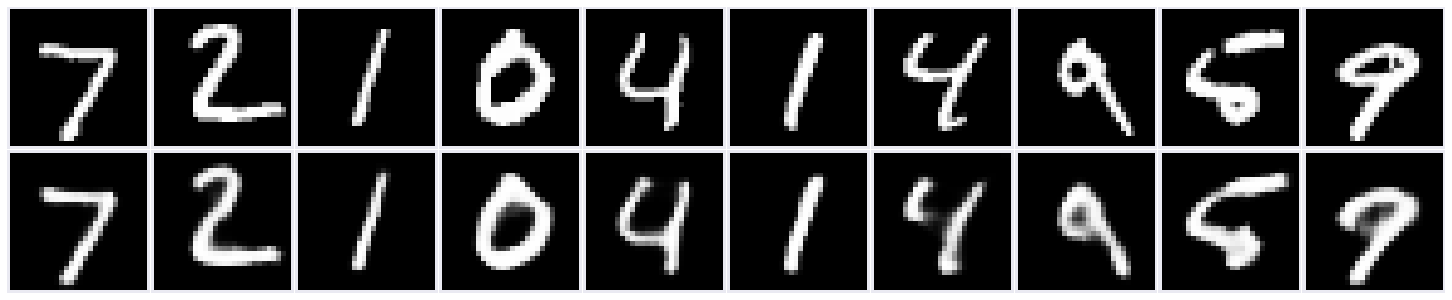

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict={inputs_: in_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad=0.1)

In [0]:
sess.close()

# **Denoising**

In [0]:
learning_rate = 0.001
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

### Encoder
conv1 = tf.layers.conv2d(inputs_, filters=32, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x32
maxpool1 = tf.layers.max_pooling2d(conv1, pool_size=(2,2), strides=(2,2), padding='same')
# Now 14x14x32
conv2 = tf.layers.conv2d(maxpool1, filters=32, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x32
maxpool2 = tf.layers.max_pooling2d(conv2, pool_size=(2,2), strides=(2,2), padding='same')
# Now 7x7x32
conv3 = tf.layers.conv2d(maxpool2, 16, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x16
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
# Now 4x4x16

### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
# Now 7x7x16
conv4 = tf.layers.conv2d(upsample1, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x16
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# Now 14x14x16
conv5 = tf.layers.conv2d(upsample2, 32, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x32
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
# Now 28x28x32
conv6 = tf.layers.conv2d(upsample3, 32, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x32

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)
#Now 28x28x1

# Pass logits through sigmoid to get reconstructed image
decoded = tf.nn.sigmoid(logits, name='decoded')

# Pass logits through sigmoid and calculate the cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)

# Get cost and define the optimizer
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [0]:
sess = tf.Session()

In [20]:
epochs = 100
batch_size = 200
# Set's how much noise we're adding to the MNIST images
noise_factor = 0.5
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        # Get images from the batch
        imgs = batch[0].reshape((-1, 28, 28, 1))
        
        # Add random noise to the input images
        noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        
        # Noisy images as inputs, original images as targets
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: noisy_imgs,
                                                         targets_: imgs})

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

('Epoch: 1/100...', 'Training loss: 0.7010')
('Epoch: 1/100...', 'Training loss: 0.6871')
('Epoch: 1/100...', 'Training loss: 0.6781')
('Epoch: 1/100...', 'Training loss: 0.6621')
('Epoch: 1/100...', 'Training loss: 0.6382')
('Epoch: 1/100...', 'Training loss: 0.6042')
('Epoch: 1/100...', 'Training loss: 0.5563')
('Epoch: 1/100...', 'Training loss: 0.5184')
('Epoch: 1/100...', 'Training loss: 0.4966')
('Epoch: 1/100...', 'Training loss: 0.5278')
('Epoch: 1/100...', 'Training loss: 0.5314')
('Epoch: 1/100...', 'Training loss: 0.5126')
('Epoch: 1/100...', 'Training loss: 0.4978')
('Epoch: 1/100...', 'Training loss: 0.4682')
('Epoch: 1/100...', 'Training loss: 0.4597')
('Epoch: 1/100...', 'Training loss: 0.4556')
('Epoch: 1/100...', 'Training loss: 0.4588')
('Epoch: 1/100...', 'Training loss: 0.4395')
('Epoch: 1/100...', 'Training loss: 0.4260')
('Epoch: 1/100...', 'Training loss: 0.3997')
('Epoch: 1/100...', 'Training loss: 0.3985')
('Epoch: 1/100...', 'Training loss: 0.3912')
('Epoch: 1

('Epoch: 1/100...', 'Training loss: 0.1907')
('Epoch: 1/100...', 'Training loss: 0.1967')
('Epoch: 1/100...', 'Training loss: 0.1824')
('Epoch: 1/100...', 'Training loss: 0.1821')
('Epoch: 1/100...', 'Training loss: 0.1875')
('Epoch: 1/100...', 'Training loss: 0.1856')
('Epoch: 1/100...', 'Training loss: 0.1854')
('Epoch: 1/100...', 'Training loss: 0.1859')
('Epoch: 1/100...', 'Training loss: 0.1862')
('Epoch: 1/100...', 'Training loss: 0.1784')
('Epoch: 1/100...', 'Training loss: 0.1877')
('Epoch: 1/100...', 'Training loss: 0.1842')
('Epoch: 1/100...', 'Training loss: 0.1862')
('Epoch: 1/100...', 'Training loss: 0.1882')
('Epoch: 1/100...', 'Training loss: 0.1843')
('Epoch: 1/100...', 'Training loss: 0.1830')
('Epoch: 1/100...', 'Training loss: 0.1855')
('Epoch: 1/100...', 'Training loss: 0.1794')
('Epoch: 1/100...', 'Training loss: 0.1782')
('Epoch: 1/100...', 'Training loss: 0.1791')
('Epoch: 1/100...', 'Training loss: 0.1787')
('Epoch: 1/100...', 'Training loss: 0.1861')
('Epoch: 1

('Epoch: 2/100...', 'Training loss: 0.1604')
('Epoch: 2/100...', 'Training loss: 0.1693')
('Epoch: 2/100...', 'Training loss: 0.1590')
('Epoch: 2/100...', 'Training loss: 0.1681')
('Epoch: 2/100...', 'Training loss: 0.1640')
('Epoch: 2/100...', 'Training loss: 0.1642')
('Epoch: 2/100...', 'Training loss: 0.1599')
('Epoch: 2/100...', 'Training loss: 0.1660')
('Epoch: 2/100...', 'Training loss: 0.1588')
('Epoch: 2/100...', 'Training loss: 0.1605')
('Epoch: 2/100...', 'Training loss: 0.1625')
('Epoch: 2/100...', 'Training loss: 0.1630')
('Epoch: 2/100...', 'Training loss: 0.1584')
('Epoch: 2/100...', 'Training loss: 0.1612')
('Epoch: 2/100...', 'Training loss: 0.1631')
('Epoch: 2/100...', 'Training loss: 0.1604')
('Epoch: 2/100...', 'Training loss: 0.1621')
('Epoch: 2/100...', 'Training loss: 0.1673')
('Epoch: 2/100...', 'Training loss: 0.1608')
('Epoch: 2/100...', 'Training loss: 0.1592')
('Epoch: 2/100...', 'Training loss: 0.1609')
('Epoch: 2/100...', 'Training loss: 0.1587')
('Epoch: 2

('Epoch: 2/100...', 'Training loss: 0.1549')
('Epoch: 2/100...', 'Training loss: 0.1548')
('Epoch: 2/100...', 'Training loss: 0.1506')
('Epoch: 2/100...', 'Training loss: 0.1517')
('Epoch: 2/100...', 'Training loss: 0.1503')
('Epoch: 2/100...', 'Training loss: 0.1470')
('Epoch: 2/100...', 'Training loss: 0.1503')
('Epoch: 2/100...', 'Training loss: 0.1472')
('Epoch: 2/100...', 'Training loss: 0.1444')
('Epoch: 2/100...', 'Training loss: 0.1518')
('Epoch: 2/100...', 'Training loss: 0.1522')
('Epoch: 2/100...', 'Training loss: 0.1528')
('Epoch: 2/100...', 'Training loss: 0.1501')
('Epoch: 2/100...', 'Training loss: 0.1477')
('Epoch: 2/100...', 'Training loss: 0.1500')
('Epoch: 2/100...', 'Training loss: 0.1470')
('Epoch: 2/100...', 'Training loss: 0.1506')
('Epoch: 2/100...', 'Training loss: 0.1512')
('Epoch: 2/100...', 'Training loss: 0.1515')
('Epoch: 2/100...', 'Training loss: 0.1522')
('Epoch: 2/100...', 'Training loss: 0.1439')
('Epoch: 2/100...', 'Training loss: 0.1500')
('Epoch: 2

('Epoch: 3/100...', 'Training loss: 0.1466')
('Epoch: 3/100...', 'Training loss: 0.1377')
('Epoch: 3/100...', 'Training loss: 0.1408')
('Epoch: 3/100...', 'Training loss: 0.1449')
('Epoch: 3/100...', 'Training loss: 0.1398')
('Epoch: 3/100...', 'Training loss: 0.1408')
('Epoch: 3/100...', 'Training loss: 0.1441')
('Epoch: 3/100...', 'Training loss: 0.1403')
('Epoch: 3/100...', 'Training loss: 0.1405')
('Epoch: 3/100...', 'Training loss: 0.1462')
('Epoch: 3/100...', 'Training loss: 0.1410')
('Epoch: 3/100...', 'Training loss: 0.1442')
('Epoch: 3/100...', 'Training loss: 0.1428')
('Epoch: 3/100...', 'Training loss: 0.1383')
('Epoch: 3/100...', 'Training loss: 0.1393')
('Epoch: 3/100...', 'Training loss: 0.1378')
('Epoch: 3/100...', 'Training loss: 0.1422')
('Epoch: 3/100...', 'Training loss: 0.1449')
('Epoch: 3/100...', 'Training loss: 0.1389')
('Epoch: 3/100...', 'Training loss: 0.1497')
('Epoch: 3/100...', 'Training loss: 0.1415')
('Epoch: 3/100...', 'Training loss: 0.1406')
('Epoch: 3


('Epoch: 3/100...', 'Training loss: 0.1385')
('Epoch: 3/100...', 'Training loss: 0.1320')
('Epoch: 3/100...', 'Training loss: 0.1380')
('Epoch: 3/100...', 'Training loss: 0.1391')
('Epoch: 3/100...', 'Training loss: 0.1375')
('Epoch: 3/100...', 'Training loss: 0.1326')
('Epoch: 3/100...', 'Training loss: 0.1339')
('Epoch: 3/100...', 'Training loss: 0.1379')
('Epoch: 3/100...', 'Training loss: 0.1353')
('Epoch: 3/100...', 'Training loss: 0.1348')
('Epoch: 3/100...', 'Training loss: 0.1391')
('Epoch: 3/100...', 'Training loss: 0.1379')
('Epoch: 3/100...', 'Training loss: 0.1343')
('Epoch: 3/100...', 'Training loss: 0.1351')
('Epoch: 3/100...', 'Training loss: 0.1392')
('Epoch: 3/100...', 'Training loss: 0.1407')
('Epoch: 3/100...', 'Training loss: 0.1413')
('Epoch: 3/100...', 'Training loss: 0.1361')
('Epoch: 3/100...', 'Training loss: 0.1330')
('Epoch: 3/100...', 'Training loss: 0.1346')
('Epoch: 3/100...', 'Training loss: 0.1377')
('Epoch: 3/100...', 'Training loss: 0.1347')
('Epoch: 

('Epoch: 4/100...', 'Training loss: 0.1341')
('Epoch: 4/100...', 'Training loss: 0.1376')
('Epoch: 4/100...', 'Training loss: 0.1314')
('Epoch: 4/100...', 'Training loss: 0.1309')
('Epoch: 4/100...', 'Training loss: 0.1334')
('Epoch: 4/100...', 'Training loss: 0.1307')
('Epoch: 4/100...', 'Training loss: 0.1335')
('Epoch: 4/100...', 'Training loss: 0.1333')
('Epoch: 4/100...', 'Training loss: 0.1342')
('Epoch: 4/100...', 'Training loss: 0.1321')
('Epoch: 4/100...', 'Training loss: 0.1307')
('Epoch: 4/100...', 'Training loss: 0.1308')
('Epoch: 4/100...', 'Training loss: 0.1333')
('Epoch: 4/100...', 'Training loss: 0.1325')
('Epoch: 4/100...', 'Training loss: 0.1296')
('Epoch: 4/100...', 'Training loss: 0.1400')
('Epoch: 4/100...', 'Training loss: 0.1298')
('Epoch: 4/100...', 'Training loss: 0.1346')
('Epoch: 4/100...', 'Training loss: 0.1356')
('Epoch: 4/100...', 'Training loss: 0.1386')
('Epoch: 4/100...', 'Training loss: 0.1263')
('Epoch: 4/100...', 'Training loss: 0.1316')
('Epoch: 4

('Epoch: 4/100...', 'Training loss: 0.1305')
('Epoch: 4/100...', 'Training loss: 0.1290')
('Epoch: 4/100...', 'Training loss: 0.1289')
('Epoch: 4/100...', 'Training loss: 0.1313')
('Epoch: 4/100...', 'Training loss: 0.1269')
('Epoch: 4/100...', 'Training loss: 0.1326')
('Epoch: 4/100...', 'Training loss: 0.1358')
('Epoch: 4/100...', 'Training loss: 0.1306')
('Epoch: 4/100...', 'Training loss: 0.1298')
('Epoch: 4/100...', 'Training loss: 0.1279')
('Epoch: 4/100...', 'Training loss: 0.1294')
('Epoch: 4/100...', 'Training loss: 0.1235')
('Epoch: 4/100...', 'Training loss: 0.1289')
('Epoch: 4/100...', 'Training loss: 0.1254')
('Epoch: 4/100...', 'Training loss: 0.1262')
('Epoch: 4/100...', 'Training loss: 0.1255')
('Epoch: 4/100...', 'Training loss: 0.1243')
('Epoch: 4/100...', 'Training loss: 0.1303')
('Epoch: 4/100...', 'Training loss: 0.1261')
('Epoch: 4/100...', 'Training loss: 0.1298')
('Epoch: 4/100...', 'Training loss: 0.1238')
('Epoch: 4/100...', 'Training loss: 0.1290')
('Epoch: 4

('Epoch: 5/100...', 'Training loss: 0.1241')
('Epoch: 5/100...', 'Training loss: 0.1269')
('Epoch: 5/100...', 'Training loss: 0.1240')
('Epoch: 5/100...', 'Training loss: 0.1218')
('Epoch: 5/100...', 'Training loss: 0.1248')
('Epoch: 5/100...', 'Training loss: 0.1302')
('Epoch: 5/100...', 'Training loss: 0.1269')
('Epoch: 5/100...', 'Training loss: 0.1255')
('Epoch: 5/100...', 'Training loss: 0.1274')
('Epoch: 5/100...', 'Training loss: 0.1305')
('Epoch: 5/100...', 'Training loss: 0.1269')
('Epoch: 5/100...', 'Training loss: 0.1276')
('Epoch: 5/100...', 'Training loss: 0.1248')
('Epoch: 5/100...', 'Training loss: 0.1245')
('Epoch: 5/100...', 'Training loss: 0.1252')
('Epoch: 5/100...', 'Training loss: 0.1266')
('Epoch: 5/100...', 'Training loss: 0.1188')
('Epoch: 5/100...', 'Training loss: 0.1258')
('Epoch: 5/100...', 'Training loss: 0.1265')
('Epoch: 5/100...', 'Training loss: 0.1245')
('Epoch: 5/100...', 'Training loss: 0.1287')
('Epoch: 5/100...', 'Training loss: 0.1273')
('Epoch: 5

('Epoch: 5/100...', 'Training loss: 0.1226')
('Epoch: 5/100...', 'Training loss: 0.1249')
('Epoch: 5/100...', 'Training loss: 0.1249')
('Epoch: 5/100...', 'Training loss: 0.1262')
('Epoch: 5/100...', 'Training loss: 0.1198')
('Epoch: 5/100...', 'Training loss: 0.1269')
('Epoch: 5/100...', 'Training loss: 0.1219')
('Epoch: 5/100...', 'Training loss: 0.1239')
('Epoch: 5/100...', 'Training loss: 0.1260')
('Epoch: 5/100...', 'Training loss: 0.1234')
('Epoch: 5/100...', 'Training loss: 0.1204')
('Epoch: 5/100...', 'Training loss: 0.1273')
('Epoch: 5/100...', 'Training loss: 0.1224')
('Epoch: 5/100...', 'Training loss: 0.1228')
('Epoch: 5/100...', 'Training loss: 0.1281')
('Epoch: 5/100...', 'Training loss: 0.1286')
('Epoch: 5/100...', 'Training loss: 0.1233')
('Epoch: 5/100...', 'Training loss: 0.1217')
('Epoch: 5/100...', 'Training loss: 0.1264')
('Epoch: 5/100...', 'Training loss: 0.1235')
('Epoch: 5/100...', 'Training loss: 0.1250')
('Epoch: 5/100...', 'Training loss: 0.1228')
('Epoch: 5

('Epoch: 6/100...', 'Training loss: 0.1204')
('Epoch: 6/100...', 'Training loss: 0.1242')
('Epoch: 6/100...', 'Training loss: 0.1232')
('Epoch: 6/100...', 'Training loss: 0.1204')
('Epoch: 6/100...', 'Training loss: 0.1198')
('Epoch: 6/100...', 'Training loss: 0.1211')
('Epoch: 6/100...', 'Training loss: 0.1215')
('Epoch: 6/100...', 'Training loss: 0.1206')
('Epoch: 6/100...', 'Training loss: 0.1215')
('Epoch: 6/100...', 'Training loss: 0.1253')
('Epoch: 6/100...', 'Training loss: 0.1222')
('Epoch: 6/100...', 'Training loss: 0.1171')
('Epoch: 6/100...', 'Training loss: 0.1187')
('Epoch: 6/100...', 'Training loss: 0.1256')
('Epoch: 6/100...', 'Training loss: 0.1213')
('Epoch: 6/100...', 'Training loss: 0.1220')
('Epoch: 6/100...', 'Training loss: 0.1254')
('Epoch: 6/100...', 'Training loss: 0.1268')
('Epoch: 6/100...', 'Training loss: 0.1189')
('Epoch: 6/100...', 'Training loss: 0.1207')
('Epoch: 6/100...', 'Training loss: 0.1233')
('Epoch: 6/100...', 'Training loss: 0.1257')
('Epoch: 6

('Epoch: 6/100...', 'Training loss: 0.1201')
('Epoch: 6/100...', 'Training loss: 0.1228')
('Epoch: 6/100...', 'Training loss: 0.1216')
('Epoch: 6/100...', 'Training loss: 0.1200')
('Epoch: 6/100...', 'Training loss: 0.1217')
('Epoch: 6/100...', 'Training loss: 0.1184')
('Epoch: 6/100...', 'Training loss: 0.1183')
('Epoch: 6/100...', 'Training loss: 0.1192')
('Epoch: 6/100...', 'Training loss: 0.1210')
('Epoch: 6/100...', 'Training loss: 0.1160')
('Epoch: 6/100...', 'Training loss: 0.1197')
('Epoch: 6/100...', 'Training loss: 0.1261')
('Epoch: 6/100...', 'Training loss: 0.1182')
('Epoch: 6/100...', 'Training loss: 0.1222')
('Epoch: 6/100...', 'Training loss: 0.1204')
('Epoch: 6/100...', 'Training loss: 0.1216')
('Epoch: 6/100...', 'Training loss: 0.1165')
('Epoch: 6/100...', 'Training loss: 0.1194')
('Epoch: 6/100...', 'Training loss: 0.1199')
('Epoch: 6/100...', 'Training loss: 0.1204')
('Epoch: 6/100...', 'Training loss: 0.1226')
('Epoch: 6/100...', 'Training loss: 0.1198')
('Epoch: 6

('Epoch: 7/100...', 'Training loss: 0.1200')
('Epoch: 7/100...', 'Training loss: 0.1171')
('Epoch: 7/100...', 'Training loss: 0.1167')
('Epoch: 7/100...', 'Training loss: 0.1173')
('Epoch: 7/100...', 'Training loss: 0.1231')
('Epoch: 7/100...', 'Training loss: 0.1156')
('Epoch: 7/100...', 'Training loss: 0.1189')
('Epoch: 7/100...', 'Training loss: 0.1194')
('Epoch: 7/100...', 'Training loss: 0.1218')
('Epoch: 7/100...', 'Training loss: 0.1181')
('Epoch: 7/100...', 'Training loss: 0.1206')
('Epoch: 7/100...', 'Training loss: 0.1194')
('Epoch: 7/100...', 'Training loss: 0.1178')
('Epoch: 7/100...', 'Training loss: 0.1182')
('Epoch: 7/100...', 'Training loss: 0.1194')
('Epoch: 7/100...', 'Training loss: 0.1159')
('Epoch: 7/100...', 'Training loss: 0.1236')
('Epoch: 7/100...', 'Training loss: 0.1194')
('Epoch: 7/100...', 'Training loss: 0.1240')
('Epoch: 7/100...', 'Training loss: 0.1190')
('Epoch: 7/100...', 'Training loss: 0.1194')
('Epoch: 7/100...', 'Training loss: 0.1206')
('Epoch: 7

('Epoch: 7/100...', 'Training loss: 0.1113')
('Epoch: 7/100...', 'Training loss: 0.1223')
('Epoch: 7/100...', 'Training loss: 0.1160')
('Epoch: 7/100...', 'Training loss: 0.1186')
('Epoch: 7/100...', 'Training loss: 0.1163')
('Epoch: 7/100...', 'Training loss: 0.1197')
('Epoch: 7/100...', 'Training loss: 0.1197')
('Epoch: 7/100...', 'Training loss: 0.1167')
('Epoch: 7/100...', 'Training loss: 0.1200')
('Epoch: 7/100...', 'Training loss: 0.1175')
('Epoch: 7/100...', 'Training loss: 0.1149')
('Epoch: 7/100...', 'Training loss: 0.1165')
('Epoch: 7/100...', 'Training loss: 0.1205')
('Epoch: 7/100...', 'Training loss: 0.1196')
('Epoch: 7/100...', 'Training loss: 0.1154')
('Epoch: 7/100...', 'Training loss: 0.1156')
('Epoch: 7/100...', 'Training loss: 0.1177')
('Epoch: 7/100...', 'Training loss: 0.1191')
('Epoch: 7/100...', 'Training loss: 0.1131')
('Epoch: 7/100...', 'Training loss: 0.1188')
('Epoch: 7/100...', 'Training loss: 0.1205')
('Epoch: 7/100...', 'Training loss: 0.1162')
('Epoch: 7

('Epoch: 8/100...', 'Training loss: 0.1187')
('Epoch: 8/100...', 'Training loss: 0.1191')
('Epoch: 8/100...', 'Training loss: 0.1151')
('Epoch: 8/100...', 'Training loss: 0.1180')
('Epoch: 8/100...', 'Training loss: 0.1168')
('Epoch: 8/100...', 'Training loss: 0.1172')
('Epoch: 8/100...', 'Training loss: 0.1187')
('Epoch: 8/100...', 'Training loss: 0.1199')
('Epoch: 8/100...', 'Training loss: 0.1139')
('Epoch: 8/100...', 'Training loss: 0.1209')
('Epoch: 8/100...', 'Training loss: 0.1149')
('Epoch: 8/100...', 'Training loss: 0.1148')
('Epoch: 8/100...', 'Training loss: 0.1159')
('Epoch: 8/100...', 'Training loss: 0.1177')
('Epoch: 8/100...', 'Training loss: 0.1148')
('Epoch: 8/100...', 'Training loss: 0.1191')
('Epoch: 8/100...', 'Training loss: 0.1181')
('Epoch: 8/100...', 'Training loss: 0.1220')
('Epoch: 8/100...', 'Training loss: 0.1201')
('Epoch: 8/100...', 'Training loss: 0.1167')
('Epoch: 8/100...', 'Training loss: 0.1226')
('Epoch: 8/100...', 'Training loss: 0.1204')
('Epoch: 8

('Epoch: 8/100...', 'Training loss: 0.1141')
('Epoch: 8/100...', 'Training loss: 0.1139')
('Epoch: 8/100...', 'Training loss: 0.1163')
('Epoch: 8/100...', 'Training loss: 0.1143')
('Epoch: 8/100...', 'Training loss: 0.1149')
('Epoch: 8/100...', 'Training loss: 0.1199')
('Epoch: 8/100...', 'Training loss: 0.1153')
('Epoch: 8/100...', 'Training loss: 0.1153')
('Epoch: 8/100...', 'Training loss: 0.1134')
('Epoch: 8/100...', 'Training loss: 0.1166')
('Epoch: 8/100...', 'Training loss: 0.1169')
('Epoch: 8/100...', 'Training loss: 0.1161')
('Epoch: 8/100...', 'Training loss: 0.1161')
('Epoch: 8/100...', 'Training loss: 0.1132')
('Epoch: 8/100...', 'Training loss: 0.1093')
('Epoch: 8/100...', 'Training loss: 0.1172')
('Epoch: 8/100...', 'Training loss: 0.1151')
('Epoch: 8/100...', 'Training loss: 0.1123')
('Epoch: 8/100...', 'Training loss: 0.1146')
('Epoch: 8/100...', 'Training loss: 0.1139')
('Epoch: 8/100...', 'Training loss: 0.1122')
('Epoch: 8/100...', 'Training loss: 0.1117')
('Epoch: 8

('Epoch: 9/100...', 'Training loss: 0.1137')
('Epoch: 9/100...', 'Training loss: 0.1116')
('Epoch: 9/100...', 'Training loss: 0.1159')
('Epoch: 9/100...', 'Training loss: 0.1142')
('Epoch: 9/100...', 'Training loss: 0.1117')
('Epoch: 9/100...', 'Training loss: 0.1160')
('Epoch: 9/100...', 'Training loss: 0.1110')
('Epoch: 9/100...', 'Training loss: 0.1163')
('Epoch: 9/100...', 'Training loss: 0.1135')
('Epoch: 9/100...', 'Training loss: 0.1146')
('Epoch: 9/100...', 'Training loss: 0.1145')
('Epoch: 9/100...', 'Training loss: 0.1187')
('Epoch: 9/100...', 'Training loss: 0.1151')
('Epoch: 9/100...', 'Training loss: 0.1104')
('Epoch: 9/100...', 'Training loss: 0.1142')
('Epoch: 9/100...', 'Training loss: 0.1130')
('Epoch: 9/100...', 'Training loss: 0.1212')
('Epoch: 9/100...', 'Training loss: 0.1133')
('Epoch: 9/100...', 'Training loss: 0.1167')
('Epoch: 9/100...', 'Training loss: 0.1151')
('Epoch: 9/100...', 'Training loss: 0.1120')
('Epoch: 9/100...', 'Training loss: 0.1175')
('Epoch: 9

('Epoch: 9/100...', 'Training loss: 0.1125')
('Epoch: 9/100...', 'Training loss: 0.1171')
('Epoch: 9/100...', 'Training loss: 0.1160')
('Epoch: 9/100...', 'Training loss: 0.1119')
('Epoch: 9/100...', 'Training loss: 0.1159')
('Epoch: 9/100...', 'Training loss: 0.1152')
('Epoch: 9/100...', 'Training loss: 0.1165')
('Epoch: 9/100...', 'Training loss: 0.1122')
('Epoch: 9/100...', 'Training loss: 0.1124')
('Epoch: 9/100...', 'Training loss: 0.1193')
('Epoch: 9/100...', 'Training loss: 0.1117')
('Epoch: 9/100...', 'Training loss: 0.1129')
('Epoch: 9/100...', 'Training loss: 0.1143')
('Epoch: 9/100...', 'Training loss: 0.1117')
('Epoch: 9/100...', 'Training loss: 0.1128')
('Epoch: 9/100...', 'Training loss: 0.1141')
('Epoch: 9/100...', 'Training loss: 0.1147')
('Epoch: 9/100...', 'Training loss: 0.1143')
('Epoch: 9/100...', 'Training loss: 0.1145')
('Epoch: 9/100...', 'Training loss: 0.1138')
('Epoch: 9/100...', 'Training loss: 0.1166')
('Epoch: 9/100...', 'Training loss: 0.1122')
('Epoch: 9

('Epoch: 10/100...', 'Training loss: 0.1179')
('Epoch: 10/100...', 'Training loss: 0.1151')
('Epoch: 10/100...', 'Training loss: 0.1135')
('Epoch: 10/100...', 'Training loss: 0.1167')
('Epoch: 10/100...', 'Training loss: 0.1119')
('Epoch: 10/100...', 'Training loss: 0.1095')
('Epoch: 10/100...', 'Training loss: 0.1165')
('Epoch: 10/100...', 'Training loss: 0.1132')
('Epoch: 10/100...', 'Training loss: 0.1161')
('Epoch: 10/100...', 'Training loss: 0.1127')
('Epoch: 10/100...', 'Training loss: 0.1164')
('Epoch: 10/100...', 'Training loss: 0.1177')
('Epoch: 10/100...', 'Training loss: 0.1100')
('Epoch: 10/100...', 'Training loss: 0.1137')
('Epoch: 10/100...', 'Training loss: 0.1157')
('Epoch: 10/100...', 'Training loss: 0.1145')
('Epoch: 10/100...', 'Training loss: 0.1129')
('Epoch: 10/100...', 'Training loss: 0.1143')
('Epoch: 10/100...', 'Training loss: 0.1120')
('Epoch: 10/100...', 'Training loss: 0.1186')
('Epoch: 10/100...', 'Training loss: 0.1142')
('Epoch: 10/100...', 'Training los

('Epoch: 10/100...', 'Training loss: 0.1079')
('Epoch: 10/100...', 'Training loss: 0.1161')
('Epoch: 10/100...', 'Training loss: 0.1144')
('Epoch: 10/100...', 'Training loss: 0.1102')
('Epoch: 10/100...', 'Training loss: 0.1132')
('Epoch: 10/100...', 'Training loss: 0.1132')
('Epoch: 10/100...', 'Training loss: 0.1134')
('Epoch: 10/100...', 'Training loss: 0.1137')
('Epoch: 10/100...', 'Training loss: 0.1131')
('Epoch: 10/100...', 'Training loss: 0.1120')
('Epoch: 10/100...', 'Training loss: 0.1116')
('Epoch: 10/100...', 'Training loss: 0.1124')
('Epoch: 10/100...', 'Training loss: 0.1105')
('Epoch: 10/100...', 'Training loss: 0.1102')
('Epoch: 10/100...', 'Training loss: 0.1142')
('Epoch: 10/100...', 'Training loss: 0.1110')
('Epoch: 10/100...', 'Training loss: 0.1172')
('Epoch: 10/100...', 'Training loss: 0.1160')
('Epoch: 10/100...', 'Training loss: 0.1132')
('Epoch: 10/100...', 'Training loss: 0.1130')
('Epoch: 10/100...', 'Training loss: 0.1129')
('Epoch: 10/100...', 'Training los

('Epoch: 11/100...', 'Training loss: 0.1125')
('Epoch: 11/100...', 'Training loss: 0.1105')
('Epoch: 11/100...', 'Training loss: 0.1126')
('Epoch: 11/100...', 'Training loss: 0.1121')
('Epoch: 11/100...', 'Training loss: 0.1136')
('Epoch: 11/100...', 'Training loss: 0.1148')
('Epoch: 11/100...', 'Training loss: 0.1097')
('Epoch: 11/100...', 'Training loss: 0.1097')
('Epoch: 11/100...', 'Training loss: 0.1111')
('Epoch: 11/100...', 'Training loss: 0.1101')
('Epoch: 11/100...', 'Training loss: 0.1141')
('Epoch: 11/100...', 'Training loss: 0.1122')
('Epoch: 11/100...', 'Training loss: 0.1146')
('Epoch: 11/100...', 'Training loss: 0.1136')
('Epoch: 11/100...', 'Training loss: 0.1158')
('Epoch: 11/100...', 'Training loss: 0.1122')
('Epoch: 11/100...', 'Training loss: 0.1131')
('Epoch: 11/100...', 'Training loss: 0.1163')
('Epoch: 11/100...', 'Training loss: 0.1071')
('Epoch: 11/100...', 'Training loss: 0.1140')
('Epoch: 11/100...', 'Training loss: 0.1137')
('Epoch: 11/100...', 'Training los

('Epoch: 11/100...', 'Training loss: 0.1108')
('Epoch: 11/100...', 'Training loss: 0.1063')
('Epoch: 11/100...', 'Training loss: 0.1138')
('Epoch: 11/100...', 'Training loss: 0.1080')
('Epoch: 11/100...', 'Training loss: 0.1125')
('Epoch: 11/100...', 'Training loss: 0.1151')
('Epoch: 11/100...', 'Training loss: 0.1090')
('Epoch: 11/100...', 'Training loss: 0.1123')
('Epoch: 11/100...', 'Training loss: 0.1106')
('Epoch: 11/100...', 'Training loss: 0.1119')
('Epoch: 11/100...', 'Training loss: 0.1077')
('Epoch: 11/100...', 'Training loss: 0.1128')
('Epoch: 11/100...', 'Training loss: 0.1125')
('Epoch: 11/100...', 'Training loss: 0.1122')
('Epoch: 11/100...', 'Training loss: 0.1098')
('Epoch: 11/100...', 'Training loss: 0.1111')
('Epoch: 11/100...', 'Training loss: 0.1096')
('Epoch: 11/100...', 'Training loss: 0.1128')
('Epoch: 11/100...', 'Training loss: 0.1067')
('Epoch: 11/100...', 'Training loss: 0.1134')
('Epoch: 11/100...', 'Training loss: 0.1129')
('Epoch: 11/100...', 'Training los

('Epoch: 12/100...', 'Training loss: 0.1129')
('Epoch: 12/100...', 'Training loss: 0.1085')
('Epoch: 12/100...', 'Training loss: 0.1101')
('Epoch: 12/100...', 'Training loss: 0.1130')
('Epoch: 12/100...', 'Training loss: 0.1114')
('Epoch: 12/100...', 'Training loss: 0.1134')
('Epoch: 12/100...', 'Training loss: 0.1155')
('Epoch: 12/100...', 'Training loss: 0.1162')
('Epoch: 12/100...', 'Training loss: 0.1144')
('Epoch: 12/100...', 'Training loss: 0.1081')
('Epoch: 12/100...', 'Training loss: 0.1106')
('Epoch: 12/100...', 'Training loss: 0.1110')
('Epoch: 12/100...', 'Training loss: 0.1141')
('Epoch: 12/100...', 'Training loss: 0.1108')
('Epoch: 12/100...', 'Training loss: 0.1098')
('Epoch: 12/100...', 'Training loss: 0.1114')
('Epoch: 12/100...', 'Training loss: 0.1108')
('Epoch: 12/100...', 'Training loss: 0.1098')
('Epoch: 12/100...', 'Training loss: 0.1124')
('Epoch: 12/100...', 'Training loss: 0.1092')
('Epoch: 12/100...', 'Training loss: 0.1098')
('Epoch: 12/100...', 'Training los

('Epoch: 12/100...', 'Training loss: 0.1104')
('Epoch: 12/100...', 'Training loss: 0.1120')
('Epoch: 12/100...', 'Training loss: 0.1084')
('Epoch: 12/100...', 'Training loss: 0.1112')
('Epoch: 12/100...', 'Training loss: 0.1100')
('Epoch: 12/100...', 'Training loss: 0.1111')
('Epoch: 12/100...', 'Training loss: 0.1081')
('Epoch: 12/100...', 'Training loss: 0.1108')
('Epoch: 12/100...', 'Training loss: 0.1083')
('Epoch: 12/100...', 'Training loss: 0.1126')
('Epoch: 12/100...', 'Training loss: 0.1091')
('Epoch: 12/100...', 'Training loss: 0.1113')
('Epoch: 12/100...', 'Training loss: 0.1140')
('Epoch: 12/100...', 'Training loss: 0.1088')
('Epoch: 12/100...', 'Training loss: 0.1132')
('Epoch: 12/100...', 'Training loss: 0.1081')
('Epoch: 12/100...', 'Training loss: 0.1083')
('Epoch: 12/100...', 'Training loss: 0.1102')
('Epoch: 12/100...', 'Training loss: 0.1113')
('Epoch: 12/100...', 'Training loss: 0.1125')
('Epoch: 12/100...', 'Training loss: 0.1128')
('Epoch: 12/100...', 'Training los

('Epoch: 13/100...', 'Training loss: 0.1121')
('Epoch: 13/100...', 'Training loss: 0.1119')
('Epoch: 13/100...', 'Training loss: 0.1146')
('Epoch: 13/100...', 'Training loss: 0.1078')
('Epoch: 13/100...', 'Training loss: 0.1093')
('Epoch: 13/100...', 'Training loss: 0.1084')
('Epoch: 13/100...', 'Training loss: 0.1075')
('Epoch: 13/100...', 'Training loss: 0.1089')
('Epoch: 13/100...', 'Training loss: 0.1105')
('Epoch: 13/100...', 'Training loss: 0.1085')
('Epoch: 13/100...', 'Training loss: 0.1089')
('Epoch: 13/100...', 'Training loss: 0.1077')
('Epoch: 13/100...', 'Training loss: 0.1108')
('Epoch: 13/100...', 'Training loss: 0.1089')
('Epoch: 13/100...', 'Training loss: 0.1098')
('Epoch: 13/100...', 'Training loss: 0.1074')
('Epoch: 13/100...', 'Training loss: 0.1108')
('Epoch: 13/100...', 'Training loss: 0.1090')
('Epoch: 13/100...', 'Training loss: 0.1116')
('Epoch: 13/100...', 'Training loss: 0.1104')
('Epoch: 13/100...', 'Training loss: 0.1093')
('Epoch: 13/100...', 'Training los

('Epoch: 13/100...', 'Training loss: 0.1069')
('Epoch: 13/100...', 'Training loss: 0.1056')
('Epoch: 13/100...', 'Training loss: 0.1097')
('Epoch: 13/100...', 'Training loss: 0.1095')
('Epoch: 13/100...', 'Training loss: 0.1129')
('Epoch: 13/100...', 'Training loss: 0.1058')
('Epoch: 13/100...', 'Training loss: 0.1134')
('Epoch: 13/100...', 'Training loss: 0.1103')
('Epoch: 13/100...', 'Training loss: 0.1063')
('Epoch: 13/100...', 'Training loss: 0.1087')
('Epoch: 13/100...', 'Training loss: 0.1102')
('Epoch: 13/100...', 'Training loss: 0.1063')
('Epoch: 13/100...', 'Training loss: 0.1089')
('Epoch: 13/100...', 'Training loss: 0.1138')
('Epoch: 13/100...', 'Training loss: 0.1138')
('Epoch: 13/100...', 'Training loss: 0.1086')
('Epoch: 13/100...', 'Training loss: 0.1080')
('Epoch: 13/100...', 'Training loss: 0.1098')
('Epoch: 13/100...', 'Training loss: 0.1116')
('Epoch: 13/100...', 'Training loss: 0.1106')
('Epoch: 13/100...', 'Training loss: 0.1110')
('Epoch: 13/100...', 'Training los

('Epoch: 14/100...', 'Training loss: 0.1088')
('Epoch: 14/100...', 'Training loss: 0.1117')
('Epoch: 14/100...', 'Training loss: 0.1110')
('Epoch: 14/100...', 'Training loss: 0.1108')
('Epoch: 14/100...', 'Training loss: 0.1132')
('Epoch: 14/100...', 'Training loss: 0.1119')
('Epoch: 14/100...', 'Training loss: 0.1120')
('Epoch: 14/100...', 'Training loss: 0.1091')
('Epoch: 14/100...', 'Training loss: 0.1082')
('Epoch: 14/100...', 'Training loss: 0.1096')
('Epoch: 14/100...', 'Training loss: 0.1087')
('Epoch: 14/100...', 'Training loss: 0.1070')
('Epoch: 14/100...', 'Training loss: 0.1086')
('Epoch: 14/100...', 'Training loss: 0.1109')
('Epoch: 14/100...', 'Training loss: 0.1133')
('Epoch: 14/100...', 'Training loss: 0.1074')
('Epoch: 14/100...', 'Training loss: 0.1100')
('Epoch: 14/100...', 'Training loss: 0.1060')
('Epoch: 14/100...', 'Training loss: 0.1099')
('Epoch: 14/100...', 'Training loss: 0.1129')
('Epoch: 14/100...', 'Training loss: 0.1064')
('Epoch: 14/100...', 'Training los

('Epoch: 14/100...', 'Training loss: 0.1121')
('Epoch: 14/100...', 'Training loss: 0.1099')
('Epoch: 14/100...', 'Training loss: 0.1096')
('Epoch: 14/100...', 'Training loss: 0.1060')
('Epoch: 14/100...', 'Training loss: 0.1119')
('Epoch: 14/100...', 'Training loss: 0.1126')
('Epoch: 14/100...', 'Training loss: 0.1047')
('Epoch: 14/100...', 'Training loss: 0.1084')
('Epoch: 14/100...', 'Training loss: 0.1105')
('Epoch: 14/100...', 'Training loss: 0.1083')
('Epoch: 14/100...', 'Training loss: 0.1121')
('Epoch: 14/100...', 'Training loss: 0.1123')
('Epoch: 14/100...', 'Training loss: 0.1068')
('Epoch: 14/100...', 'Training loss: 0.1104')
('Epoch: 14/100...', 'Training loss: 0.1106')
('Epoch: 14/100...', 'Training loss: 0.1106')
('Epoch: 14/100...', 'Training loss: 0.1075')
('Epoch: 14/100...', 'Training loss: 0.1108')
('Epoch: 14/100...', 'Training loss: 0.1087')
('Epoch: 14/100...', 'Training loss: 0.1107')
('Epoch: 14/100...', 'Training loss: 0.1086')
('Epoch: 14/100...', 'Training los

('Epoch: 15/100...', 'Training loss: 0.1057')
('Epoch: 15/100...', 'Training loss: 0.1075')
('Epoch: 15/100...', 'Training loss: 0.1106')
('Epoch: 15/100...', 'Training loss: 0.1075')
('Epoch: 15/100...', 'Training loss: 0.1084')
('Epoch: 15/100...', 'Training loss: 0.1083')
('Epoch: 15/100...', 'Training loss: 0.1031')
('Epoch: 15/100...', 'Training loss: 0.1079')
('Epoch: 15/100...', 'Training loss: 0.1055')
('Epoch: 15/100...', 'Training loss: 0.1075')
('Epoch: 15/100...', 'Training loss: 0.1133')
('Epoch: 15/100...', 'Training loss: 0.1085')
('Epoch: 15/100...', 'Training loss: 0.1065')
('Epoch: 15/100...', 'Training loss: 0.1114')
('Epoch: 15/100...', 'Training loss: 0.1075')
('Epoch: 15/100...', 'Training loss: 0.1091')
('Epoch: 15/100...', 'Training loss: 0.1119')
('Epoch: 15/100...', 'Training loss: 0.1065')
('Epoch: 15/100...', 'Training loss: 0.1098')
('Epoch: 15/100...', 'Training loss: 0.1116')
('Epoch: 15/100...', 'Training loss: 0.1025')
('Epoch: 15/100...', 'Training los

('Epoch: 15/100...', 'Training loss: 0.1058')
('Epoch: 15/100...', 'Training loss: 0.1062')
('Epoch: 15/100...', 'Training loss: 0.1078')
('Epoch: 15/100...', 'Training loss: 0.1080')
('Epoch: 15/100...', 'Training loss: 0.1027')
('Epoch: 15/100...', 'Training loss: 0.1067')
('Epoch: 15/100...', 'Training loss: 0.1093')
('Epoch: 15/100...', 'Training loss: 0.1097')
('Epoch: 15/100...', 'Training loss: 0.1079')
('Epoch: 15/100...', 'Training loss: 0.1086')
('Epoch: 15/100...', 'Training loss: 0.1115')
('Epoch: 15/100...', 'Training loss: 0.1076')
('Epoch: 15/100...', 'Training loss: 0.1089')
('Epoch: 15/100...', 'Training loss: 0.1077')
('Epoch: 15/100...', 'Training loss: 0.1066')
('Epoch: 15/100...', 'Training loss: 0.1057')
('Epoch: 15/100...', 'Training loss: 0.1078')
('Epoch: 15/100...', 'Training loss: 0.1118')
('Epoch: 15/100...', 'Training loss: 0.1115')
('Epoch: 15/100...', 'Training loss: 0.1093')
('Epoch: 15/100...', 'Training loss: 0.1072')
('Epoch: 15/100...', 'Training los

('Epoch: 16/100...', 'Training loss: 0.1038')
('Epoch: 16/100...', 'Training loss: 0.1072')
('Epoch: 16/100...', 'Training loss: 0.1028')
('Epoch: 16/100...', 'Training loss: 0.1067')
('Epoch: 16/100...', 'Training loss: 0.1079')
('Epoch: 16/100...', 'Training loss: 0.1108')
('Epoch: 16/100...', 'Training loss: 0.1057')
('Epoch: 16/100...', 'Training loss: 0.1051')
('Epoch: 16/100...', 'Training loss: 0.1085')
('Epoch: 16/100...', 'Training loss: 0.1090')
('Epoch: 16/100...', 'Training loss: 0.1069')
('Epoch: 16/100...', 'Training loss: 0.1102')
('Epoch: 16/100...', 'Training loss: 0.1066')
('Epoch: 16/100...', 'Training loss: 0.1015')
('Epoch: 16/100...', 'Training loss: 0.1057')
('Epoch: 16/100...', 'Training loss: 0.1073')
('Epoch: 16/100...', 'Training loss: 0.1052')
('Epoch: 16/100...', 'Training loss: 0.1050')
('Epoch: 16/100...', 'Training loss: 0.1080')
('Epoch: 16/100...', 'Training loss: 0.1054')
('Epoch: 16/100...', 'Training loss: 0.1087')
('Epoch: 16/100...', 'Training los

('Epoch: 16/100...', 'Training loss: 0.1102')
('Epoch: 16/100...', 'Training loss: 0.1063')
('Epoch: 16/100...', 'Training loss: 0.1067')
('Epoch: 16/100...', 'Training loss: 0.1080')
('Epoch: 16/100...', 'Training loss: 0.1062')
('Epoch: 16/100...', 'Training loss: 0.1075')
('Epoch: 16/100...', 'Training loss: 0.1086')
('Epoch: 16/100...', 'Training loss: 0.1079')
('Epoch: 16/100...', 'Training loss: 0.1080')
('Epoch: 16/100...', 'Training loss: 0.1099')
('Epoch: 16/100...', 'Training loss: 0.1069')
('Epoch: 16/100...', 'Training loss: 0.1050')
('Epoch: 16/100...', 'Training loss: 0.1086')
('Epoch: 16/100...', 'Training loss: 0.1088')
('Epoch: 16/100...', 'Training loss: 0.1083')
('Epoch: 16/100...', 'Training loss: 0.1089')
('Epoch: 16/100...', 'Training loss: 0.1084')
('Epoch: 16/100...', 'Training loss: 0.1067')
('Epoch: 16/100...', 'Training loss: 0.1054')
('Epoch: 16/100...', 'Training loss: 0.1072')
('Epoch: 16/100...', 'Training loss: 0.1072')
('Epoch: 16/100...', 'Training los

('Epoch: 17/100...', 'Training loss: 0.1077')
('Epoch: 17/100...', 'Training loss: 0.1099')
('Epoch: 17/100...', 'Training loss: 0.1063')
('Epoch: 17/100...', 'Training loss: 0.1077')
('Epoch: 17/100...', 'Training loss: 0.1065')
('Epoch: 17/100...', 'Training loss: 0.1055')
('Epoch: 17/100...', 'Training loss: 0.1033')
('Epoch: 17/100...', 'Training loss: 0.1092')
('Epoch: 17/100...', 'Training loss: 0.1052')
('Epoch: 17/100...', 'Training loss: 0.1079')
('Epoch: 17/100...', 'Training loss: 0.1067')
('Epoch: 17/100...', 'Training loss: 0.1068')
('Epoch: 17/100...', 'Training loss: 0.1032')
('Epoch: 17/100...', 'Training loss: 0.1082')
('Epoch: 17/100...', 'Training loss: 0.1062')
('Epoch: 17/100...', 'Training loss: 0.1069')
('Epoch: 17/100...', 'Training loss: 0.1062')
('Epoch: 17/100...', 'Training loss: 0.1073')
('Epoch: 17/100...', 'Training loss: 0.1073')
('Epoch: 17/100...', 'Training loss: 0.1079')
('Epoch: 17/100...', 'Training loss: 0.1036')
('Epoch: 17/100...', 'Training los

('Epoch: 17/100...', 'Training loss: 0.1107')
('Epoch: 17/100...', 'Training loss: 0.1062')
('Epoch: 17/100...', 'Training loss: 0.1071')
('Epoch: 17/100...', 'Training loss: 0.1066')
('Epoch: 17/100...', 'Training loss: 0.1073')
('Epoch: 17/100...', 'Training loss: 0.1056')
('Epoch: 17/100...', 'Training loss: 0.1088')
('Epoch: 17/100...', 'Training loss: 0.1087')
('Epoch: 17/100...', 'Training loss: 0.1036')
('Epoch: 17/100...', 'Training loss: 0.1093')
('Epoch: 17/100...', 'Training loss: 0.1056')
('Epoch: 17/100...', 'Training loss: 0.1057')
('Epoch: 17/100...', 'Training loss: 0.1066')
('Epoch: 17/100...', 'Training loss: 0.1076')
('Epoch: 17/100...', 'Training loss: 0.1057')
('Epoch: 17/100...', 'Training loss: 0.1029')
('Epoch: 17/100...', 'Training loss: 0.1036')
('Epoch: 17/100...', 'Training loss: 0.1058')
('Epoch: 17/100...', 'Training loss: 0.1040')
('Epoch: 17/100...', 'Training loss: 0.1108')
('Epoch: 17/100...', 'Training loss: 0.1068')
('Epoch: 17/100...', 'Training los

('Epoch: 18/100...', 'Training loss: 0.1126')
('Epoch: 18/100...', 'Training loss: 0.1063')
('Epoch: 18/100...', 'Training loss: 0.1069')
('Epoch: 18/100...', 'Training loss: 0.1064')
('Epoch: 18/100...', 'Training loss: 0.1032')
('Epoch: 18/100...', 'Training loss: 0.1020')
('Epoch: 18/100...', 'Training loss: 0.1041')
('Epoch: 18/100...', 'Training loss: 0.1098')
('Epoch: 18/100...', 'Training loss: 0.1056')
('Epoch: 18/100...', 'Training loss: 0.1108')
('Epoch: 18/100...', 'Training loss: 0.1084')
('Epoch: 18/100...', 'Training loss: 0.1065')
('Epoch: 18/100...', 'Training loss: 0.1066')
('Epoch: 18/100...', 'Training loss: 0.1048')
('Epoch: 18/100...', 'Training loss: 0.1078')
('Epoch: 18/100...', 'Training loss: 0.1061')
('Epoch: 18/100...', 'Training loss: 0.1042')
('Epoch: 18/100...', 'Training loss: 0.1083')
('Epoch: 18/100...', 'Training loss: 0.1072')
('Epoch: 18/100...', 'Training loss: 0.1071')
('Epoch: 18/100...', 'Training loss: 0.1060')
('Epoch: 18/100...', 'Training los

('Epoch: 18/100...', 'Training loss: 0.1024')
('Epoch: 18/100...', 'Training loss: 0.1064')
('Epoch: 18/100...', 'Training loss: 0.1061')
('Epoch: 18/100...', 'Training loss: 0.1023')
('Epoch: 18/100...', 'Training loss: 0.1044')
('Epoch: 18/100...', 'Training loss: 0.1061')
('Epoch: 18/100...', 'Training loss: 0.1075')
('Epoch: 18/100...', 'Training loss: 0.1049')
('Epoch: 18/100...', 'Training loss: 0.1080')
('Epoch: 18/100...', 'Training loss: 0.1118')
('Epoch: 18/100...', 'Training loss: 0.1069')
('Epoch: 18/100...', 'Training loss: 0.1039')
('Epoch: 18/100...', 'Training loss: 0.1068')
('Epoch: 18/100...', 'Training loss: 0.1108')
('Epoch: 18/100...', 'Training loss: 0.1048')
('Epoch: 18/100...', 'Training loss: 0.1051')
('Epoch: 18/100...', 'Training loss: 0.1047')
('Epoch: 18/100...', 'Training loss: 0.1086')
('Epoch: 18/100...', 'Training loss: 0.1062')
('Epoch: 18/100...', 'Training loss: 0.1069')
('Epoch: 18/100...', 'Training loss: 0.1063')
('Epoch: 18/100...', 'Training los

('Epoch: 19/100...', 'Training loss: 0.1057')
('Epoch: 19/100...', 'Training loss: 0.1061')
('Epoch: 19/100...', 'Training loss: 0.1090')
('Epoch: 19/100...', 'Training loss: 0.1094')
('Epoch: 19/100...', 'Training loss: 0.1053')
('Epoch: 19/100...', 'Training loss: 0.1057')
('Epoch: 19/100...', 'Training loss: 0.1048')
('Epoch: 19/100...', 'Training loss: 0.1053')
('Epoch: 19/100...', 'Training loss: 0.1054')
('Epoch: 19/100...', 'Training loss: 0.1043')
('Epoch: 19/100...', 'Training loss: 0.1035')
('Epoch: 19/100...', 'Training loss: 0.1059')
('Epoch: 19/100...', 'Training loss: 0.1080')
('Epoch: 19/100...', 'Training loss: 0.1042')
('Epoch: 19/100...', 'Training loss: 0.1060')
('Epoch: 19/100...', 'Training loss: 0.1074')
('Epoch: 19/100...', 'Training loss: 0.1057')
('Epoch: 19/100...', 'Training loss: 0.1017')
('Epoch: 19/100...', 'Training loss: 0.1060')
('Epoch: 19/100...', 'Training loss: 0.1050')
('Epoch: 19/100...', 'Training loss: 0.1051')
('Epoch: 19/100...', 'Training los

('Epoch: 19/100...', 'Training loss: 0.1076')
('Epoch: 19/100...', 'Training loss: 0.1066')
('Epoch: 19/100...', 'Training loss: 0.1072')
('Epoch: 19/100...', 'Training loss: 0.1046')
('Epoch: 19/100...', 'Training loss: 0.1060')
('Epoch: 19/100...', 'Training loss: 0.1065')
('Epoch: 19/100...', 'Training loss: 0.1047')
('Epoch: 19/100...', 'Training loss: 0.1043')
('Epoch: 19/100...', 'Training loss: 0.1097')
('Epoch: 19/100...', 'Training loss: 0.1080')
('Epoch: 19/100...', 'Training loss: 0.1050')
('Epoch: 19/100...', 'Training loss: 0.1059')
('Epoch: 19/100...', 'Training loss: 0.1068')
('Epoch: 19/100...', 'Training loss: 0.1047')
('Epoch: 19/100...', 'Training loss: 0.1071')
('Epoch: 19/100...', 'Training loss: 0.1072')
('Epoch: 19/100...', 'Training loss: 0.1019')
('Epoch: 19/100...', 'Training loss: 0.1081')
('Epoch: 19/100...', 'Training loss: 0.1098')
('Epoch: 19/100...', 'Training loss: 0.1050')
('Epoch: 19/100...', 'Training loss: 0.1070')
('Epoch: 19/100...', 'Training los

('Epoch: 20/100...', 'Training loss: 0.1071')
('Epoch: 20/100...', 'Training loss: 0.1085')
('Epoch: 20/100...', 'Training loss: 0.1046')
('Epoch: 20/100...', 'Training loss: 0.1044')
('Epoch: 20/100...', 'Training loss: 0.1058')
('Epoch: 20/100...', 'Training loss: 0.1055')
('Epoch: 20/100...', 'Training loss: 0.1034')
('Epoch: 20/100...', 'Training loss: 0.1027')
('Epoch: 20/100...', 'Training loss: 0.1086')
('Epoch: 20/100...', 'Training loss: 0.1043')
('Epoch: 20/100...', 'Training loss: 0.1096')
('Epoch: 20/100...', 'Training loss: 0.1087')
('Epoch: 20/100...', 'Training loss: 0.1073')
('Epoch: 20/100...', 'Training loss: 0.1060')
('Epoch: 20/100...', 'Training loss: 0.1079')
('Epoch: 20/100...', 'Training loss: 0.1033')
('Epoch: 20/100...', 'Training loss: 0.1068')
('Epoch: 20/100...', 'Training loss: 0.1068')
('Epoch: 20/100...', 'Training loss: 0.1055')
('Epoch: 20/100...', 'Training loss: 0.1056')
('Epoch: 20/100...', 'Training loss: 0.1030')
('Epoch: 20/100...', 'Training los

('Epoch: 20/100...', 'Training loss: 0.1091')
('Epoch: 20/100...', 'Training loss: 0.1068')
('Epoch: 20/100...', 'Training loss: 0.1075')
('Epoch: 20/100...', 'Training loss: 0.1056')
('Epoch: 20/100...', 'Training loss: 0.1033')
('Epoch: 20/100...', 'Training loss: 0.1067')
('Epoch: 20/100...', 'Training loss: 0.1059')
('Epoch: 20/100...', 'Training loss: 0.1039')
('Epoch: 20/100...', 'Training loss: 0.1056')
('Epoch: 20/100...', 'Training loss: 0.1023')
('Epoch: 20/100...', 'Training loss: 0.1073')
('Epoch: 20/100...', 'Training loss: 0.1018')
('Epoch: 20/100...', 'Training loss: 0.1018')
('Epoch: 20/100...', 'Training loss: 0.1056')
('Epoch: 20/100...', 'Training loss: 0.1043')
('Epoch: 20/100...', 'Training loss: 0.1062')
('Epoch: 20/100...', 'Training loss: 0.1062')
('Epoch: 20/100...', 'Training loss: 0.1067')
('Epoch: 20/100...', 'Training loss: 0.1039')
('Epoch: 20/100...', 'Training loss: 0.1052')
('Epoch: 20/100...', 'Training loss: 0.1013')
('Epoch: 20/100...', 'Training los

('Epoch: 21/100...', 'Training loss: 0.1054')
('Epoch: 21/100...', 'Training loss: 0.1084')
('Epoch: 21/100...', 'Training loss: 0.1018')
('Epoch: 21/100...', 'Training loss: 0.1025')
('Epoch: 21/100...', 'Training loss: 0.1045')
('Epoch: 21/100...', 'Training loss: 0.1069')
('Epoch: 21/100...', 'Training loss: 0.1071')
('Epoch: 21/100...', 'Training loss: 0.1042')
('Epoch: 21/100...', 'Training loss: 0.1020')
('Epoch: 21/100...', 'Training loss: 0.1062')
('Epoch: 21/100...', 'Training loss: 0.1002')
('Epoch: 21/100...', 'Training loss: 0.1065')
('Epoch: 21/100...', 'Training loss: 0.1038')
('Epoch: 21/100...', 'Training loss: 0.1056')
('Epoch: 21/100...', 'Training loss: 0.1065')
('Epoch: 21/100...', 'Training loss: 0.1077')
('Epoch: 21/100...', 'Training loss: 0.1059')
('Epoch: 21/100...', 'Training loss: 0.1051')
('Epoch: 21/100...', 'Training loss: 0.1065')
('Epoch: 21/100...', 'Training loss: 0.1052')
('Epoch: 21/100...', 'Training loss: 0.1050')
('Epoch: 21/100...', 'Training los

('Epoch: 21/100...', 'Training loss: 0.1042')
('Epoch: 21/100...', 'Training loss: 0.1077')
('Epoch: 21/100...', 'Training loss: 0.1039')
('Epoch: 21/100...', 'Training loss: 0.1061')
('Epoch: 21/100...', 'Training loss: 0.1042')
('Epoch: 21/100...', 'Training loss: 0.1065')
('Epoch: 21/100...', 'Training loss: 0.1109')
('Epoch: 21/100...', 'Training loss: 0.1070')
('Epoch: 21/100...', 'Training loss: 0.1074')
('Epoch: 21/100...', 'Training loss: 0.1050')
('Epoch: 21/100...', 'Training loss: 0.1074')
('Epoch: 21/100...', 'Training loss: 0.1051')
('Epoch: 21/100...', 'Training loss: 0.1040')
('Epoch: 21/100...', 'Training loss: 0.1091')
('Epoch: 21/100...', 'Training loss: 0.1041')
('Epoch: 21/100...', 'Training loss: 0.1081')
('Epoch: 21/100...', 'Training loss: 0.1052')
('Epoch: 21/100...', 'Training loss: 0.1023')
('Epoch: 21/100...', 'Training loss: 0.1067')
('Epoch: 21/100...', 'Training loss: 0.1024')
('Epoch: 21/100...', 'Training loss: 0.1046')
('Epoch: 21/100...', 'Training los

('Epoch: 22/100...', 'Training loss: 0.1040')
('Epoch: 22/100...', 'Training loss: 0.1051')
('Epoch: 22/100...', 'Training loss: 0.1055')
('Epoch: 22/100...', 'Training loss: 0.1081')
('Epoch: 22/100...', 'Training loss: 0.1009')
('Epoch: 22/100...', 'Training loss: 0.1058')
('Epoch: 22/100...', 'Training loss: 0.1060')
('Epoch: 22/100...', 'Training loss: 0.1013')
('Epoch: 22/100...', 'Training loss: 0.1011')
('Epoch: 22/100...', 'Training loss: 0.1030')
('Epoch: 22/100...', 'Training loss: 0.1039')
('Epoch: 22/100...', 'Training loss: 0.1037')
('Epoch: 22/100...', 'Training loss: 0.1059')
('Epoch: 22/100...', 'Training loss: 0.1043')
('Epoch: 22/100...', 'Training loss: 0.1035')
('Epoch: 22/100...', 'Training loss: 0.1068')
('Epoch: 22/100...', 'Training loss: 0.1051')
('Epoch: 22/100...', 'Training loss: 0.1076')
('Epoch: 22/100...', 'Training loss: 0.1050')
('Epoch: 22/100...', 'Training loss: 0.1004')
('Epoch: 22/100...', 'Training loss: 0.1030')
('Epoch: 22/100...', 'Training los

('Epoch: 22/100...', 'Training loss: 0.1055')
('Epoch: 22/100...', 'Training loss: 0.1036')
('Epoch: 22/100...', 'Training loss: 0.1046')
('Epoch: 22/100...', 'Training loss: 0.1019')
('Epoch: 22/100...', 'Training loss: 0.1027')
('Epoch: 22/100...', 'Training loss: 0.1055')
('Epoch: 22/100...', 'Training loss: 0.1061')
('Epoch: 22/100...', 'Training loss: 0.1070')
('Epoch: 22/100...', 'Training loss: 0.1047')
('Epoch: 22/100...', 'Training loss: 0.1049')
('Epoch: 22/100...', 'Training loss: 0.1075')
('Epoch: 22/100...', 'Training loss: 0.1020')
('Epoch: 22/100...', 'Training loss: 0.1042')
('Epoch: 22/100...', 'Training loss: 0.1031')
('Epoch: 22/100...', 'Training loss: 0.1041')
('Epoch: 22/100...', 'Training loss: 0.1078')
('Epoch: 22/100...', 'Training loss: 0.0998')
('Epoch: 22/100...', 'Training loss: 0.1032')
('Epoch: 22/100...', 'Training loss: 0.1038')
('Epoch: 22/100...', 'Training loss: 0.1072')
('Epoch: 22/100...', 'Training loss: 0.1061')
('Epoch: 22/100...', 'Training los

('Epoch: 23/100...', 'Training loss: 0.1061')
('Epoch: 23/100...', 'Training loss: 0.1049')
('Epoch: 23/100...', 'Training loss: 0.1061')
('Epoch: 23/100...', 'Training loss: 0.1046')
('Epoch: 23/100...', 'Training loss: 0.1049')
('Epoch: 23/100...', 'Training loss: 0.1043')
('Epoch: 23/100...', 'Training loss: 0.0999')
('Epoch: 23/100...', 'Training loss: 0.1075')
('Epoch: 23/100...', 'Training loss: 0.1033')
('Epoch: 23/100...', 'Training loss: 0.1021')
('Epoch: 23/100...', 'Training loss: 0.1070')
('Epoch: 23/100...', 'Training loss: 0.1067')
('Epoch: 23/100...', 'Training loss: 0.1029')
('Epoch: 23/100...', 'Training loss: 0.1034')
('Epoch: 23/100...', 'Training loss: 0.1031')
('Epoch: 23/100...', 'Training loss: 0.1050')
('Epoch: 23/100...', 'Training loss: 0.1030')
('Epoch: 23/100...', 'Training loss: 0.1080')
('Epoch: 23/100...', 'Training loss: 0.1052')
('Epoch: 23/100...', 'Training loss: 0.1044')
('Epoch: 23/100...', 'Training loss: 0.1046')
('Epoch: 23/100...', 'Training los

('Epoch: 23/100...', 'Training loss: 0.1028')
('Epoch: 23/100...', 'Training loss: 0.1052')
('Epoch: 23/100...', 'Training loss: 0.1050')
('Epoch: 23/100...', 'Training loss: 0.1068')
('Epoch: 23/100...', 'Training loss: 0.1018')
('Epoch: 23/100...', 'Training loss: 0.1042')
('Epoch: 23/100...', 'Training loss: 0.1065')
('Epoch: 23/100...', 'Training loss: 0.1062')
('Epoch: 23/100...', 'Training loss: 0.1050')
('Epoch: 23/100...', 'Training loss: 0.1034')
('Epoch: 23/100...', 'Training loss: 0.1022')
('Epoch: 23/100...', 'Training loss: 0.1026')
('Epoch: 23/100...', 'Training loss: 0.1004')
('Epoch: 23/100...', 'Training loss: 0.1054')
('Epoch: 23/100...', 'Training loss: 0.1044')
('Epoch: 23/100...', 'Training loss: 0.1063')
('Epoch: 23/100...', 'Training loss: 0.1050')
('Epoch: 23/100...', 'Training loss: 0.1036')
('Epoch: 23/100...', 'Training loss: 0.1026')
('Epoch: 23/100...', 'Training loss: 0.1040')
('Epoch: 23/100...', 'Training loss: 0.1082')
('Epoch: 23/100...', 'Training los

('Epoch: 24/100...', 'Training loss: 0.1047')
('Epoch: 24/100...', 'Training loss: 0.1033')
('Epoch: 24/100...', 'Training loss: 0.1059')
('Epoch: 24/100...', 'Training loss: 0.1033')
('Epoch: 24/100...', 'Training loss: 0.1027')
('Epoch: 24/100...', 'Training loss: 0.1056')
('Epoch: 24/100...', 'Training loss: 0.1009')
('Epoch: 24/100...', 'Training loss: 0.1036')
('Epoch: 24/100...', 'Training loss: 0.1046')
('Epoch: 24/100...', 'Training loss: 0.1050')
('Epoch: 24/100...', 'Training loss: 0.1045')
('Epoch: 24/100...', 'Training loss: 0.1037')
('Epoch: 24/100...', 'Training loss: 0.1026')
('Epoch: 24/100...', 'Training loss: 0.1045')
('Epoch: 24/100...', 'Training loss: 0.1067')
('Epoch: 24/100...', 'Training loss: 0.1029')
('Epoch: 24/100...', 'Training loss: 0.1069')
('Epoch: 24/100...', 'Training loss: 0.1054')
('Epoch: 24/100...', 'Training loss: 0.1019')
('Epoch: 24/100...', 'Training loss: 0.1020')
('Epoch: 24/100...', 'Training loss: 0.1031')
('Epoch: 24/100...', 'Training los

('Epoch: 24/100...', 'Training loss: 0.1066')
('Epoch: 24/100...', 'Training loss: 0.1073')
('Epoch: 24/100...', 'Training loss: 0.1025')
('Epoch: 24/100...', 'Training loss: 0.1029')
('Epoch: 24/100...', 'Training loss: 0.1024')
('Epoch: 24/100...', 'Training loss: 0.1026')
('Epoch: 24/100...', 'Training loss: 0.1051')
('Epoch: 24/100...', 'Training loss: 0.1013')
('Epoch: 24/100...', 'Training loss: 0.1020')
('Epoch: 24/100...', 'Training loss: 0.1026')
('Epoch: 24/100...', 'Training loss: 0.1022')
('Epoch: 24/100...', 'Training loss: 0.1057')
('Epoch: 24/100...', 'Training loss: 0.1062')
('Epoch: 24/100...', 'Training loss: 0.1014')
('Epoch: 24/100...', 'Training loss: 0.1004')
('Epoch: 24/100...', 'Training loss: 0.1045')
('Epoch: 24/100...', 'Training loss: 0.1034')
('Epoch: 24/100...', 'Training loss: 0.1055')
('Epoch: 24/100...', 'Training loss: 0.1013')
('Epoch: 24/100...', 'Training loss: 0.1047')
('Epoch: 24/100...', 'Training loss: 0.1018')
('Epoch: 24/100...', 'Training los

('Epoch: 25/100...', 'Training loss: 0.1030')
('Epoch: 25/100...', 'Training loss: 0.1013')
('Epoch: 25/100...', 'Training loss: 0.1009')
('Epoch: 25/100...', 'Training loss: 0.1040')
('Epoch: 25/100...', 'Training loss: 0.1020')
('Epoch: 25/100...', 'Training loss: 0.1048')
('Epoch: 25/100...', 'Training loss: 0.1006')
('Epoch: 25/100...', 'Training loss: 0.1018')
('Epoch: 25/100...', 'Training loss: 0.1018')
('Epoch: 25/100...', 'Training loss: 0.1005')
('Epoch: 25/100...', 'Training loss: 0.1054')
('Epoch: 25/100...', 'Training loss: 0.1041')
('Epoch: 25/100...', 'Training loss: 0.1034')
('Epoch: 25/100...', 'Training loss: 0.1034')
('Epoch: 25/100...', 'Training loss: 0.1047')
('Epoch: 25/100...', 'Training loss: 0.1024')
('Epoch: 25/100...', 'Training loss: 0.1039')
('Epoch: 25/100...', 'Training loss: 0.1040')
('Epoch: 25/100...', 'Training loss: 0.1040')
('Epoch: 25/100...', 'Training loss: 0.1020')
('Epoch: 25/100...', 'Training loss: 0.1026')
('Epoch: 25/100...', 'Training los

('Epoch: 25/100...', 'Training loss: 0.1037')
('Epoch: 25/100...', 'Training loss: 0.1035')
('Epoch: 25/100...', 'Training loss: 0.1080')
('Epoch: 25/100...', 'Training loss: 0.1047')
('Epoch: 25/100...', 'Training loss: 0.1078')
('Epoch: 25/100...', 'Training loss: 0.1055')
('Epoch: 25/100...', 'Training loss: 0.1061')
('Epoch: 25/100...', 'Training loss: 0.1063')
('Epoch: 25/100...', 'Training loss: 0.1052')
('Epoch: 25/100...', 'Training loss: 0.1045')
('Epoch: 25/100...', 'Training loss: 0.1005')
('Epoch: 25/100...', 'Training loss: 0.1041')
('Epoch: 25/100...', 'Training loss: 0.1032')
('Epoch: 25/100...', 'Training loss: 0.1055')
('Epoch: 25/100...', 'Training loss: 0.1056')
('Epoch: 25/100...', 'Training loss: 0.1041')
('Epoch: 25/100...', 'Training loss: 0.1052')
('Epoch: 25/100...', 'Training loss: 0.1039')
('Epoch: 25/100...', 'Training loss: 0.1026')
('Epoch: 25/100...', 'Training loss: 0.1070')
('Epoch: 25/100...', 'Training loss: 0.1052')
('Epoch: 25/100...', 'Training los

('Epoch: 26/100...', 'Training loss: 0.1058')
('Epoch: 26/100...', 'Training loss: 0.1050')
('Epoch: 26/100...', 'Training loss: 0.1032')
('Epoch: 26/100...', 'Training loss: 0.1036')
('Epoch: 26/100...', 'Training loss: 0.1035')
('Epoch: 26/100...', 'Training loss: 0.1022')
('Epoch: 26/100...', 'Training loss: 0.1026')
('Epoch: 26/100...', 'Training loss: 0.0993')
('Epoch: 26/100...', 'Training loss: 0.1000')
('Epoch: 26/100...', 'Training loss: 0.1070')
('Epoch: 26/100...', 'Training loss: 0.1042')
('Epoch: 26/100...', 'Training loss: 0.1019')
('Epoch: 26/100...', 'Training loss: 0.1056')
('Epoch: 26/100...', 'Training loss: 0.1025')
('Epoch: 26/100...', 'Training loss: 0.1042')
('Epoch: 26/100...', 'Training loss: 0.1061')
('Epoch: 26/100...', 'Training loss: 0.1026')
('Epoch: 26/100...', 'Training loss: 0.1074')
('Epoch: 26/100...', 'Training loss: 0.1056')
('Epoch: 26/100...', 'Training loss: 0.1041')
('Epoch: 26/100...', 'Training loss: 0.1040')
('Epoch: 26/100...', 'Training los

('Epoch: 26/100...', 'Training loss: 0.1013')
('Epoch: 26/100...', 'Training loss: 0.1049')
('Epoch: 26/100...', 'Training loss: 0.1059')
('Epoch: 26/100...', 'Training loss: 0.1025')
('Epoch: 26/100...', 'Training loss: 0.1042')
('Epoch: 26/100...', 'Training loss: 0.1071')
('Epoch: 26/100...', 'Training loss: 0.1071')
('Epoch: 26/100...', 'Training loss: 0.1044')
('Epoch: 26/100...', 'Training loss: 0.1032')
('Epoch: 26/100...', 'Training loss: 0.1032')
('Epoch: 26/100...', 'Training loss: 0.1036')
('Epoch: 26/100...', 'Training loss: 0.1016')
('Epoch: 26/100...', 'Training loss: 0.1039')
('Epoch: 26/100...', 'Training loss: 0.1033')
('Epoch: 26/100...', 'Training loss: 0.1049')
('Epoch: 26/100...', 'Training loss: 0.1027')
('Epoch: 26/100...', 'Training loss: 0.1047')
('Epoch: 26/100...', 'Training loss: 0.1037')
('Epoch: 26/100...', 'Training loss: 0.1064')
('Epoch: 26/100...', 'Training loss: 0.1065')
('Epoch: 26/100...', 'Training loss: 0.1038')
('Epoch: 26/100...', 'Training los

('Epoch: 27/100...', 'Training loss: 0.1059')
('Epoch: 27/100...', 'Training loss: 0.1021')
('Epoch: 27/100...', 'Training loss: 0.1036')
('Epoch: 27/100...', 'Training loss: 0.1051')
('Epoch: 27/100...', 'Training loss: 0.1020')
('Epoch: 27/100...', 'Training loss: 0.1043')
('Epoch: 27/100...', 'Training loss: 0.1042')
('Epoch: 27/100...', 'Training loss: 0.1065')
('Epoch: 27/100...', 'Training loss: 0.1036')
('Epoch: 27/100...', 'Training loss: 0.1043')
('Epoch: 27/100...', 'Training loss: 0.1071')
('Epoch: 27/100...', 'Training loss: 0.1035')
('Epoch: 27/100...', 'Training loss: 0.1034')
('Epoch: 27/100...', 'Training loss: 0.1028')
('Epoch: 27/100...', 'Training loss: 0.1048')
('Epoch: 27/100...', 'Training loss: 0.1034')
('Epoch: 27/100...', 'Training loss: 0.1031')
('Epoch: 27/100...', 'Training loss: 0.1035')
('Epoch: 27/100...', 'Training loss: 0.1064')
('Epoch: 27/100...', 'Training loss: 0.1037')
('Epoch: 27/100...', 'Training loss: 0.1027')
('Epoch: 27/100...', 'Training los

('Epoch: 27/100...', 'Training loss: 0.1034')
('Epoch: 27/100...', 'Training loss: 0.1033')
('Epoch: 27/100...', 'Training loss: 0.0974')
('Epoch: 27/100...', 'Training loss: 0.1024')
('Epoch: 27/100...', 'Training loss: 0.1021')
('Epoch: 27/100...', 'Training loss: 0.0998')
('Epoch: 27/100...', 'Training loss: 0.1021')
('Epoch: 27/100...', 'Training loss: 0.1041')
('Epoch: 27/100...', 'Training loss: 0.1002')
('Epoch: 27/100...', 'Training loss: 0.1021')
('Epoch: 27/100...', 'Training loss: 0.1060')
('Epoch: 27/100...', 'Training loss: 0.1036')
('Epoch: 27/100...', 'Training loss: 0.1026')
('Epoch: 27/100...', 'Training loss: 0.1056')
('Epoch: 27/100...', 'Training loss: 0.1044')
('Epoch: 27/100...', 'Training loss: 0.1040')
('Epoch: 27/100...', 'Training loss: 0.1021')
('Epoch: 27/100...', 'Training loss: 0.1019')
('Epoch: 27/100...', 'Training loss: 0.1059')
('Epoch: 27/100...', 'Training loss: 0.0996')
('Epoch: 27/100...', 'Training loss: 0.1058')
('Epoch: 27/100...', 'Training los

('Epoch: 28/100...', 'Training loss: 0.1030')
('Epoch: 28/100...', 'Training loss: 0.1035')
('Epoch: 28/100...', 'Training loss: 0.1043')
('Epoch: 28/100...', 'Training loss: 0.1021')
('Epoch: 28/100...', 'Training loss: 0.1042')
('Epoch: 28/100...', 'Training loss: 0.1064')
('Epoch: 28/100...', 'Training loss: 0.1039')
('Epoch: 28/100...', 'Training loss: 0.1060')
('Epoch: 28/100...', 'Training loss: 0.1048')
('Epoch: 28/100...', 'Training loss: 0.1022')
('Epoch: 28/100...', 'Training loss: 0.0998')
('Epoch: 28/100...', 'Training loss: 0.1039')
('Epoch: 28/100...', 'Training loss: 0.1007')
('Epoch: 28/100...', 'Training loss: 0.1036')
('Epoch: 28/100...', 'Training loss: 0.1007')
('Epoch: 28/100...', 'Training loss: 0.1001')
('Epoch: 28/100...', 'Training loss: 0.1056')
('Epoch: 28/100...', 'Training loss: 0.1005')
('Epoch: 28/100...', 'Training loss: 0.1036')
('Epoch: 28/100...', 'Training loss: 0.1060')
('Epoch: 28/100...', 'Training loss: 0.1056')
('Epoch: 28/100...', 'Training los

('Epoch: 28/100...', 'Training loss: 0.1020')
('Epoch: 28/100...', 'Training loss: 0.1045')
('Epoch: 28/100...', 'Training loss: 0.1038')
('Epoch: 28/100...', 'Training loss: 0.1052')
('Epoch: 28/100...', 'Training loss: 0.1061')
('Epoch: 28/100...', 'Training loss: 0.1043')
('Epoch: 28/100...', 'Training loss: 0.1044')
('Epoch: 28/100...', 'Training loss: 0.1023')
('Epoch: 28/100...', 'Training loss: 0.1059')
('Epoch: 28/100...', 'Training loss: 0.1025')
('Epoch: 28/100...', 'Training loss: 0.0988')
('Epoch: 28/100...', 'Training loss: 0.1026')
('Epoch: 28/100...', 'Training loss: 0.1073')
('Epoch: 28/100...', 'Training loss: 0.1057')
('Epoch: 28/100...', 'Training loss: 0.1074')
('Epoch: 28/100...', 'Training loss: 0.1000')
('Epoch: 28/100...', 'Training loss: 0.1027')
('Epoch: 28/100...', 'Training loss: 0.1025')
('Epoch: 28/100...', 'Training loss: 0.1035')
('Epoch: 28/100...', 'Training loss: 0.1064')
('Epoch: 28/100...', 'Training loss: 0.1016')
('Epoch: 28/100...', 'Training los

('Epoch: 29/100...', 'Training loss: 0.1020')
('Epoch: 29/100...', 'Training loss: 0.1032')
('Epoch: 29/100...', 'Training loss: 0.1042')
('Epoch: 29/100...', 'Training loss: 0.1052')
('Epoch: 29/100...', 'Training loss: 0.1027')
('Epoch: 29/100...', 'Training loss: 0.1055')
('Epoch: 29/100...', 'Training loss: 0.1036')
('Epoch: 29/100...', 'Training loss: 0.1046')
('Epoch: 29/100...', 'Training loss: 0.1027')
('Epoch: 29/100...', 'Training loss: 0.1044')
('Epoch: 29/100...', 'Training loss: 0.1015')
('Epoch: 29/100...', 'Training loss: 0.0984')
('Epoch: 29/100...', 'Training loss: 0.1028')
('Epoch: 29/100...', 'Training loss: 0.1015')
('Epoch: 29/100...', 'Training loss: 0.1009')
('Epoch: 29/100...', 'Training loss: 0.1033')
('Epoch: 29/100...', 'Training loss: 0.1036')
('Epoch: 29/100...', 'Training loss: 0.1046')
('Epoch: 29/100...', 'Training loss: 0.1022')
('Epoch: 29/100...', 'Training loss: 0.1007')
('Epoch: 29/100...', 'Training loss: 0.1045')
('Epoch: 29/100...', 'Training los

('Epoch: 29/100...', 'Training loss: 0.1010')
('Epoch: 29/100...', 'Training loss: 0.1027')
('Epoch: 29/100...', 'Training loss: 0.1039')
('Epoch: 29/100...', 'Training loss: 0.1009')
('Epoch: 29/100...', 'Training loss: 0.1024')
('Epoch: 29/100...', 'Training loss: 0.1014')
('Epoch: 29/100...', 'Training loss: 0.1047')
('Epoch: 29/100...', 'Training loss: 0.1044')
('Epoch: 29/100...', 'Training loss: 0.1037')
('Epoch: 29/100...', 'Training loss: 0.1051')
('Epoch: 29/100...', 'Training loss: 0.1046')
('Epoch: 29/100...', 'Training loss: 0.1025')
('Epoch: 29/100...', 'Training loss: 0.1021')
('Epoch: 29/100...', 'Training loss: 0.1037')
('Epoch: 29/100...', 'Training loss: 0.1023')
('Epoch: 29/100...', 'Training loss: 0.1023')
('Epoch: 29/100...', 'Training loss: 0.1064')
('Epoch: 29/100...', 'Training loss: 0.1043')
('Epoch: 29/100...', 'Training loss: 0.1028')
('Epoch: 29/100...', 'Training loss: 0.1016')
('Epoch: 29/100...', 'Training loss: 0.1024')
('Epoch: 29/100...', 'Training los

('Epoch: 30/100...', 'Training loss: 0.1004')
('Epoch: 30/100...', 'Training loss: 0.1003')
('Epoch: 30/100...', 'Training loss: 0.1047')
('Epoch: 30/100...', 'Training loss: 0.1049')
('Epoch: 30/100...', 'Training loss: 0.1045')
('Epoch: 30/100...', 'Training loss: 0.1032')
('Epoch: 30/100...', 'Training loss: 0.1024')
('Epoch: 30/100...', 'Training loss: 0.1033')
('Epoch: 30/100...', 'Training loss: 0.1021')
('Epoch: 30/100...', 'Training loss: 0.1045')
('Epoch: 30/100...', 'Training loss: 0.1024')
('Epoch: 30/100...', 'Training loss: 0.1009')
('Epoch: 30/100...', 'Training loss: 0.1004')
('Epoch: 30/100...', 'Training loss: 0.1041')
('Epoch: 30/100...', 'Training loss: 0.1032')
('Epoch: 30/100...', 'Training loss: 0.1034')
('Epoch: 30/100...', 'Training loss: 0.1022')
('Epoch: 30/100...', 'Training loss: 0.1027')
('Epoch: 30/100...', 'Training loss: 0.1018')
('Epoch: 30/100...', 'Training loss: 0.1021')
('Epoch: 30/100...', 'Training loss: 0.1047')
('Epoch: 30/100...', 'Training los

('Epoch: 30/100...', 'Training loss: 0.1004')
('Epoch: 30/100...', 'Training loss: 0.1007')
('Epoch: 30/100...', 'Training loss: 0.1040')
('Epoch: 30/100...', 'Training loss: 0.1008')
('Epoch: 30/100...', 'Training loss: 0.1033')
('Epoch: 30/100...', 'Training loss: 0.1014')
('Epoch: 30/100...', 'Training loss: 0.1038')
('Epoch: 30/100...', 'Training loss: 0.1038')
('Epoch: 30/100...', 'Training loss: 0.1019')
('Epoch: 30/100...', 'Training loss: 0.1036')
('Epoch: 30/100...', 'Training loss: 0.1027')
('Epoch: 30/100...', 'Training loss: 0.1033')
('Epoch: 30/100...', 'Training loss: 0.0997')
('Epoch: 30/100...', 'Training loss: 0.1038')
('Epoch: 30/100...', 'Training loss: 0.1018')
('Epoch: 30/100...', 'Training loss: 0.0977')
('Epoch: 30/100...', 'Training loss: 0.1014')
('Epoch: 30/100...', 'Training loss: 0.1046')
('Epoch: 30/100...', 'Training loss: 0.1048')
('Epoch: 30/100...', 'Training loss: 0.1029')
('Epoch: 30/100...', 'Training loss: 0.1024')
('Epoch: 30/100...', 'Training los

('Epoch: 31/100...', 'Training loss: 0.0989')
('Epoch: 31/100...', 'Training loss: 0.1018')
('Epoch: 31/100...', 'Training loss: 0.1036')
('Epoch: 31/100...', 'Training loss: 0.1049')
('Epoch: 31/100...', 'Training loss: 0.1036')
('Epoch: 31/100...', 'Training loss: 0.1028')
('Epoch: 31/100...', 'Training loss: 0.1010')
('Epoch: 31/100...', 'Training loss: 0.0992')
('Epoch: 31/100...', 'Training loss: 0.1024')
('Epoch: 31/100...', 'Training loss: 0.1053')
('Epoch: 31/100...', 'Training loss: 0.1033')
('Epoch: 31/100...', 'Training loss: 0.1027')
('Epoch: 31/100...', 'Training loss: 0.1037')
('Epoch: 31/100...', 'Training loss: 0.0982')
('Epoch: 31/100...', 'Training loss: 0.1064')
('Epoch: 31/100...', 'Training loss: 0.1025')
('Epoch: 31/100...', 'Training loss: 0.1072')
('Epoch: 31/100...', 'Training loss: 0.1009')
('Epoch: 31/100...', 'Training loss: 0.0990')
('Epoch: 31/100...', 'Training loss: 0.1058')
('Epoch: 31/100...', 'Training loss: 0.1029')
('Epoch: 31/100...', 'Training los

('Epoch: 31/100...', 'Training loss: 0.1085')
('Epoch: 31/100...', 'Training loss: 0.1007')
('Epoch: 31/100...', 'Training loss: 0.1006')
('Epoch: 31/100...', 'Training loss: 0.1064')
('Epoch: 31/100...', 'Training loss: 0.1005')
('Epoch: 31/100...', 'Training loss: 0.1056')
('Epoch: 31/100...', 'Training loss: 0.1025')
('Epoch: 31/100...', 'Training loss: 0.1008')
('Epoch: 31/100...', 'Training loss: 0.1044')
('Epoch: 31/100...', 'Training loss: 0.1057')
('Epoch: 31/100...', 'Training loss: 0.1020')
('Epoch: 31/100...', 'Training loss: 0.1003')
('Epoch: 31/100...', 'Training loss: 0.1030')
('Epoch: 31/100...', 'Training loss: 0.1031')
('Epoch: 31/100...', 'Training loss: 0.0986')
('Epoch: 31/100...', 'Training loss: 0.1052')
('Epoch: 31/100...', 'Training loss: 0.1016')
('Epoch: 31/100...', 'Training loss: 0.1041')
('Epoch: 31/100...', 'Training loss: 0.1088')
('Epoch: 31/100...', 'Training loss: 0.1006')
('Epoch: 31/100...', 'Training loss: 0.1054')
('Epoch: 31/100...', 'Training los

('Epoch: 32/100...', 'Training loss: 0.1043')
('Epoch: 32/100...', 'Training loss: 0.1032')
('Epoch: 32/100...', 'Training loss: 0.1030')
('Epoch: 32/100...', 'Training loss: 0.1005')
('Epoch: 32/100...', 'Training loss: 0.1047')
('Epoch: 32/100...', 'Training loss: 0.0990')
('Epoch: 32/100...', 'Training loss: 0.1065')
('Epoch: 32/100...', 'Training loss: 0.1063')
('Epoch: 32/100...', 'Training loss: 0.1038')
('Epoch: 32/100...', 'Training loss: 0.1034')
('Epoch: 32/100...', 'Training loss: 0.1027')
('Epoch: 32/100...', 'Training loss: 0.1043')
('Epoch: 32/100...', 'Training loss: 0.1028')
('Epoch: 32/100...', 'Training loss: 0.1023')
('Epoch: 32/100...', 'Training loss: 0.1004')
('Epoch: 32/100...', 'Training loss: 0.1016')
('Epoch: 32/100...', 'Training loss: 0.1061')
('Epoch: 32/100...', 'Training loss: 0.1028')
('Epoch: 32/100...', 'Training loss: 0.1037')
('Epoch: 32/100...', 'Training loss: 0.1028')
('Epoch: 32/100...', 'Training loss: 0.1041')
('Epoch: 32/100...', 'Training los

('Epoch: 32/100...', 'Training loss: 0.1019')
('Epoch: 32/100...', 'Training loss: 0.1015')
('Epoch: 32/100...', 'Training loss: 0.1021')
('Epoch: 32/100...', 'Training loss: 0.1053')
('Epoch: 32/100...', 'Training loss: 0.0969')
('Epoch: 32/100...', 'Training loss: 0.1040')
('Epoch: 32/100...', 'Training loss: 0.1037')
('Epoch: 32/100...', 'Training loss: 0.1028')
('Epoch: 32/100...', 'Training loss: 0.1021')
('Epoch: 32/100...', 'Training loss: 0.1017')
('Epoch: 32/100...', 'Training loss: 0.1025')
('Epoch: 32/100...', 'Training loss: 0.1031')
('Epoch: 32/100...', 'Training loss: 0.1042')
('Epoch: 32/100...', 'Training loss: 0.1004')
('Epoch: 32/100...', 'Training loss: 0.1021')
('Epoch: 32/100...', 'Training loss: 0.1017')
('Epoch: 32/100...', 'Training loss: 0.1008')
('Epoch: 32/100...', 'Training loss: 0.1032')
('Epoch: 32/100...', 'Training loss: 0.1034')
('Epoch: 32/100...', 'Training loss: 0.1060')
('Epoch: 32/100...', 'Training loss: 0.1031')
('Epoch: 32/100...', 'Training los

('Epoch: 33/100...', 'Training loss: 0.1020')
('Epoch: 33/100...', 'Training loss: 0.1022')
('Epoch: 33/100...', 'Training loss: 0.1016')
('Epoch: 33/100...', 'Training loss: 0.1042')
('Epoch: 33/100...', 'Training loss: 0.1063')
('Epoch: 33/100...', 'Training loss: 0.1029')
('Epoch: 33/100...', 'Training loss: 0.1034')
('Epoch: 33/100...', 'Training loss: 0.1013')
('Epoch: 33/100...', 'Training loss: 0.1026')
('Epoch: 33/100...', 'Training loss: 0.1071')
('Epoch: 33/100...', 'Training loss: 0.1008')
('Epoch: 33/100...', 'Training loss: 0.1016')
('Epoch: 33/100...', 'Training loss: 0.1036')
('Epoch: 33/100...', 'Training loss: 0.1000')
('Epoch: 33/100...', 'Training loss: 0.1022')
('Epoch: 33/100...', 'Training loss: 0.1014')
('Epoch: 33/100...', 'Training loss: 0.0988')
('Epoch: 33/100...', 'Training loss: 0.0987')
('Epoch: 33/100...', 'Training loss: 0.1015')
('Epoch: 33/100...', 'Training loss: 0.1044')
('Epoch: 33/100...', 'Training loss: 0.1020')
('Epoch: 33/100...', 'Training los

('Epoch: 33/100...', 'Training loss: 0.1007')
('Epoch: 33/100...', 'Training loss: 0.1030')
('Epoch: 33/100...', 'Training loss: 0.0983')
('Epoch: 33/100...', 'Training loss: 0.1061')
('Epoch: 33/100...', 'Training loss: 0.0994')
('Epoch: 33/100...', 'Training loss: 0.1028')
('Epoch: 33/100...', 'Training loss: 0.1005')
('Epoch: 33/100...', 'Training loss: 0.1020')
('Epoch: 33/100...', 'Training loss: 0.1037')
('Epoch: 33/100...', 'Training loss: 0.1042')
('Epoch: 33/100...', 'Training loss: 0.1015')
('Epoch: 33/100...', 'Training loss: 0.1002')
('Epoch: 33/100...', 'Training loss: 0.1031')
('Epoch: 33/100...', 'Training loss: 0.1047')
('Epoch: 33/100...', 'Training loss: 0.1034')
('Epoch: 33/100...', 'Training loss: 0.0985')
('Epoch: 33/100...', 'Training loss: 0.1019')
('Epoch: 33/100...', 'Training loss: 0.1064')
('Epoch: 33/100...', 'Training loss: 0.1015')
('Epoch: 33/100...', 'Training loss: 0.1034')
('Epoch: 33/100...', 'Training loss: 0.1060')
('Epoch: 33/100...', 'Training los

('Epoch: 34/100...', 'Training loss: 0.1023')
('Epoch: 34/100...', 'Training loss: 0.1020')
('Epoch: 34/100...', 'Training loss: 0.0992')
('Epoch: 34/100...', 'Training loss: 0.1050')
('Epoch: 34/100...', 'Training loss: 0.1034')
('Epoch: 34/100...', 'Training loss: 0.0992')
('Epoch: 34/100...', 'Training loss: 0.1027')
('Epoch: 34/100...', 'Training loss: 0.1040')
('Epoch: 34/100...', 'Training loss: 0.1035')
('Epoch: 34/100...', 'Training loss: 0.1001')
('Epoch: 34/100...', 'Training loss: 0.1048')
('Epoch: 34/100...', 'Training loss: 0.1032')
('Epoch: 34/100...', 'Training loss: 0.1030')
('Epoch: 34/100...', 'Training loss: 0.1031')
('Epoch: 34/100...', 'Training loss: 0.1025')
('Epoch: 34/100...', 'Training loss: 0.1017')
('Epoch: 34/100...', 'Training loss: 0.1013')
('Epoch: 34/100...', 'Training loss: 0.1026')
('Epoch: 34/100...', 'Training loss: 0.1029')
('Epoch: 34/100...', 'Training loss: 0.1022')
('Epoch: 34/100...', 'Training loss: 0.1002')
('Epoch: 34/100...', 'Training los

('Epoch: 34/100...', 'Training loss: 0.1023')
('Epoch: 34/100...', 'Training loss: 0.1034')
('Epoch: 34/100...', 'Training loss: 0.0999')
('Epoch: 34/100...', 'Training loss: 0.1048')
('Epoch: 34/100...', 'Training loss: 0.1028')
('Epoch: 34/100...', 'Training loss: 0.1020')
('Epoch: 34/100...', 'Training loss: 0.1037')
('Epoch: 34/100...', 'Training loss: 0.0994')
('Epoch: 34/100...', 'Training loss: 0.1009')
('Epoch: 34/100...', 'Training loss: 0.1013')
('Epoch: 34/100...', 'Training loss: 0.1020')
('Epoch: 34/100...', 'Training loss: 0.1059')
('Epoch: 34/100...', 'Training loss: 0.1021')
('Epoch: 34/100...', 'Training loss: 0.1008')
('Epoch: 34/100...', 'Training loss: 0.1028')
('Epoch: 34/100...', 'Training loss: 0.1029')
('Epoch: 34/100...', 'Training loss: 0.0998')
('Epoch: 34/100...', 'Training loss: 0.1034')
('Epoch: 34/100...', 'Training loss: 0.1063')
('Epoch: 34/100...', 'Training loss: 0.1040')
('Epoch: 34/100...', 'Training loss: 0.1021')
('Epoch: 34/100...', 'Training los

('Epoch: 35/100...', 'Training loss: 0.1016')
('Epoch: 35/100...', 'Training loss: 0.1009')
('Epoch: 35/100...', 'Training loss: 0.1030')
('Epoch: 35/100...', 'Training loss: 0.1026')
('Epoch: 35/100...', 'Training loss: 0.1036')
('Epoch: 35/100...', 'Training loss: 0.1025')
('Epoch: 35/100...', 'Training loss: 0.1019')
('Epoch: 35/100...', 'Training loss: 0.1017')
('Epoch: 35/100...', 'Training loss: 0.1012')
('Epoch: 35/100...', 'Training loss: 0.1015')
('Epoch: 35/100...', 'Training loss: 0.1001')
('Epoch: 35/100...', 'Training loss: 0.0999')
('Epoch: 35/100...', 'Training loss: 0.1032')
('Epoch: 35/100...', 'Training loss: 0.1047')
('Epoch: 35/100...', 'Training loss: 0.1014')
('Epoch: 35/100...', 'Training loss: 0.1028')
('Epoch: 35/100...', 'Training loss: 0.1036')
('Epoch: 35/100...', 'Training loss: 0.1029')
('Epoch: 35/100...', 'Training loss: 0.1054')
('Epoch: 35/100...', 'Training loss: 0.1034')
('Epoch: 35/100...', 'Training loss: 0.1038')
('Epoch: 35/100...', 'Training los

('Epoch: 35/100...', 'Training loss: 0.1021')
('Epoch: 35/100...', 'Training loss: 0.1031')
('Epoch: 35/100...', 'Training loss: 0.1032')
('Epoch: 35/100...', 'Training loss: 0.1085')
('Epoch: 35/100...', 'Training loss: 0.1009')
('Epoch: 35/100...', 'Training loss: 0.0991')
('Epoch: 35/100...', 'Training loss: 0.0988')
('Epoch: 35/100...', 'Training loss: 0.1008')
('Epoch: 35/100...', 'Training loss: 0.1005')
('Epoch: 35/100...', 'Training loss: 0.1015')
('Epoch: 35/100...', 'Training loss: 0.1044')
('Epoch: 35/100...', 'Training loss: 0.0999')
('Epoch: 35/100...', 'Training loss: 0.1028')
('Epoch: 35/100...', 'Training loss: 0.1007')
('Epoch: 35/100...', 'Training loss: 0.1044')
('Epoch: 35/100...', 'Training loss: 0.1014')
('Epoch: 35/100...', 'Training loss: 0.0987')
('Epoch: 35/100...', 'Training loss: 0.1037')
('Epoch: 35/100...', 'Training loss: 0.0977')
('Epoch: 35/100...', 'Training loss: 0.0993')
('Epoch: 35/100...', 'Training loss: 0.0971')
('Epoch: 35/100...', 'Training los

('Epoch: 36/100...', 'Training loss: 0.1020')
('Epoch: 36/100...', 'Training loss: 0.1019')
('Epoch: 36/100...', 'Training loss: 0.1019')
('Epoch: 36/100...', 'Training loss: 0.0995')
('Epoch: 36/100...', 'Training loss: 0.0992')
('Epoch: 36/100...', 'Training loss: 0.0995')
('Epoch: 36/100...', 'Training loss: 0.1019')
('Epoch: 36/100...', 'Training loss: 0.1041')
('Epoch: 36/100...', 'Training loss: 0.1021')
('Epoch: 36/100...', 'Training loss: 0.1043')
('Epoch: 36/100...', 'Training loss: 0.1007')
('Epoch: 36/100...', 'Training loss: 0.1049')
('Epoch: 36/100...', 'Training loss: 0.1015')
('Epoch: 36/100...', 'Training loss: 0.1005')
('Epoch: 36/100...', 'Training loss: 0.1034')
('Epoch: 36/100...', 'Training loss: 0.1021')
('Epoch: 36/100...', 'Training loss: 0.0998')
('Epoch: 36/100...', 'Training loss: 0.1045')
('Epoch: 36/100...', 'Training loss: 0.1022')
('Epoch: 36/100...', 'Training loss: 0.1011')
('Epoch: 36/100...', 'Training loss: 0.1011')
('Epoch: 36/100...', 'Training los

('Epoch: 36/100...', 'Training loss: 0.1049')
('Epoch: 36/100...', 'Training loss: 0.1035')
('Epoch: 36/100...', 'Training loss: 0.1044')
('Epoch: 36/100...', 'Training loss: 0.1041')
('Epoch: 36/100...', 'Training loss: 0.1042')
('Epoch: 36/100...', 'Training loss: 0.1045')
('Epoch: 36/100...', 'Training loss: 0.1035')
('Epoch: 36/100...', 'Training loss: 0.1039')
('Epoch: 36/100...', 'Training loss: 0.1009')
('Epoch: 36/100...', 'Training loss: 0.1022')
('Epoch: 36/100...', 'Training loss: 0.1016')
('Epoch: 36/100...', 'Training loss: 0.1004')
('Epoch: 36/100...', 'Training loss: 0.0978')
('Epoch: 36/100...', 'Training loss: 0.1064')
('Epoch: 36/100...', 'Training loss: 0.1036')
('Epoch: 36/100...', 'Training loss: 0.1037')
('Epoch: 36/100...', 'Training loss: 0.1030')
('Epoch: 36/100...', 'Training loss: 0.1027')
('Epoch: 36/100...', 'Training loss: 0.1003')
('Epoch: 36/100...', 'Training loss: 0.1015')
('Epoch: 36/100...', 'Training loss: 0.1011')
('Epoch: 37/100...', 'Training los

('Epoch: 37/100...', 'Training loss: 0.0994')
('Epoch: 37/100...', 'Training loss: 0.1013')
('Epoch: 37/100...', 'Training loss: 0.1042')
('Epoch: 37/100...', 'Training loss: 0.1024')
('Epoch: 37/100...', 'Training loss: 0.1011')
('Epoch: 37/100...', 'Training loss: 0.1038')
('Epoch: 37/100...', 'Training loss: 0.0997')
('Epoch: 37/100...', 'Training loss: 0.1019')
('Epoch: 37/100...', 'Training loss: 0.1022')
('Epoch: 37/100...', 'Training loss: 0.1034')
('Epoch: 37/100...', 'Training loss: 0.1010')
('Epoch: 37/100...', 'Training loss: 0.1019')
('Epoch: 37/100...', 'Training loss: 0.1011')
('Epoch: 37/100...', 'Training loss: 0.1019')
('Epoch: 37/100...', 'Training loss: 0.0992')
('Epoch: 37/100...', 'Training loss: 0.1018')
('Epoch: 37/100...', 'Training loss: 0.1029')
('Epoch: 37/100...', 'Training loss: 0.1059')
('Epoch: 37/100...', 'Training loss: 0.1011')
('Epoch: 37/100...', 'Training loss: 0.1010')
('Epoch: 37/100...', 'Training loss: 0.1020')
('Epoch: 37/100...', 'Training los

('Epoch: 37/100...', 'Training loss: 0.1046')
('Epoch: 37/100...', 'Training loss: 0.1043')
('Epoch: 37/100...', 'Training loss: 0.1037')
('Epoch: 37/100...', 'Training loss: 0.1016')
('Epoch: 37/100...', 'Training loss: 0.1009')
('Epoch: 37/100...', 'Training loss: 0.0999')
('Epoch: 37/100...', 'Training loss: 0.1001')
('Epoch: 37/100...', 'Training loss: 0.1057')
('Epoch: 37/100...', 'Training loss: 0.1041')
('Epoch: 37/100...', 'Training loss: 0.1001')
('Epoch: 37/100...', 'Training loss: 0.1008')
('Epoch: 37/100...', 'Training loss: 0.1041')
('Epoch: 37/100...', 'Training loss: 0.1033')
('Epoch: 37/100...', 'Training loss: 0.1030')
('Epoch: 37/100...', 'Training loss: 0.0995')
('Epoch: 37/100...', 'Training loss: 0.0993')
('Epoch: 38/100...', 'Training loss: 0.1064')
('Epoch: 38/100...', 'Training loss: 0.1026')
('Epoch: 38/100...', 'Training loss: 0.1001')
('Epoch: 38/100...', 'Training loss: 0.1027')
('Epoch: 38/100...', 'Training loss: 0.1057')
('Epoch: 38/100...', 'Training los

('Epoch: 38/100...', 'Training loss: 0.1012')
('Epoch: 38/100...', 'Training loss: 0.1038')
('Epoch: 38/100...', 'Training loss: 0.1002')
('Epoch: 38/100...', 'Training loss: 0.0998')
('Epoch: 38/100...', 'Training loss: 0.1010')
('Epoch: 38/100...', 'Training loss: 0.1023')
('Epoch: 38/100...', 'Training loss: 0.0968')
('Epoch: 38/100...', 'Training loss: 0.1043')
('Epoch: 38/100...', 'Training loss: 0.1034')
('Epoch: 38/100...', 'Training loss: 0.1042')
('Epoch: 38/100...', 'Training loss: 0.1039')
('Epoch: 38/100...', 'Training loss: 0.1020')
('Epoch: 38/100...', 'Training loss: 0.0985')
('Epoch: 38/100...', 'Training loss: 0.1032')
('Epoch: 38/100...', 'Training loss: 0.1037')
('Epoch: 38/100...', 'Training loss: 0.0989')
('Epoch: 38/100...', 'Training loss: 0.1040')
('Epoch: 38/100...', 'Training loss: 0.0996')
('Epoch: 38/100...', 'Training loss: 0.1048')
('Epoch: 38/100...', 'Training loss: 0.1024')
('Epoch: 38/100...', 'Training loss: 0.1018')
('Epoch: 38/100...', 'Training los

('Epoch: 38/100...', 'Training loss: 0.1014')
('Epoch: 38/100...', 'Training loss: 0.1011')
('Epoch: 38/100...', 'Training loss: 0.1018')
('Epoch: 38/100...', 'Training loss: 0.1011')
('Epoch: 38/100...', 'Training loss: 0.1038')
('Epoch: 38/100...', 'Training loss: 0.1028')
('Epoch: 38/100...', 'Training loss: 0.1029')
('Epoch: 38/100...', 'Training loss: 0.1058')
('Epoch: 38/100...', 'Training loss: 0.1032')
('Epoch: 38/100...', 'Training loss: 0.0989')
('Epoch: 38/100...', 'Training loss: 0.0994')
('Epoch: 38/100...', 'Training loss: 0.1015')
('Epoch: 38/100...', 'Training loss: 0.1028')
('Epoch: 38/100...', 'Training loss: 0.1010')
('Epoch: 38/100...', 'Training loss: 0.0983')
('Epoch: 39/100...', 'Training loss: 0.0993')
('Epoch: 39/100...', 'Training loss: 0.1018')
('Epoch: 39/100...', 'Training loss: 0.1010')
('Epoch: 39/100...', 'Training loss: 0.1036')
('Epoch: 39/100...', 'Training loss: 0.1026')
('Epoch: 39/100...', 'Training loss: 0.1035')
('Epoch: 39/100...', 'Training los

('Epoch: 39/100...', 'Training loss: 0.1010')
('Epoch: 39/100...', 'Training loss: 0.1012')
('Epoch: 39/100...', 'Training loss: 0.1031')
('Epoch: 39/100...', 'Training loss: 0.1016')
('Epoch: 39/100...', 'Training loss: 0.1046')
('Epoch: 39/100...', 'Training loss: 0.1022')
('Epoch: 39/100...', 'Training loss: 0.0986')
('Epoch: 39/100...', 'Training loss: 0.1039')
('Epoch: 39/100...', 'Training loss: 0.1027')
('Epoch: 39/100...', 'Training loss: 0.1045')
('Epoch: 39/100...', 'Training loss: 0.1001')
('Epoch: 39/100...', 'Training loss: 0.1017')
('Epoch: 39/100...', 'Training loss: 0.1006')
('Epoch: 39/100...', 'Training loss: 0.0995')
('Epoch: 39/100...', 'Training loss: 0.1012')
('Epoch: 39/100...', 'Training loss: 0.1031')
('Epoch: 39/100...', 'Training loss: 0.1022')
('Epoch: 39/100...', 'Training loss: 0.1010')
('Epoch: 39/100...', 'Training loss: 0.0994')
('Epoch: 39/100...', 'Training loss: 0.1005')
('Epoch: 39/100...', 'Training loss: 0.1016')
('Epoch: 39/100...', 'Training los

('Epoch: 39/100...', 'Training loss: 0.1034')
('Epoch: 39/100...', 'Training loss: 0.1024')
('Epoch: 39/100...', 'Training loss: 0.1000')
('Epoch: 39/100...', 'Training loss: 0.0995')
('Epoch: 39/100...', 'Training loss: 0.1004')
('Epoch: 39/100...', 'Training loss: 0.1031')
('Epoch: 39/100...', 'Training loss: 0.1027')
('Epoch: 39/100...', 'Training loss: 0.0997')
('Epoch: 39/100...', 'Training loss: 0.0989')
('Epoch: 39/100...', 'Training loss: 0.1002')
('Epoch: 39/100...', 'Training loss: 0.1030')
('Epoch: 39/100...', 'Training loss: 0.1027')
('Epoch: 39/100...', 'Training loss: 0.1035')
('Epoch: 39/100...', 'Training loss: 0.1006')
('Epoch: 40/100...', 'Training loss: 0.1022')
('Epoch: 40/100...', 'Training loss: 0.1042')
('Epoch: 40/100...', 'Training loss: 0.0999')
('Epoch: 40/100...', 'Training loss: 0.0988')
('Epoch: 40/100...', 'Training loss: 0.1004')
('Epoch: 40/100...', 'Training loss: 0.1045')
('Epoch: 40/100...', 'Training loss: 0.1003')
('Epoch: 40/100...', 'Training los

('Epoch: 40/100...', 'Training loss: 0.1012')
('Epoch: 40/100...', 'Training loss: 0.1007')
('Epoch: 40/100...', 'Training loss: 0.1010')
('Epoch: 40/100...', 'Training loss: 0.1035')
('Epoch: 40/100...', 'Training loss: 0.1044')
('Epoch: 40/100...', 'Training loss: 0.1039')
('Epoch: 40/100...', 'Training loss: 0.1034')
('Epoch: 40/100...', 'Training loss: 0.0998')
('Epoch: 40/100...', 'Training loss: 0.1063')
('Epoch: 40/100...', 'Training loss: 0.1027')
('Epoch: 40/100...', 'Training loss: 0.1035')
('Epoch: 40/100...', 'Training loss: 0.0990')
('Epoch: 40/100...', 'Training loss: 0.1011')
('Epoch: 40/100...', 'Training loss: 0.1013')
('Epoch: 40/100...', 'Training loss: 0.1004')
('Epoch: 40/100...', 'Training loss: 0.1010')
('Epoch: 40/100...', 'Training loss: 0.1018')
('Epoch: 40/100...', 'Training loss: 0.1015')
('Epoch: 40/100...', 'Training loss: 0.1015')
('Epoch: 40/100...', 'Training loss: 0.1012')
('Epoch: 40/100...', 'Training loss: 0.1005')
('Epoch: 40/100...', 'Training los

('Epoch: 40/100...', 'Training loss: 0.1011')
('Epoch: 40/100...', 'Training loss: 0.1015')
('Epoch: 40/100...', 'Training loss: 0.0968')
('Epoch: 40/100...', 'Training loss: 0.1006')
('Epoch: 40/100...', 'Training loss: 0.1032')
('Epoch: 40/100...', 'Training loss: 0.1030')
('Epoch: 40/100...', 'Training loss: 0.1036')
('Epoch: 41/100...', 'Training loss: 0.1004')
('Epoch: 41/100...', 'Training loss: 0.1009')
('Epoch: 41/100...', 'Training loss: 0.0994')
('Epoch: 41/100...', 'Training loss: 0.1027')
('Epoch: 41/100...', 'Training loss: 0.1043')
('Epoch: 41/100...', 'Training loss: 0.0989')
('Epoch: 41/100...', 'Training loss: 0.1010')
('Epoch: 41/100...', 'Training loss: 0.0997')
('Epoch: 41/100...', 'Training loss: 0.1013')
('Epoch: 41/100...', 'Training loss: 0.1008')
('Epoch: 41/100...', 'Training loss: 0.1003')
('Epoch: 41/100...', 'Training loss: 0.1034')
('Epoch: 41/100...', 'Training loss: 0.1027')
('Epoch: 41/100...', 'Training loss: 0.1001')
('Epoch: 41/100...', 'Training los

('Epoch: 41/100...', 'Training loss: 0.1011')
('Epoch: 41/100...', 'Training loss: 0.0983')
('Epoch: 41/100...', 'Training loss: 0.1014')
('Epoch: 41/100...', 'Training loss: 0.0972')
('Epoch: 41/100...', 'Training loss: 0.1036')
('Epoch: 41/100...', 'Training loss: 0.1039')
('Epoch: 41/100...', 'Training loss: 0.0994')
('Epoch: 41/100...', 'Training loss: 0.1000')
('Epoch: 41/100...', 'Training loss: 0.1025')
('Epoch: 41/100...', 'Training loss: 0.1042')
('Epoch: 41/100...', 'Training loss: 0.1013')
('Epoch: 41/100...', 'Training loss: 0.0983')
('Epoch: 41/100...', 'Training loss: 0.1039')
('Epoch: 41/100...', 'Training loss: 0.0995')
('Epoch: 41/100...', 'Training loss: 0.1018')
('Epoch: 41/100...', 'Training loss: 0.1011')
('Epoch: 41/100...', 'Training loss: 0.1025')
('Epoch: 41/100...', 'Training loss: 0.1026')
('Epoch: 41/100...', 'Training loss: 0.1020')
('Epoch: 41/100...', 'Training loss: 0.1005')
('Epoch: 41/100...', 'Training loss: 0.0977')
('Epoch: 41/100...', 'Training los

('Epoch: 41/100...', 'Training loss: 0.0995')
('Epoch: 41/100...', 'Training loss: 0.1054')
('Epoch: 41/100...', 'Training loss: 0.0985')
('Epoch: 41/100...', 'Training loss: 0.1008')
('Epoch: 41/100...', 'Training loss: 0.0972')
('Epoch: 41/100...', 'Training loss: 0.1006')
('Epoch: 41/100...', 'Training loss: 0.1029')
('Epoch: 41/100...', 'Training loss: 0.1000')
('Epoch: 41/100...', 'Training loss: 0.1016')
('Epoch: 41/100...', 'Training loss: 0.1003')
('Epoch: 41/100...', 'Training loss: 0.1003')
('Epoch: 42/100...', 'Training loss: 0.0993')
('Epoch: 42/100...', 'Training loss: 0.0996')
('Epoch: 42/100...', 'Training loss: 0.1042')
('Epoch: 42/100...', 'Training loss: 0.1049')
('Epoch: 42/100...', 'Training loss: 0.0987')
('Epoch: 42/100...', 'Training loss: 0.1016')
('Epoch: 42/100...', 'Training loss: 0.1019')
('Epoch: 42/100...', 'Training loss: 0.1007')
('Epoch: 42/100...', 'Training loss: 0.1026')
('Epoch: 42/100...', 'Training loss: 0.1002')
('Epoch: 42/100...', 'Training los

('Epoch: 42/100...', 'Training loss: 0.0987')
('Epoch: 42/100...', 'Training loss: 0.1020')
('Epoch: 42/100...', 'Training loss: 0.0996')
('Epoch: 42/100...', 'Training loss: 0.0987')
('Epoch: 42/100...', 'Training loss: 0.1045')
('Epoch: 42/100...', 'Training loss: 0.0997')
('Epoch: 42/100...', 'Training loss: 0.1035')
('Epoch: 42/100...', 'Training loss: 0.1008')
('Epoch: 42/100...', 'Training loss: 0.1024')
('Epoch: 42/100...', 'Training loss: 0.1007')
('Epoch: 42/100...', 'Training loss: 0.1017')
('Epoch: 42/100...', 'Training loss: 0.1008')
('Epoch: 42/100...', 'Training loss: 0.1028')
('Epoch: 42/100...', 'Training loss: 0.1002')
('Epoch: 42/100...', 'Training loss: 0.1036')
('Epoch: 42/100...', 'Training loss: 0.1003')
('Epoch: 42/100...', 'Training loss: 0.1033')
('Epoch: 42/100...', 'Training loss: 0.1003')
('Epoch: 42/100...', 'Training loss: 0.0990')
('Epoch: 42/100...', 'Training loss: 0.1021')
('Epoch: 42/100...', 'Training loss: 0.0999')
('Epoch: 42/100...', 'Training los

('Epoch: 42/100...', 'Training loss: 0.0974')
('Epoch: 42/100...', 'Training loss: 0.0994')
('Epoch: 42/100...', 'Training loss: 0.1054')
('Epoch: 42/100...', 'Training loss: 0.1013')
('Epoch: 42/100...', 'Training loss: 0.1027')
('Epoch: 42/100...', 'Training loss: 0.0995')
('Epoch: 42/100...', 'Training loss: 0.0992')
('Epoch: 42/100...', 'Training loss: 0.0979')
('Epoch: 42/100...', 'Training loss: 0.1033')
('Epoch: 43/100...', 'Training loss: 0.1032')
('Epoch: 43/100...', 'Training loss: 0.1017')
('Epoch: 43/100...', 'Training loss: 0.1011')
('Epoch: 43/100...', 'Training loss: 0.1010')
('Epoch: 43/100...', 'Training loss: 0.1021')
('Epoch: 43/100...', 'Training loss: 0.0989')
('Epoch: 43/100...', 'Training loss: 0.1030')
('Epoch: 43/100...', 'Training loss: 0.1020')
('Epoch: 43/100...', 'Training loss: 0.1010')
('Epoch: 43/100...', 'Training loss: 0.0999')
('Epoch: 43/100...', 'Training loss: 0.0993')
('Epoch: 43/100...', 'Training loss: 0.1011')
('Epoch: 43/100...', 'Training los

('Epoch: 43/100...', 'Training loss: 0.0997')
('Epoch: 43/100...', 'Training loss: 0.1005')
('Epoch: 43/100...', 'Training loss: 0.1033')
('Epoch: 43/100...', 'Training loss: 0.1036')
('Epoch: 43/100...', 'Training loss: 0.0997')
('Epoch: 43/100...', 'Training loss: 0.1023')
('Epoch: 43/100...', 'Training loss: 0.1026')
('Epoch: 43/100...', 'Training loss: 0.1030')
('Epoch: 43/100...', 'Training loss: 0.1000')
('Epoch: 43/100...', 'Training loss: 0.1035')
('Epoch: 43/100...', 'Training loss: 0.0976')
('Epoch: 43/100...', 'Training loss: 0.1021')
('Epoch: 43/100...', 'Training loss: 0.1032')
('Epoch: 43/100...', 'Training loss: 0.1013')
('Epoch: 43/100...', 'Training loss: 0.1015')
('Epoch: 43/100...', 'Training loss: 0.1011')
('Epoch: 43/100...', 'Training loss: 0.1025')
('Epoch: 43/100...', 'Training loss: 0.1001')
('Epoch: 43/100...', 'Training loss: 0.1018')
('Epoch: 43/100...', 'Training loss: 0.1012')
('Epoch: 43/100...', 'Training loss: 0.1015')
('Epoch: 43/100...', 'Training los

('Epoch: 43/100...', 'Training loss: 0.1039')
('Epoch: 43/100...', 'Training loss: 0.1031')
('Epoch: 43/100...', 'Training loss: 0.1015')
('Epoch: 44/100...', 'Training loss: 0.1032')
('Epoch: 44/100...', 'Training loss: 0.1004')
('Epoch: 44/100...', 'Training loss: 0.1015')
('Epoch: 44/100...', 'Training loss: 0.1008')
('Epoch: 44/100...', 'Training loss: 0.1035')
('Epoch: 44/100...', 'Training loss: 0.0986')
('Epoch: 44/100...', 'Training loss: 0.0986')
('Epoch: 44/100...', 'Training loss: 0.1022')
('Epoch: 44/100...', 'Training loss: 0.1006')
('Epoch: 44/100...', 'Training loss: 0.1018')
('Epoch: 44/100...', 'Training loss: 0.1032')
('Epoch: 44/100...', 'Training loss: 0.1008')
('Epoch: 44/100...', 'Training loss: 0.1023')
('Epoch: 44/100...', 'Training loss: 0.1062')
('Epoch: 44/100...', 'Training loss: 0.1018')
('Epoch: 44/100...', 'Training loss: 0.1056')
('Epoch: 44/100...', 'Training loss: 0.1023')
('Epoch: 44/100...', 'Training loss: 0.1022')
('Epoch: 44/100...', 'Training los

('Epoch: 44/100...', 'Training loss: 0.1000')
('Epoch: 44/100...', 'Training loss: 0.1015')
('Epoch: 44/100...', 'Training loss: 0.1045')
('Epoch: 44/100...', 'Training loss: 0.1030')
('Epoch: 44/100...', 'Training loss: 0.1027')
('Epoch: 44/100...', 'Training loss: 0.1034')
('Epoch: 44/100...', 'Training loss: 0.1002')
('Epoch: 44/100...', 'Training loss: 0.0996')
('Epoch: 44/100...', 'Training loss: 0.0979')
('Epoch: 44/100...', 'Training loss: 0.1021')
('Epoch: 44/100...', 'Training loss: 0.0987')
('Epoch: 44/100...', 'Training loss: 0.1018')
('Epoch: 44/100...', 'Training loss: 0.1039')
('Epoch: 44/100...', 'Training loss: 0.1008')
('Epoch: 44/100...', 'Training loss: 0.1008')
('Epoch: 44/100...', 'Training loss: 0.0977')
('Epoch: 44/100...', 'Training loss: 0.0981')
('Epoch: 44/100...', 'Training loss: 0.1040')
('Epoch: 44/100...', 'Training loss: 0.1055')
('Epoch: 44/100...', 'Training loss: 0.1015')
('Epoch: 44/100...', 'Training loss: 0.1051')
('Epoch: 44/100...', 'Training los

('Epoch: 44/100...', 'Training loss: 0.1014')
('Epoch: 44/100...', 'Training loss: 0.1020')
('Epoch: 44/100...', 'Training loss: 0.1005')
('Epoch: 44/100...', 'Training loss: 0.0982')
('Epoch: 44/100...', 'Training loss: 0.1009')
('Epoch: 44/100...', 'Training loss: 0.1013')
('Epoch: 44/100...', 'Training loss: 0.1017')
('Epoch: 45/100...', 'Training loss: 0.0989')
('Epoch: 45/100...', 'Training loss: 0.0993')
('Epoch: 45/100...', 'Training loss: 0.0988')
('Epoch: 45/100...', 'Training loss: 0.1025')
('Epoch: 45/100...', 'Training loss: 0.0996')
('Epoch: 45/100...', 'Training loss: 0.1026')
('Epoch: 45/100...', 'Training loss: 0.0981')
('Epoch: 45/100...', 'Training loss: 0.1025')
('Epoch: 45/100...', 'Training loss: 0.0992')
('Epoch: 45/100...', 'Training loss: 0.1013')
('Epoch: 45/100...', 'Training loss: 0.1018')
('Epoch: 45/100...', 'Training loss: 0.1014')
('Epoch: 45/100...', 'Training loss: 0.1025')
('Epoch: 45/100...', 'Training loss: 0.1013')
('Epoch: 45/100...', 'Training los

('Epoch: 45/100...', 'Training loss: 0.0998')
('Epoch: 45/100...', 'Training loss: 0.1054')
('Epoch: 45/100...', 'Training loss: 0.0999')
('Epoch: 45/100...', 'Training loss: 0.1027')
('Epoch: 45/100...', 'Training loss: 0.0987')
('Epoch: 45/100...', 'Training loss: 0.1017')
('Epoch: 45/100...', 'Training loss: 0.1040')
('Epoch: 45/100...', 'Training loss: 0.0945')
('Epoch: 45/100...', 'Training loss: 0.0998')
('Epoch: 45/100...', 'Training loss: 0.1023')
('Epoch: 45/100...', 'Training loss: 0.1017')
('Epoch: 45/100...', 'Training loss: 0.0997')
('Epoch: 45/100...', 'Training loss: 0.1037')
('Epoch: 45/100...', 'Training loss: 0.0995')
('Epoch: 45/100...', 'Training loss: 0.1004')
('Epoch: 45/100...', 'Training loss: 0.1036')
('Epoch: 45/100...', 'Training loss: 0.1010')
('Epoch: 45/100...', 'Training loss: 0.1030')
('Epoch: 45/100...', 'Training loss: 0.1001')
('Epoch: 45/100...', 'Training loss: 0.0988')
('Epoch: 45/100...', 'Training loss: 0.1004')
('Epoch: 45/100...', 'Training los

('Epoch: 45/100...', 'Training loss: 0.1025')
('Epoch: 45/100...', 'Training loss: 0.1034')
('Epoch: 45/100...', 'Training loss: 0.0998')
('Epoch: 45/100...', 'Training loss: 0.1016')
('Epoch: 45/100...', 'Training loss: 0.1002')
('Epoch: 45/100...', 'Training loss: 0.0988')
('Epoch: 46/100...', 'Training loss: 0.1015')
('Epoch: 46/100...', 'Training loss: 0.0983')
('Epoch: 46/100...', 'Training loss: 0.0985')
('Epoch: 46/100...', 'Training loss: 0.1009')
('Epoch: 46/100...', 'Training loss: 0.1018')
('Epoch: 46/100...', 'Training loss: 0.1014')
('Epoch: 46/100...', 'Training loss: 0.1028')
('Epoch: 46/100...', 'Training loss: 0.1024')
('Epoch: 46/100...', 'Training loss: 0.0997')
('Epoch: 46/100...', 'Training loss: 0.1039')
('Epoch: 46/100...', 'Training loss: 0.0996')
('Epoch: 46/100...', 'Training loss: 0.1024')
('Epoch: 46/100...', 'Training loss: 0.1031')
('Epoch: 46/100...', 'Training loss: 0.1024')
('Epoch: 46/100...', 'Training loss: 0.0989')
('Epoch: 46/100...', 'Training los

('Epoch: 46/100...', 'Training loss: 0.1040')
('Epoch: 46/100...', 'Training loss: 0.1008')
('Epoch: 46/100...', 'Training loss: 0.1010')
('Epoch: 46/100...', 'Training loss: 0.1021')
('Epoch: 46/100...', 'Training loss: 0.0983')
('Epoch: 46/100...', 'Training loss: 0.1025')
('Epoch: 46/100...', 'Training loss: 0.0997')
('Epoch: 46/100...', 'Training loss: 0.0998')
('Epoch: 46/100...', 'Training loss: 0.0979')
('Epoch: 46/100...', 'Training loss: 0.1038')
('Epoch: 46/100...', 'Training loss: 0.0991')
('Epoch: 46/100...', 'Training loss: 0.0995')
('Epoch: 46/100...', 'Training loss: 0.1022')
('Epoch: 46/100...', 'Training loss: 0.1029')
('Epoch: 46/100...', 'Training loss: 0.0997')
('Epoch: 46/100...', 'Training loss: 0.1050')
('Epoch: 46/100...', 'Training loss: 0.1021')
('Epoch: 46/100...', 'Training loss: 0.1034')
('Epoch: 46/100...', 'Training loss: 0.1014')
('Epoch: 46/100...', 'Training loss: 0.0983')
('Epoch: 46/100...', 'Training loss: 0.0982')
('Epoch: 46/100...', 'Training los

('Epoch: 47/100...', 'Training loss: 0.0969')
('Epoch: 47/100...', 'Training loss: 0.1014')
('Epoch: 47/100...', 'Training loss: 0.1003')
('Epoch: 47/100...', 'Training loss: 0.0988')
('Epoch: 47/100...', 'Training loss: 0.1021')
('Epoch: 47/100...', 'Training loss: 0.1016')
('Epoch: 47/100...', 'Training loss: 0.1004')
('Epoch: 47/100...', 'Training loss: 0.1019')
('Epoch: 47/100...', 'Training loss: 0.1015')
('Epoch: 47/100...', 'Training loss: 0.1035')
('Epoch: 47/100...', 'Training loss: 0.1019')
('Epoch: 47/100...', 'Training loss: 0.0998')
('Epoch: 47/100...', 'Training loss: 0.1019')
('Epoch: 47/100...', 'Training loss: 0.1011')
('Epoch: 47/100...', 'Training loss: 0.1058')
('Epoch: 47/100...', 'Training loss: 0.0992')
('Epoch: 47/100...', 'Training loss: 0.1020')
('Epoch: 47/100...', 'Training loss: 0.0998')
('Epoch: 47/100...', 'Training loss: 0.1019')
('Epoch: 47/100...', 'Training loss: 0.1028')
('Epoch: 47/100...', 'Training loss: 0.1003')
('Epoch: 47/100...', 'Training los

('Epoch: 47/100...', 'Training loss: 0.0983')
('Epoch: 47/100...', 'Training loss: 0.1020')
('Epoch: 47/100...', 'Training loss: 0.0998')
('Epoch: 47/100...', 'Training loss: 0.0981')
('Epoch: 47/100...', 'Training loss: 0.1006')
('Epoch: 47/100...', 'Training loss: 0.0994')
('Epoch: 47/100...', 'Training loss: 0.1025')
('Epoch: 47/100...', 'Training loss: 0.1006')
('Epoch: 47/100...', 'Training loss: 0.1062')
('Epoch: 47/100...', 'Training loss: 0.0979')
('Epoch: 47/100...', 'Training loss: 0.1020')
('Epoch: 47/100...', 'Training loss: 0.1050')
('Epoch: 47/100...', 'Training loss: 0.1002')
('Epoch: 47/100...', 'Training loss: 0.0977')
('Epoch: 47/100...', 'Training loss: 0.0986')
('Epoch: 47/100...', 'Training loss: 0.1009')
('Epoch: 47/100...', 'Training loss: 0.0995')
('Epoch: 47/100...', 'Training loss: 0.1036')
('Epoch: 47/100...', 'Training loss: 0.0988')
('Epoch: 47/100...', 'Training loss: 0.1043')
('Epoch: 47/100...', 'Training loss: 0.1019')
('Epoch: 47/100...', 'Training los

('Epoch: 48/100...', 'Training loss: 0.1010')
('Epoch: 48/100...', 'Training loss: 0.1006')
('Epoch: 48/100...', 'Training loss: 0.1003')
('Epoch: 48/100...', 'Training loss: 0.0983')
('Epoch: 48/100...', 'Training loss: 0.0998')
('Epoch: 48/100...', 'Training loss: 0.1010')
('Epoch: 48/100...', 'Training loss: 0.0997')
('Epoch: 48/100...', 'Training loss: 0.1032')
('Epoch: 48/100...', 'Training loss: 0.1023')
('Epoch: 48/100...', 'Training loss: 0.1003')
('Epoch: 48/100...', 'Training loss: 0.0993')
('Epoch: 48/100...', 'Training loss: 0.1054')
('Epoch: 48/100...', 'Training loss: 0.1017')
('Epoch: 48/100...', 'Training loss: 0.1013')
('Epoch: 48/100...', 'Training loss: 0.1008')
('Epoch: 48/100...', 'Training loss: 0.0987')
('Epoch: 48/100...', 'Training loss: 0.1019')
('Epoch: 48/100...', 'Training loss: 0.0995')
('Epoch: 48/100...', 'Training loss: 0.1040')
('Epoch: 48/100...', 'Training loss: 0.0978')
('Epoch: 48/100...', 'Training loss: 0.1026')
('Epoch: 48/100...', 'Training los

('Epoch: 48/100...', 'Training loss: 0.1023')
('Epoch: 48/100...', 'Training loss: 0.1004')
('Epoch: 48/100...', 'Training loss: 0.1029')
('Epoch: 48/100...', 'Training loss: 0.1001')
('Epoch: 48/100...', 'Training loss: 0.0993')
('Epoch: 48/100...', 'Training loss: 0.1031')
('Epoch: 48/100...', 'Training loss: 0.0995')
('Epoch: 48/100...', 'Training loss: 0.1001')
('Epoch: 48/100...', 'Training loss: 0.1022')
('Epoch: 48/100...', 'Training loss: 0.1035')
('Epoch: 48/100...', 'Training loss: 0.0985')
('Epoch: 48/100...', 'Training loss: 0.1019')
('Epoch: 48/100...', 'Training loss: 0.1011')
('Epoch: 48/100...', 'Training loss: 0.0988')
('Epoch: 48/100...', 'Training loss: 0.0996')
('Epoch: 48/100...', 'Training loss: 0.0989')
('Epoch: 48/100...', 'Training loss: 0.1028')
('Epoch: 48/100...', 'Training loss: 0.0999')
('Epoch: 48/100...', 'Training loss: 0.1026')
('Epoch: 48/100...', 'Training loss: 0.1020')
('Epoch: 48/100...', 'Training loss: 0.1031')
('Epoch: 48/100...', 'Training los

('Epoch: 49/100...', 'Training loss: 0.1018')
('Epoch: 49/100...', 'Training loss: 0.0997')
('Epoch: 49/100...', 'Training loss: 0.1023')
('Epoch: 49/100...', 'Training loss: 0.1003')
('Epoch: 49/100...', 'Training loss: 0.0990')
('Epoch: 49/100...', 'Training loss: 0.1000')
('Epoch: 49/100...', 'Training loss: 0.1029')
('Epoch: 49/100...', 'Training loss: 0.1020')
('Epoch: 49/100...', 'Training loss: 0.0995')
('Epoch: 49/100...', 'Training loss: 0.0989')
('Epoch: 49/100...', 'Training loss: 0.0998')
('Epoch: 49/100...', 'Training loss: 0.1008')
('Epoch: 49/100...', 'Training loss: 0.1011')
('Epoch: 49/100...', 'Training loss: 0.0992')
('Epoch: 49/100...', 'Training loss: 0.1015')
('Epoch: 49/100...', 'Training loss: 0.0958')
('Epoch: 49/100...', 'Training loss: 0.0951')
('Epoch: 49/100...', 'Training loss: 0.0997')
('Epoch: 49/100...', 'Training loss: 0.0993')
('Epoch: 49/100...', 'Training loss: 0.1010')
('Epoch: 49/100...', 'Training loss: 0.1027')
('Epoch: 49/100...', 'Training los

('Epoch: 49/100...', 'Training loss: 0.0989')
('Epoch: 49/100...', 'Training loss: 0.1002')
('Epoch: 49/100...', 'Training loss: 0.1043')
('Epoch: 49/100...', 'Training loss: 0.1003')
('Epoch: 49/100...', 'Training loss: 0.1027')
('Epoch: 49/100...', 'Training loss: 0.1016')
('Epoch: 49/100...', 'Training loss: 0.0968')
('Epoch: 49/100...', 'Training loss: 0.1011')
('Epoch: 49/100...', 'Training loss: 0.1006')
('Epoch: 49/100...', 'Training loss: 0.1035')
('Epoch: 49/100...', 'Training loss: 0.1011')
('Epoch: 49/100...', 'Training loss: 0.1010')
('Epoch: 49/100...', 'Training loss: 0.1010')
('Epoch: 49/100...', 'Training loss: 0.1007')
('Epoch: 49/100...', 'Training loss: 0.1006')
('Epoch: 49/100...', 'Training loss: 0.1006')
('Epoch: 49/100...', 'Training loss: 0.0993')
('Epoch: 49/100...', 'Training loss: 0.1039')
('Epoch: 49/100...', 'Training loss: 0.1043')
('Epoch: 49/100...', 'Training loss: 0.0985')
('Epoch: 49/100...', 'Training loss: 0.1026')
('Epoch: 49/100...', 'Training los

('Epoch: 50/100...', 'Training loss: 0.0989')
('Epoch: 50/100...', 'Training loss: 0.1010')
('Epoch: 50/100...', 'Training loss: 0.0967')
('Epoch: 50/100...', 'Training loss: 0.1005')
('Epoch: 50/100...', 'Training loss: 0.1015')
('Epoch: 50/100...', 'Training loss: 0.0989')
('Epoch: 50/100...', 'Training loss: 0.1029')
('Epoch: 50/100...', 'Training loss: 0.0991')
('Epoch: 50/100...', 'Training loss: 0.0991')
('Epoch: 50/100...', 'Training loss: 0.1009')
('Epoch: 50/100...', 'Training loss: 0.0993')
('Epoch: 50/100...', 'Training loss: 0.1030')
('Epoch: 50/100...', 'Training loss: 0.0999')
('Epoch: 50/100...', 'Training loss: 0.0956')
('Epoch: 50/100...', 'Training loss: 0.1002')
('Epoch: 50/100...', 'Training loss: 0.1017')
('Epoch: 50/100...', 'Training loss: 0.1000')
('Epoch: 50/100...', 'Training loss: 0.1042')
('Epoch: 50/100...', 'Training loss: 0.0990')
('Epoch: 50/100...', 'Training loss: 0.0994')
('Epoch: 50/100...', 'Training loss: 0.1034')
('Epoch: 50/100...', 'Training los

('Epoch: 50/100...', 'Training loss: 0.0995')
('Epoch: 50/100...', 'Training loss: 0.1022')
('Epoch: 50/100...', 'Training loss: 0.1015')
('Epoch: 50/100...', 'Training loss: 0.0999')
('Epoch: 50/100...', 'Training loss: 0.1036')
('Epoch: 50/100...', 'Training loss: 0.1022')
('Epoch: 50/100...', 'Training loss: 0.1001')
('Epoch: 50/100...', 'Training loss: 0.1025')
('Epoch: 50/100...', 'Training loss: 0.1003')
('Epoch: 50/100...', 'Training loss: 0.1018')
('Epoch: 50/100...', 'Training loss: 0.1027')
('Epoch: 50/100...', 'Training loss: 0.0989')
('Epoch: 50/100...', 'Training loss: 0.0971')
('Epoch: 50/100...', 'Training loss: 0.0998')
('Epoch: 50/100...', 'Training loss: 0.1011')
('Epoch: 50/100...', 'Training loss: 0.0976')
('Epoch: 50/100...', 'Training loss: 0.1022')
('Epoch: 50/100...', 'Training loss: 0.1022')
('Epoch: 50/100...', 'Training loss: 0.1021')
('Epoch: 50/100...', 'Training loss: 0.0988')
('Epoch: 50/100...', 'Training loss: 0.1003')
('Epoch: 50/100...', 'Training los

('Epoch: 51/100...', 'Training loss: 0.0987')
('Epoch: 51/100...', 'Training loss: 0.1008')
('Epoch: 51/100...', 'Training loss: 0.1027')
('Epoch: 51/100...', 'Training loss: 0.0980')
('Epoch: 51/100...', 'Training loss: 0.1027')
('Epoch: 51/100...', 'Training loss: 0.1042')
('Epoch: 51/100...', 'Training loss: 0.0984')
('Epoch: 51/100...', 'Training loss: 0.0984')
('Epoch: 51/100...', 'Training loss: 0.1012')
('Epoch: 51/100...', 'Training loss: 0.1009')
('Epoch: 51/100...', 'Training loss: 0.1027')
('Epoch: 51/100...', 'Training loss: 0.1013')
('Epoch: 51/100...', 'Training loss: 0.1003')
('Epoch: 51/100...', 'Training loss: 0.1041')
('Epoch: 51/100...', 'Training loss: 0.1014')
('Epoch: 51/100...', 'Training loss: 0.0973')
('Epoch: 51/100...', 'Training loss: 0.1024')
('Epoch: 51/100...', 'Training loss: 0.1030')
('Epoch: 51/100...', 'Training loss: 0.1008')
('Epoch: 51/100...', 'Training loss: 0.1009')
('Epoch: 51/100...', 'Training loss: 0.1016')
('Epoch: 51/100...', 'Training los

('Epoch: 51/100...', 'Training loss: 0.1015')
('Epoch: 51/100...', 'Training loss: 0.0978')
('Epoch: 51/100...', 'Training loss: 0.1021')
('Epoch: 51/100...', 'Training loss: 0.1010')
('Epoch: 51/100...', 'Training loss: 0.0997')
('Epoch: 51/100...', 'Training loss: 0.1029')
('Epoch: 51/100...', 'Training loss: 0.0990')
('Epoch: 51/100...', 'Training loss: 0.1040')
('Epoch: 51/100...', 'Training loss: 0.1007')
('Epoch: 51/100...', 'Training loss: 0.0997')
('Epoch: 51/100...', 'Training loss: 0.1014')
('Epoch: 51/100...', 'Training loss: 0.1033')
('Epoch: 51/100...', 'Training loss: 0.1030')
('Epoch: 51/100...', 'Training loss: 0.1032')
('Epoch: 51/100...', 'Training loss: 0.1001')
('Epoch: 51/100...', 'Training loss: 0.1004')
('Epoch: 51/100...', 'Training loss: 0.1016')
('Epoch: 51/100...', 'Training loss: 0.1019')
('Epoch: 51/100...', 'Training loss: 0.0997')
('Epoch: 51/100...', 'Training loss: 0.0971')
('Epoch: 51/100...', 'Training loss: 0.0983')
('Epoch: 51/100...', 'Training los

('Epoch: 52/100...', 'Training loss: 0.1000')
('Epoch: 52/100...', 'Training loss: 0.1031')
('Epoch: 52/100...', 'Training loss: 0.1023')
('Epoch: 52/100...', 'Training loss: 0.0988')
('Epoch: 52/100...', 'Training loss: 0.1024')
('Epoch: 52/100...', 'Training loss: 0.0996')
('Epoch: 52/100...', 'Training loss: 0.1009')
('Epoch: 52/100...', 'Training loss: 0.0954')
('Epoch: 52/100...', 'Training loss: 0.0999')
('Epoch: 52/100...', 'Training loss: 0.0998')
('Epoch: 52/100...', 'Training loss: 0.1004')
('Epoch: 52/100...', 'Training loss: 0.1033')
('Epoch: 52/100...', 'Training loss: 0.1013')
('Epoch: 52/100...', 'Training loss: 0.0998')
('Epoch: 52/100...', 'Training loss: 0.0982')
('Epoch: 52/100...', 'Training loss: 0.0984')
('Epoch: 52/100...', 'Training loss: 0.1007')
('Epoch: 52/100...', 'Training loss: 0.1006')
('Epoch: 52/100...', 'Training loss: 0.1020')
('Epoch: 52/100...', 'Training loss: 0.1001')
('Epoch: 52/100...', 'Training loss: 0.1008')
('Epoch: 52/100...', 'Training los

('Epoch: 52/100...', 'Training loss: 0.1004')
('Epoch: 52/100...', 'Training loss: 0.1007')
('Epoch: 52/100...', 'Training loss: 0.0999')
('Epoch: 52/100...', 'Training loss: 0.1032')
('Epoch: 52/100...', 'Training loss: 0.0995')
('Epoch: 52/100...', 'Training loss: 0.1011')
('Epoch: 52/100...', 'Training loss: 0.1009')
('Epoch: 52/100...', 'Training loss: 0.1001')
('Epoch: 52/100...', 'Training loss: 0.0996')
('Epoch: 52/100...', 'Training loss: 0.0960')
('Epoch: 52/100...', 'Training loss: 0.0956')
('Epoch: 52/100...', 'Training loss: 0.1050')
('Epoch: 52/100...', 'Training loss: 0.1002')
('Epoch: 52/100...', 'Training loss: 0.1005')
('Epoch: 52/100...', 'Training loss: 0.1016')
('Epoch: 52/100...', 'Training loss: 0.1017')
('Epoch: 52/100...', 'Training loss: 0.1033')
('Epoch: 52/100...', 'Training loss: 0.1000')
('Epoch: 52/100...', 'Training loss: 0.0997')
('Epoch: 52/100...', 'Training loss: 0.1008')
('Epoch: 52/100...', 'Training loss: 0.0966')
('Epoch: 52/100...', 'Training los

('Epoch: 53/100...', 'Training loss: 0.1012')
('Epoch: 53/100...', 'Training loss: 0.1018')
('Epoch: 53/100...', 'Training loss: 0.0993')
('Epoch: 53/100...', 'Training loss: 0.1018')
('Epoch: 53/100...', 'Training loss: 0.1019')
('Epoch: 53/100...', 'Training loss: 0.1021')
('Epoch: 53/100...', 'Training loss: 0.1016')
('Epoch: 53/100...', 'Training loss: 0.1027')
('Epoch: 53/100...', 'Training loss: 0.0990')
('Epoch: 53/100...', 'Training loss: 0.1003')
('Epoch: 53/100...', 'Training loss: 0.0992')
('Epoch: 53/100...', 'Training loss: 0.0987')
('Epoch: 53/100...', 'Training loss: 0.0993')
('Epoch: 53/100...', 'Training loss: 0.1007')
('Epoch: 53/100...', 'Training loss: 0.0998')
('Epoch: 53/100...', 'Training loss: 0.1008')
('Epoch: 53/100...', 'Training loss: 0.0976')
('Epoch: 53/100...', 'Training loss: 0.1024')
('Epoch: 53/100...', 'Training loss: 0.1029')
('Epoch: 53/100...', 'Training loss: 0.1008')
('Epoch: 53/100...', 'Training loss: 0.0985')
('Epoch: 53/100...', 'Training los

('Epoch: 53/100...', 'Training loss: 0.1003')
('Epoch: 53/100...', 'Training loss: 0.0979')
('Epoch: 53/100...', 'Training loss: 0.1030')
('Epoch: 53/100...', 'Training loss: 0.1008')
('Epoch: 53/100...', 'Training loss: 0.1009')
('Epoch: 53/100...', 'Training loss: 0.1027')
('Epoch: 53/100...', 'Training loss: 0.0978')
('Epoch: 53/100...', 'Training loss: 0.1015')
('Epoch: 53/100...', 'Training loss: 0.1049')
('Epoch: 53/100...', 'Training loss: 0.1032')
('Epoch: 53/100...', 'Training loss: 0.1000')
('Epoch: 53/100...', 'Training loss: 0.1031')
('Epoch: 53/100...', 'Training loss: 0.1021')
('Epoch: 53/100...', 'Training loss: 0.1001')
('Epoch: 53/100...', 'Training loss: 0.1053')
('Epoch: 53/100...', 'Training loss: 0.1006')
('Epoch: 53/100...', 'Training loss: 0.1038')
('Epoch: 53/100...', 'Training loss: 0.1011')
('Epoch: 53/100...', 'Training loss: 0.1004')
('Epoch: 53/100...', 'Training loss: 0.0999')
('Epoch: 53/100...', 'Training loss: 0.1048')
('Epoch: 53/100...', 'Training los

('Epoch: 54/100...', 'Training loss: 0.1033')
('Epoch: 54/100...', 'Training loss: 0.0989')
('Epoch: 54/100...', 'Training loss: 0.0998')
('Epoch: 54/100...', 'Training loss: 0.0997')
('Epoch: 54/100...', 'Training loss: 0.0976')
('Epoch: 54/100...', 'Training loss: 0.0989')
('Epoch: 54/100...', 'Training loss: 0.0992')
('Epoch: 54/100...', 'Training loss: 0.1002')
('Epoch: 54/100...', 'Training loss: 0.0966')
('Epoch: 54/100...', 'Training loss: 0.1033')
('Epoch: 54/100...', 'Training loss: 0.1014')
('Epoch: 54/100...', 'Training loss: 0.1020')
('Epoch: 54/100...', 'Training loss: 0.1015')
('Epoch: 54/100...', 'Training loss: 0.1031')
('Epoch: 54/100...', 'Training loss: 0.1013')
('Epoch: 54/100...', 'Training loss: 0.0989')
('Epoch: 54/100...', 'Training loss: 0.1003')
('Epoch: 54/100...', 'Training loss: 0.0995')
('Epoch: 54/100...', 'Training loss: 0.1019')
('Epoch: 54/100...', 'Training loss: 0.0996')
('Epoch: 54/100...', 'Training loss: 0.1019')
('Epoch: 54/100...', 'Training los

('Epoch: 54/100...', 'Training loss: 0.1000')
('Epoch: 54/100...', 'Training loss: 0.1005')
('Epoch: 54/100...', 'Training loss: 0.1004')
('Epoch: 54/100...', 'Training loss: 0.0994')
('Epoch: 54/100...', 'Training loss: 0.1037')
('Epoch: 54/100...', 'Training loss: 0.1041')
('Epoch: 54/100...', 'Training loss: 0.1014')
('Epoch: 54/100...', 'Training loss: 0.1017')
('Epoch: 54/100...', 'Training loss: 0.0982')
('Epoch: 54/100...', 'Training loss: 0.1001')
('Epoch: 54/100...', 'Training loss: 0.1011')
('Epoch: 54/100...', 'Training loss: 0.1040')
('Epoch: 54/100...', 'Training loss: 0.0978')
('Epoch: 54/100...', 'Training loss: 0.1014')
('Epoch: 54/100...', 'Training loss: 0.0993')
('Epoch: 54/100...', 'Training loss: 0.1005')
('Epoch: 54/100...', 'Training loss: 0.1010')
('Epoch: 54/100...', 'Training loss: 0.0993')
('Epoch: 54/100...', 'Training loss: 0.0985')
('Epoch: 54/100...', 'Training loss: 0.1003')
('Epoch: 54/100...', 'Training loss: 0.0995')
('Epoch: 54/100...', 'Training los

('Epoch: 55/100...', 'Training loss: 0.0984')
('Epoch: 55/100...', 'Training loss: 0.1052')
('Epoch: 55/100...', 'Training loss: 0.1045')
('Epoch: 55/100...', 'Training loss: 0.1023')
('Epoch: 55/100...', 'Training loss: 0.0987')
('Epoch: 55/100...', 'Training loss: 0.0979')
('Epoch: 55/100...', 'Training loss: 0.0972')
('Epoch: 55/100...', 'Training loss: 0.1004')
('Epoch: 55/100...', 'Training loss: 0.0996')
('Epoch: 55/100...', 'Training loss: 0.1006')
('Epoch: 55/100...', 'Training loss: 0.0976')
('Epoch: 55/100...', 'Training loss: 0.0994')
('Epoch: 55/100...', 'Training loss: 0.1051')
('Epoch: 55/100...', 'Training loss: 0.1013')
('Epoch: 55/100...', 'Training loss: 0.0985')
('Epoch: 55/100...', 'Training loss: 0.1005')
('Epoch: 55/100...', 'Training loss: 0.1024')
('Epoch: 55/100...', 'Training loss: 0.0995')
('Epoch: 55/100...', 'Training loss: 0.0972')
('Epoch: 55/100...', 'Training loss: 0.0994')
('Epoch: 55/100...', 'Training loss: 0.0978')
('Epoch: 55/100...', 'Training los

('Epoch: 55/100...', 'Training loss: 0.1028')
('Epoch: 55/100...', 'Training loss: 0.1025')
('Epoch: 55/100...', 'Training loss: 0.0972')
('Epoch: 55/100...', 'Training loss: 0.1003')
('Epoch: 55/100...', 'Training loss: 0.0969')
('Epoch: 55/100...', 'Training loss: 0.1012')
('Epoch: 55/100...', 'Training loss: 0.0987')
('Epoch: 55/100...', 'Training loss: 0.0991')
('Epoch: 55/100...', 'Training loss: 0.0995')
('Epoch: 55/100...', 'Training loss: 0.0995')
('Epoch: 55/100...', 'Training loss: 0.0964')
('Epoch: 55/100...', 'Training loss: 0.1016')
('Epoch: 55/100...', 'Training loss: 0.1018')
('Epoch: 55/100...', 'Training loss: 0.0998')
('Epoch: 55/100...', 'Training loss: 0.1001')
('Epoch: 55/100...', 'Training loss: 0.1007')
('Epoch: 55/100...', 'Training loss: 0.1008')
('Epoch: 55/100...', 'Training loss: 0.1029')
('Epoch: 55/100...', 'Training loss: 0.1017')
('Epoch: 55/100...', 'Training loss: 0.1021')
('Epoch: 55/100...', 'Training loss: 0.1034')
('Epoch: 55/100...', 'Training los

('Epoch: 56/100...', 'Training loss: 0.1052')
('Epoch: 56/100...', 'Training loss: 0.1011')
('Epoch: 56/100...', 'Training loss: 0.0988')
('Epoch: 56/100...', 'Training loss: 0.1037')
('Epoch: 56/100...', 'Training loss: 0.1007')
('Epoch: 56/100...', 'Training loss: 0.1015')
('Epoch: 56/100...', 'Training loss: 0.0991')
('Epoch: 56/100...', 'Training loss: 0.0969')
('Epoch: 56/100...', 'Training loss: 0.1016')
('Epoch: 56/100...', 'Training loss: 0.0999')
('Epoch: 56/100...', 'Training loss: 0.1023')
('Epoch: 56/100...', 'Training loss: 0.1014')
('Epoch: 56/100...', 'Training loss: 0.1003')
('Epoch: 56/100...', 'Training loss: 0.0998')
('Epoch: 56/100...', 'Training loss: 0.1007')
('Epoch: 56/100...', 'Training loss: 0.1042')
('Epoch: 56/100...', 'Training loss: 0.0998')
('Epoch: 56/100...', 'Training loss: 0.1018')
('Epoch: 56/100...', 'Training loss: 0.1018')
('Epoch: 56/100...', 'Training loss: 0.1009')
('Epoch: 56/100...', 'Training loss: 0.1018')
('Epoch: 56/100...', 'Training los

('Epoch: 56/100...', 'Training loss: 0.0987')
('Epoch: 56/100...', 'Training loss: 0.1005')
('Epoch: 56/100...', 'Training loss: 0.1017')
('Epoch: 56/100...', 'Training loss: 0.0999')
('Epoch: 56/100...', 'Training loss: 0.0996')
('Epoch: 56/100...', 'Training loss: 0.0980')
('Epoch: 56/100...', 'Training loss: 0.1016')
('Epoch: 56/100...', 'Training loss: 0.0985')
('Epoch: 56/100...', 'Training loss: 0.1021')
('Epoch: 56/100...', 'Training loss: 0.0987')
('Epoch: 56/100...', 'Training loss: 0.1016')
('Epoch: 56/100...', 'Training loss: 0.0976')
('Epoch: 56/100...', 'Training loss: 0.0983')
('Epoch: 56/100...', 'Training loss: 0.1009')
('Epoch: 56/100...', 'Training loss: 0.1020')
('Epoch: 56/100...', 'Training loss: 0.1032')
('Epoch: 56/100...', 'Training loss: 0.0964')
('Epoch: 56/100...', 'Training loss: 0.0991')
('Epoch: 56/100...', 'Training loss: 0.0997')
('Epoch: 56/100...', 'Training loss: 0.1014')
('Epoch: 56/100...', 'Training loss: 0.0985')
('Epoch: 56/100...', 'Training los

('Epoch: 57/100...', 'Training loss: 0.0987')
('Epoch: 57/100...', 'Training loss: 0.1015')
('Epoch: 57/100...', 'Training loss: 0.1021')
('Epoch: 57/100...', 'Training loss: 0.0978')
('Epoch: 57/100...', 'Training loss: 0.1013')
('Epoch: 57/100...', 'Training loss: 0.1009')
('Epoch: 57/100...', 'Training loss: 0.0995')
('Epoch: 57/100...', 'Training loss: 0.1000')
('Epoch: 57/100...', 'Training loss: 0.0978')
('Epoch: 57/100...', 'Training loss: 0.1015')
('Epoch: 57/100...', 'Training loss: 0.0993')
('Epoch: 57/100...', 'Training loss: 0.1008')
('Epoch: 57/100...', 'Training loss: 0.1024')
('Epoch: 57/100...', 'Training loss: 0.1002')
('Epoch: 57/100...', 'Training loss: 0.1004')
('Epoch: 57/100...', 'Training loss: 0.0998')
('Epoch: 57/100...', 'Training loss: 0.1022')
('Epoch: 57/100...', 'Training loss: 0.1006')
('Epoch: 57/100...', 'Training loss: 0.1032')
('Epoch: 57/100...', 'Training loss: 0.1009')
('Epoch: 57/100...', 'Training loss: 0.1021')
('Epoch: 57/100...', 'Training los

('Epoch: 57/100...', 'Training loss: 0.1017')
('Epoch: 57/100...', 'Training loss: 0.1000')
('Epoch: 57/100...', 'Training loss: 0.1024')
('Epoch: 57/100...', 'Training loss: 0.0969')
('Epoch: 57/100...', 'Training loss: 0.1026')
('Epoch: 57/100...', 'Training loss: 0.1009')
('Epoch: 57/100...', 'Training loss: 0.0995')
('Epoch: 57/100...', 'Training loss: 0.1012')
('Epoch: 57/100...', 'Training loss: 0.1000')
('Epoch: 57/100...', 'Training loss: 0.0982')
('Epoch: 57/100...', 'Training loss: 0.0988')
('Epoch: 57/100...', 'Training loss: 0.0988')
('Epoch: 57/100...', 'Training loss: 0.0986')
('Epoch: 57/100...', 'Training loss: 0.1001')
('Epoch: 57/100...', 'Training loss: 0.0985')
('Epoch: 57/100...', 'Training loss: 0.0979')
('Epoch: 57/100...', 'Training loss: 0.1001')
('Epoch: 57/100...', 'Training loss: 0.0978')
('Epoch: 57/100...', 'Training loss: 0.1014')
('Epoch: 57/100...', 'Training loss: 0.0999')
('Epoch: 57/100...', 'Training loss: 0.0990')
('Epoch: 57/100...', 'Training los

('Epoch: 58/100...', 'Training loss: 0.1039')
('Epoch: 58/100...', 'Training loss: 0.1012')
('Epoch: 58/100...', 'Training loss: 0.0995')
('Epoch: 58/100...', 'Training loss: 0.1013')
('Epoch: 58/100...', 'Training loss: 0.0975')
('Epoch: 58/100...', 'Training loss: 0.0988')
('Epoch: 58/100...', 'Training loss: 0.0995')
('Epoch: 58/100...', 'Training loss: 0.1044')
('Epoch: 58/100...', 'Training loss: 0.1009')
('Epoch: 58/100...', 'Training loss: 0.1009')
('Epoch: 58/100...', 'Training loss: 0.1027')
('Epoch: 58/100...', 'Training loss: 0.1014')
('Epoch: 58/100...', 'Training loss: 0.0971')
('Epoch: 58/100...', 'Training loss: 0.0954')
('Epoch: 58/100...', 'Training loss: 0.1010')
('Epoch: 58/100...', 'Training loss: 0.1022')
('Epoch: 58/100...', 'Training loss: 0.1008')
('Epoch: 58/100...', 'Training loss: 0.0987')
('Epoch: 58/100...', 'Training loss: 0.0986')
('Epoch: 58/100...', 'Training loss: 0.1005')
('Epoch: 58/100...', 'Training loss: 0.0993')
('Epoch: 58/100...', 'Training los

('Epoch: 58/100...', 'Training loss: 0.1003')
('Epoch: 58/100...', 'Training loss: 0.0972')
('Epoch: 58/100...', 'Training loss: 0.0999')
('Epoch: 58/100...', 'Training loss: 0.1024')
('Epoch: 58/100...', 'Training loss: 0.0984')
('Epoch: 58/100...', 'Training loss: 0.1008')
('Epoch: 58/100...', 'Training loss: 0.0998')
('Epoch: 58/100...', 'Training loss: 0.0976')
('Epoch: 58/100...', 'Training loss: 0.0994')
('Epoch: 58/100...', 'Training loss: 0.1005')
('Epoch: 58/100...', 'Training loss: 0.0989')
('Epoch: 58/100...', 'Training loss: 0.1044')
('Epoch: 58/100...', 'Training loss: 0.1008')
('Epoch: 58/100...', 'Training loss: 0.1007')
('Epoch: 58/100...', 'Training loss: 0.1040')
('Epoch: 58/100...', 'Training loss: 0.0993')
('Epoch: 58/100...', 'Training loss: 0.0979')
('Epoch: 58/100...', 'Training loss: 0.1022')
('Epoch: 58/100...', 'Training loss: 0.0993')
('Epoch: 58/100...', 'Training loss: 0.1004')
('Epoch: 58/100...', 'Training loss: 0.0978')
('Epoch: 58/100...', 'Training los

('Epoch: 59/100...', 'Training loss: 0.1011')
('Epoch: 59/100...', 'Training loss: 0.0989')
('Epoch: 59/100...', 'Training loss: 0.1028')
('Epoch: 59/100...', 'Training loss: 0.0996')
('Epoch: 59/100...', 'Training loss: 0.1015')
('Epoch: 59/100...', 'Training loss: 0.1007')
('Epoch: 59/100...', 'Training loss: 0.1009')
('Epoch: 59/100...', 'Training loss: 0.0992')
('Epoch: 59/100...', 'Training loss: 0.0964')
('Epoch: 59/100...', 'Training loss: 0.0973')
('Epoch: 59/100...', 'Training loss: 0.0994')
('Epoch: 59/100...', 'Training loss: 0.1008')
('Epoch: 59/100...', 'Training loss: 0.0979')
('Epoch: 59/100...', 'Training loss: 0.0975')
('Epoch: 59/100...', 'Training loss: 0.1016')
('Epoch: 59/100...', 'Training loss: 0.1007')
('Epoch: 59/100...', 'Training loss: 0.1001')
('Epoch: 59/100...', 'Training loss: 0.0997')
('Epoch: 59/100...', 'Training loss: 0.1013')
('Epoch: 59/100...', 'Training loss: 0.1007')
('Epoch: 59/100...', 'Training loss: 0.1008')
('Epoch: 59/100...', 'Training los

('Epoch: 59/100...', 'Training loss: 0.0993')
('Epoch: 59/100...', 'Training loss: 0.1005')
('Epoch: 59/100...', 'Training loss: 0.1004')
('Epoch: 59/100...', 'Training loss: 0.1012')
('Epoch: 59/100...', 'Training loss: 0.0988')
('Epoch: 59/100...', 'Training loss: 0.1021')
('Epoch: 59/100...', 'Training loss: 0.1011')
('Epoch: 59/100...', 'Training loss: 0.0994')
('Epoch: 59/100...', 'Training loss: 0.1006')
('Epoch: 59/100...', 'Training loss: 0.0997')
('Epoch: 59/100...', 'Training loss: 0.0997')
('Epoch: 59/100...', 'Training loss: 0.0987')
('Epoch: 59/100...', 'Training loss: 0.1004')
('Epoch: 59/100...', 'Training loss: 0.0995')
('Epoch: 59/100...', 'Training loss: 0.1011')
('Epoch: 59/100...', 'Training loss: 0.0991')
('Epoch: 59/100...', 'Training loss: 0.1009')
('Epoch: 59/100...', 'Training loss: 0.0975')
('Epoch: 59/100...', 'Training loss: 0.1028')
('Epoch: 59/100...', 'Training loss: 0.0996')
('Epoch: 59/100...', 'Training loss: 0.1011')
('Epoch: 59/100...', 'Training los

('Epoch: 60/100...', 'Training loss: 0.0989')
('Epoch: 60/100...', 'Training loss: 0.0979')
('Epoch: 60/100...', 'Training loss: 0.1001')
('Epoch: 60/100...', 'Training loss: 0.1013')
('Epoch: 60/100...', 'Training loss: 0.1021')
('Epoch: 60/100...', 'Training loss: 0.0957')
('Epoch: 60/100...', 'Training loss: 0.0994')
('Epoch: 60/100...', 'Training loss: 0.0989')
('Epoch: 60/100...', 'Training loss: 0.1035')
('Epoch: 60/100...', 'Training loss: 0.1032')
('Epoch: 60/100...', 'Training loss: 0.1003')
('Epoch: 60/100...', 'Training loss: 0.1041')
('Epoch: 60/100...', 'Training loss: 0.1004')
('Epoch: 60/100...', 'Training loss: 0.1011')
('Epoch: 60/100...', 'Training loss: 0.0991')
('Epoch: 60/100...', 'Training loss: 0.0980')
('Epoch: 60/100...', 'Training loss: 0.1023')
('Epoch: 60/100...', 'Training loss: 0.0998')
('Epoch: 60/100...', 'Training loss: 0.1023')
('Epoch: 60/100...', 'Training loss: 0.1001')
('Epoch: 60/100...', 'Training loss: 0.0982')
('Epoch: 60/100...', 'Training los

('Epoch: 60/100...', 'Training loss: 0.1019')
('Epoch: 60/100...', 'Training loss: 0.0994')
('Epoch: 60/100...', 'Training loss: 0.1001')
('Epoch: 60/100...', 'Training loss: 0.0997')
('Epoch: 60/100...', 'Training loss: 0.1003')
('Epoch: 60/100...', 'Training loss: 0.1046')
('Epoch: 60/100...', 'Training loss: 0.1000')
('Epoch: 60/100...', 'Training loss: 0.1005')
('Epoch: 60/100...', 'Training loss: 0.0990')
('Epoch: 60/100...', 'Training loss: 0.1014')
('Epoch: 60/100...', 'Training loss: 0.0996')
('Epoch: 60/100...', 'Training loss: 0.0989')
('Epoch: 60/100...', 'Training loss: 0.0984')
('Epoch: 60/100...', 'Training loss: 0.1021')
('Epoch: 60/100...', 'Training loss: 0.0988')
('Epoch: 60/100...', 'Training loss: 0.0986')
('Epoch: 60/100...', 'Training loss: 0.1018')
('Epoch: 60/100...', 'Training loss: 0.1015')
('Epoch: 60/100...', 'Training loss: 0.0976')
('Epoch: 60/100...', 'Training loss: 0.0993')
('Epoch: 60/100...', 'Training loss: 0.1008')
('Epoch: 60/100...', 'Training los

('Epoch: 61/100...', 'Training loss: 0.1044')
('Epoch: 61/100...', 'Training loss: 0.1002')
('Epoch: 61/100...', 'Training loss: 0.0986')
('Epoch: 61/100...', 'Training loss: 0.0953')
('Epoch: 61/100...', 'Training loss: 0.0965')
('Epoch: 61/100...', 'Training loss: 0.1010')
('Epoch: 61/100...', 'Training loss: 0.0994')
('Epoch: 61/100...', 'Training loss: 0.0987')
('Epoch: 61/100...', 'Training loss: 0.1037')
('Epoch: 61/100...', 'Training loss: 0.1005')
('Epoch: 61/100...', 'Training loss: 0.0998')
('Epoch: 61/100...', 'Training loss: 0.1014')
('Epoch: 61/100...', 'Training loss: 0.1004')
('Epoch: 61/100...', 'Training loss: 0.0995')
('Epoch: 61/100...', 'Training loss: 0.0972')
('Epoch: 61/100...', 'Training loss: 0.1021')
('Epoch: 61/100...', 'Training loss: 0.1024')
('Epoch: 61/100...', 'Training loss: 0.1002')
('Epoch: 61/100...', 'Training loss: 0.1013')
('Epoch: 61/100...', 'Training loss: 0.1006')
('Epoch: 61/100...', 'Training loss: 0.0985')
('Epoch: 61/100...', 'Training los

('Epoch: 61/100...', 'Training loss: 0.1015')
('Epoch: 61/100...', 'Training loss: 0.0987')
('Epoch: 61/100...', 'Training loss: 0.1010')
('Epoch: 61/100...', 'Training loss: 0.1017')
('Epoch: 61/100...', 'Training loss: 0.1016')
('Epoch: 61/100...', 'Training loss: 0.1026')
('Epoch: 61/100...', 'Training loss: 0.1033')
('Epoch: 61/100...', 'Training loss: 0.1008')
('Epoch: 61/100...', 'Training loss: 0.0999')
('Epoch: 61/100...', 'Training loss: 0.1002')
('Epoch: 61/100...', 'Training loss: 0.0976')
('Epoch: 61/100...', 'Training loss: 0.1012')
('Epoch: 61/100...', 'Training loss: 0.0982')
('Epoch: 61/100...', 'Training loss: 0.0984')
('Epoch: 61/100...', 'Training loss: 0.0973')
('Epoch: 61/100...', 'Training loss: 0.1018')
('Epoch: 61/100...', 'Training loss: 0.0992')
('Epoch: 61/100...', 'Training loss: 0.1002')
('Epoch: 61/100...', 'Training loss: 0.1019')
('Epoch: 61/100...', 'Training loss: 0.1002')
('Epoch: 61/100...', 'Training loss: 0.1018')
('Epoch: 61/100...', 'Training los

('Epoch: 62/100...', 'Training loss: 0.0992')
('Epoch: 62/100...', 'Training loss: 0.1004')
('Epoch: 62/100...', 'Training loss: 0.0995')
('Epoch: 62/100...', 'Training loss: 0.1000')
('Epoch: 62/100...', 'Training loss: 0.0971')
('Epoch: 62/100...', 'Training loss: 0.0996')
('Epoch: 62/100...', 'Training loss: 0.0987')
('Epoch: 62/100...', 'Training loss: 0.1004')
('Epoch: 62/100...', 'Training loss: 0.0997')
('Epoch: 62/100...', 'Training loss: 0.0995')
('Epoch: 62/100...', 'Training loss: 0.1015')
('Epoch: 62/100...', 'Training loss: 0.0987')
('Epoch: 62/100...', 'Training loss: 0.1000')
('Epoch: 62/100...', 'Training loss: 0.0987')
('Epoch: 62/100...', 'Training loss: 0.1011')
('Epoch: 62/100...', 'Training loss: 0.1025')
('Epoch: 62/100...', 'Training loss: 0.0999')
('Epoch: 62/100...', 'Training loss: 0.0983')
('Epoch: 62/100...', 'Training loss: 0.1016')
('Epoch: 62/100...', 'Training loss: 0.0988')
('Epoch: 62/100...', 'Training loss: 0.0976')
('Epoch: 62/100...', 'Training los

('Epoch: 62/100...', 'Training loss: 0.1021')
('Epoch: 62/100...', 'Training loss: 0.1006')
('Epoch: 62/100...', 'Training loss: 0.0988')
('Epoch: 62/100...', 'Training loss: 0.1008')
('Epoch: 62/100...', 'Training loss: 0.0991')
('Epoch: 62/100...', 'Training loss: 0.1000')
('Epoch: 62/100...', 'Training loss: 0.1012')
('Epoch: 62/100...', 'Training loss: 0.0983')
('Epoch: 62/100...', 'Training loss: 0.1009')
('Epoch: 62/100...', 'Training loss: 0.1002')
('Epoch: 62/100...', 'Training loss: 0.0975')
('Epoch: 62/100...', 'Training loss: 0.0970')
('Epoch: 62/100...', 'Training loss: 0.0995')
('Epoch: 62/100...', 'Training loss: 0.0995')
('Epoch: 62/100...', 'Training loss: 0.0968')
('Epoch: 62/100...', 'Training loss: 0.1014')
('Epoch: 62/100...', 'Training loss: 0.0983')
('Epoch: 62/100...', 'Training loss: 0.0977')
('Epoch: 62/100...', 'Training loss: 0.1009')
('Epoch: 62/100...', 'Training loss: 0.1021')
('Epoch: 62/100...', 'Training loss: 0.0973')
('Epoch: 62/100...', 'Training los

('Epoch: 63/100...', 'Training loss: 0.1023')
('Epoch: 63/100...', 'Training loss: 0.1029')
('Epoch: 63/100...', 'Training loss: 0.1001')
('Epoch: 63/100...', 'Training loss: 0.0996')
('Epoch: 63/100...', 'Training loss: 0.1003')
('Epoch: 63/100...', 'Training loss: 0.1000')
('Epoch: 63/100...', 'Training loss: 0.0996')
('Epoch: 63/100...', 'Training loss: 0.0986')
('Epoch: 63/100...', 'Training loss: 0.1019')
('Epoch: 63/100...', 'Training loss: 0.0996')
('Epoch: 63/100...', 'Training loss: 0.0992')
('Epoch: 63/100...', 'Training loss: 0.1032')
('Epoch: 63/100...', 'Training loss: 0.1018')
('Epoch: 63/100...', 'Training loss: 0.0990')
('Epoch: 63/100...', 'Training loss: 0.0985')
('Epoch: 63/100...', 'Training loss: 0.1005')
('Epoch: 63/100...', 'Training loss: 0.1015')
('Epoch: 63/100...', 'Training loss: 0.0982')
('Epoch: 63/100...', 'Training loss: 0.1003')
('Epoch: 63/100...', 'Training loss: 0.1021')
('Epoch: 63/100...', 'Training loss: 0.0999')
('Epoch: 63/100...', 'Training los

('Epoch: 63/100...', 'Training loss: 0.1001')
('Epoch: 63/100...', 'Training loss: 0.0991')
('Epoch: 63/100...', 'Training loss: 0.1008')
('Epoch: 63/100...', 'Training loss: 0.1007')
('Epoch: 63/100...', 'Training loss: 0.0975')
('Epoch: 63/100...', 'Training loss: 0.1000')
('Epoch: 63/100...', 'Training loss: 0.1020')
('Epoch: 63/100...', 'Training loss: 0.0995')
('Epoch: 63/100...', 'Training loss: 0.1024')
('Epoch: 63/100...', 'Training loss: 0.0998')
('Epoch: 63/100...', 'Training loss: 0.1001')
('Epoch: 63/100...', 'Training loss: 0.0991')
('Epoch: 63/100...', 'Training loss: 0.0998')
('Epoch: 63/100...', 'Training loss: 0.1006')
('Epoch: 63/100...', 'Training loss: 0.0993')
('Epoch: 63/100...', 'Training loss: 0.0987')
('Epoch: 63/100...', 'Training loss: 0.1008')
('Epoch: 63/100...', 'Training loss: 0.1026')
('Epoch: 63/100...', 'Training loss: 0.0975')
('Epoch: 63/100...', 'Training loss: 0.0992')
('Epoch: 63/100...', 'Training loss: 0.0994')
('Epoch: 63/100...', 'Training los

('Epoch: 64/100...', 'Training loss: 0.0978')
('Epoch: 64/100...', 'Training loss: 0.1006')
('Epoch: 64/100...', 'Training loss: 0.0991')
('Epoch: 64/100...', 'Training loss: 0.1017')
('Epoch: 64/100...', 'Training loss: 0.1009')
('Epoch: 64/100...', 'Training loss: 0.0965')
('Epoch: 64/100...', 'Training loss: 0.1025')
('Epoch: 64/100...', 'Training loss: 0.0986')
('Epoch: 64/100...', 'Training loss: 0.0989')
('Epoch: 64/100...', 'Training loss: 0.1007')
('Epoch: 64/100...', 'Training loss: 0.0979')
('Epoch: 64/100...', 'Training loss: 0.1014')
('Epoch: 64/100...', 'Training loss: 0.0988')
('Epoch: 64/100...', 'Training loss: 0.1016')
('Epoch: 64/100...', 'Training loss: 0.1041')
('Epoch: 64/100...', 'Training loss: 0.1022')
('Epoch: 64/100...', 'Training loss: 0.0984')
('Epoch: 64/100...', 'Training loss: 0.1013')
('Epoch: 64/100...', 'Training loss: 0.0992')
('Epoch: 64/100...', 'Training loss: 0.0998')
('Epoch: 64/100...', 'Training loss: 0.0999')
('Epoch: 64/100...', 'Training los

('Epoch: 64/100...', 'Training loss: 0.0989')
('Epoch: 64/100...', 'Training loss: 0.0995')
('Epoch: 64/100...', 'Training loss: 0.0990')
('Epoch: 64/100...', 'Training loss: 0.1022')
('Epoch: 64/100...', 'Training loss: 0.0992')
('Epoch: 64/100...', 'Training loss: 0.0955')
('Epoch: 64/100...', 'Training loss: 0.0967')
('Epoch: 64/100...', 'Training loss: 0.0995')
('Epoch: 64/100...', 'Training loss: 0.0978')
('Epoch: 64/100...', 'Training loss: 0.1011')
('Epoch: 64/100...', 'Training loss: 0.1019')
('Epoch: 64/100...', 'Training loss: 0.0997')
('Epoch: 64/100...', 'Training loss: 0.1019')
('Epoch: 64/100...', 'Training loss: 0.1019')
('Epoch: 64/100...', 'Training loss: 0.0988')
('Epoch: 64/100...', 'Training loss: 0.0984')
('Epoch: 64/100...', 'Training loss: 0.1020')
('Epoch: 64/100...', 'Training loss: 0.0952')
('Epoch: 64/100...', 'Training loss: 0.0970')
('Epoch: 64/100...', 'Training loss: 0.1001')
('Epoch: 64/100...', 'Training loss: 0.0978')
('Epoch: 64/100...', 'Training los

('Epoch: 65/100...', 'Training loss: 0.1005')
('Epoch: 65/100...', 'Training loss: 0.1000')
('Epoch: 65/100...', 'Training loss: 0.0984')
('Epoch: 65/100...', 'Training loss: 0.0997')
('Epoch: 65/100...', 'Training loss: 0.0990')
('Epoch: 65/100...', 'Training loss: 0.0981')
('Epoch: 65/100...', 'Training loss: 0.0999')
('Epoch: 65/100...', 'Training loss: 0.1006')
('Epoch: 65/100...', 'Training loss: 0.0970')
('Epoch: 65/100...', 'Training loss: 0.1003')
('Epoch: 65/100...', 'Training loss: 0.0996')
('Epoch: 65/100...', 'Training loss: 0.0967')
('Epoch: 65/100...', 'Training loss: 0.1022')
('Epoch: 65/100...', 'Training loss: 0.1000')
('Epoch: 65/100...', 'Training loss: 0.1003')
('Epoch: 65/100...', 'Training loss: 0.0979')
('Epoch: 65/100...', 'Training loss: 0.1004')
('Epoch: 65/100...', 'Training loss: 0.0972')
('Epoch: 65/100...', 'Training loss: 0.1013')
('Epoch: 65/100...', 'Training loss: 0.0983')
('Epoch: 65/100...', 'Training loss: 0.0988')
('Epoch: 65/100...', 'Training los

('Epoch: 65/100...', 'Training loss: 0.1016')
('Epoch: 65/100...', 'Training loss: 0.1020')
('Epoch: 65/100...', 'Training loss: 0.0984')
('Epoch: 65/100...', 'Training loss: 0.1034')
('Epoch: 65/100...', 'Training loss: 0.1008')
('Epoch: 65/100...', 'Training loss: 0.0980')
('Epoch: 65/100...', 'Training loss: 0.0999')
('Epoch: 65/100...', 'Training loss: 0.1016')
('Epoch: 65/100...', 'Training loss: 0.0975')
('Epoch: 65/100...', 'Training loss: 0.0995')
('Epoch: 65/100...', 'Training loss: 0.1020')
('Epoch: 65/100...', 'Training loss: 0.1008')
('Epoch: 65/100...', 'Training loss: 0.0986')
('Epoch: 65/100...', 'Training loss: 0.1028')
('Epoch: 65/100...', 'Training loss: 0.1025')
('Epoch: 65/100...', 'Training loss: 0.0992')
('Epoch: 65/100...', 'Training loss: 0.0976')
('Epoch: 65/100...', 'Training loss: 0.1034')
('Epoch: 65/100...', 'Training loss: 0.0989')
('Epoch: 65/100...', 'Training loss: 0.0977')
('Epoch: 65/100...', 'Training loss: 0.1005')
('Epoch: 65/100...', 'Training los

('Epoch: 66/100...', 'Training loss: 0.0975')
('Epoch: 66/100...', 'Training loss: 0.0970')
('Epoch: 66/100...', 'Training loss: 0.0992')
('Epoch: 66/100...', 'Training loss: 0.0999')
('Epoch: 66/100...', 'Training loss: 0.0997')
('Epoch: 66/100...', 'Training loss: 0.0997')
('Epoch: 66/100...', 'Training loss: 0.1030')
('Epoch: 66/100...', 'Training loss: 0.0988')
('Epoch: 66/100...', 'Training loss: 0.0995')
('Epoch: 66/100...', 'Training loss: 0.1032')
('Epoch: 66/100...', 'Training loss: 0.0971')
('Epoch: 66/100...', 'Training loss: 0.1019')
('Epoch: 66/100...', 'Training loss: 0.0970')
('Epoch: 66/100...', 'Training loss: 0.1015')
('Epoch: 66/100...', 'Training loss: 0.0979')
('Epoch: 66/100...', 'Training loss: 0.0990')
('Epoch: 66/100...', 'Training loss: 0.1009')
('Epoch: 66/100...', 'Training loss: 0.0949')
('Epoch: 66/100...', 'Training loss: 0.1005')
('Epoch: 66/100...', 'Training loss: 0.0992')
('Epoch: 66/100...', 'Training loss: 0.0985')
('Epoch: 66/100...', 'Training los

('Epoch: 66/100...', 'Training loss: 0.0944')
('Epoch: 66/100...', 'Training loss: 0.0967')
('Epoch: 66/100...', 'Training loss: 0.0983')
('Epoch: 66/100...', 'Training loss: 0.0993')
('Epoch: 66/100...', 'Training loss: 0.0959')
('Epoch: 66/100...', 'Training loss: 0.1001')
('Epoch: 66/100...', 'Training loss: 0.0998')
('Epoch: 66/100...', 'Training loss: 0.1015')
('Epoch: 66/100...', 'Training loss: 0.1001')
('Epoch: 66/100...', 'Training loss: 0.0984')
('Epoch: 66/100...', 'Training loss: 0.1031')
('Epoch: 66/100...', 'Training loss: 0.0968')
('Epoch: 66/100...', 'Training loss: 0.1001')
('Epoch: 66/100...', 'Training loss: 0.1014')
('Epoch: 66/100...', 'Training loss: 0.0989')
('Epoch: 66/100...', 'Training loss: 0.0997')
('Epoch: 66/100...', 'Training loss: 0.0983')
('Epoch: 66/100...', 'Training loss: 0.1035')
('Epoch: 66/100...', 'Training loss: 0.0991')
('Epoch: 66/100...', 'Training loss: 0.0994')
('Epoch: 66/100...', 'Training loss: 0.0987')
('Epoch: 66/100...', 'Training los

('Epoch: 67/100...', 'Training loss: 0.0991')
('Epoch: 67/100...', 'Training loss: 0.0986')
('Epoch: 67/100...', 'Training loss: 0.0991')
('Epoch: 67/100...', 'Training loss: 0.0982')
('Epoch: 67/100...', 'Training loss: 0.0951')
('Epoch: 67/100...', 'Training loss: 0.1007')
('Epoch: 67/100...', 'Training loss: 0.1000')
('Epoch: 67/100...', 'Training loss: 0.1002')
('Epoch: 67/100...', 'Training loss: 0.0985')
('Epoch: 67/100...', 'Training loss: 0.0990')
('Epoch: 67/100...', 'Training loss: 0.0978')
('Epoch: 67/100...', 'Training loss: 0.0973')
('Epoch: 67/100...', 'Training loss: 0.0994')
('Epoch: 67/100...', 'Training loss: 0.1007')
('Epoch: 67/100...', 'Training loss: 0.0979')
('Epoch: 67/100...', 'Training loss: 0.1024')
('Epoch: 67/100...', 'Training loss: 0.1005')
('Epoch: 67/100...', 'Training loss: 0.0959')
('Epoch: 67/100...', 'Training loss: 0.1006')
('Epoch: 67/100...', 'Training loss: 0.0993')
('Epoch: 67/100...', 'Training loss: 0.0959')
('Epoch: 67/100...', 'Training los

('Epoch: 67/100...', 'Training loss: 0.0978')
('Epoch: 67/100...', 'Training loss: 0.1013')
('Epoch: 67/100...', 'Training loss: 0.0980')
('Epoch: 67/100...', 'Training loss: 0.1020')
('Epoch: 67/100...', 'Training loss: 0.0975')
('Epoch: 67/100...', 'Training loss: 0.1000')
('Epoch: 67/100...', 'Training loss: 0.0965')
('Epoch: 67/100...', 'Training loss: 0.0987')
('Epoch: 67/100...', 'Training loss: 0.1006')
('Epoch: 67/100...', 'Training loss: 0.1004')
('Epoch: 67/100...', 'Training loss: 0.0998')
('Epoch: 67/100...', 'Training loss: 0.0976')
('Epoch: 67/100...', 'Training loss: 0.0995')
('Epoch: 67/100...', 'Training loss: 0.1020')
('Epoch: 67/100...', 'Training loss: 0.0971')
('Epoch: 67/100...', 'Training loss: 0.0988')
('Epoch: 67/100...', 'Training loss: 0.1011')
('Epoch: 67/100...', 'Training loss: 0.0988')
('Epoch: 67/100...', 'Training loss: 0.0954')
('Epoch: 67/100...', 'Training loss: 0.1002')
('Epoch: 67/100...', 'Training loss: 0.0986')
('Epoch: 67/100...', 'Training los

('Epoch: 68/100...', 'Training loss: 0.0954')
('Epoch: 68/100...', 'Training loss: 0.1010')
('Epoch: 68/100...', 'Training loss: 0.0968')
('Epoch: 68/100...', 'Training loss: 0.1015')
('Epoch: 68/100...', 'Training loss: 0.1022')
('Epoch: 68/100...', 'Training loss: 0.1028')
('Epoch: 68/100...', 'Training loss: 0.1002')
('Epoch: 68/100...', 'Training loss: 0.0989')
('Epoch: 68/100...', 'Training loss: 0.0998')
('Epoch: 68/100...', 'Training loss: 0.1012')
('Epoch: 68/100...', 'Training loss: 0.0992')
('Epoch: 68/100...', 'Training loss: 0.1008')
('Epoch: 68/100...', 'Training loss: 0.1007')
('Epoch: 68/100...', 'Training loss: 0.0983')
('Epoch: 68/100...', 'Training loss: 0.1009')
('Epoch: 68/100...', 'Training loss: 0.0986')
('Epoch: 68/100...', 'Training loss: 0.1020')
('Epoch: 68/100...', 'Training loss: 0.1013')
('Epoch: 68/100...', 'Training loss: 0.1028')
('Epoch: 68/100...', 'Training loss: 0.0986')
('Epoch: 68/100...', 'Training loss: 0.0989')
('Epoch: 68/100...', 'Training los

('Epoch: 68/100...', 'Training loss: 0.0991')
('Epoch: 68/100...', 'Training loss: 0.0995')
('Epoch: 68/100...', 'Training loss: 0.1017')
('Epoch: 68/100...', 'Training loss: 0.0983')
('Epoch: 68/100...', 'Training loss: 0.0979')
('Epoch: 68/100...', 'Training loss: 0.0989')
('Epoch: 68/100...', 'Training loss: 0.1014')
('Epoch: 68/100...', 'Training loss: 0.1015')
('Epoch: 68/100...', 'Training loss: 0.1030')
('Epoch: 68/100...', 'Training loss: 0.1010')
('Epoch: 68/100...', 'Training loss: 0.0962')
('Epoch: 68/100...', 'Training loss: 0.0996')
('Epoch: 68/100...', 'Training loss: 0.1008')
('Epoch: 68/100...', 'Training loss: 0.1012')
('Epoch: 68/100...', 'Training loss: 0.1000')
('Epoch: 68/100...', 'Training loss: 0.1001')
('Epoch: 68/100...', 'Training loss: 0.0991')
('Epoch: 68/100...', 'Training loss: 0.1021')
('Epoch: 68/100...', 'Training loss: 0.0982')
('Epoch: 68/100...', 'Training loss: 0.1005')
('Epoch: 68/100...', 'Training loss: 0.0999')
('Epoch: 68/100...', 'Training los

('Epoch: 69/100...', 'Training loss: 0.0998')
('Epoch: 69/100...', 'Training loss: 0.0992')
('Epoch: 69/100...', 'Training loss: 0.0996')
('Epoch: 69/100...', 'Training loss: 0.1006')
('Epoch: 69/100...', 'Training loss: 0.0991')
('Epoch: 69/100...', 'Training loss: 0.1010')
('Epoch: 69/100...', 'Training loss: 0.1023')
('Epoch: 69/100...', 'Training loss: 0.0964')
('Epoch: 69/100...', 'Training loss: 0.0986')
('Epoch: 69/100...', 'Training loss: 0.0973')
('Epoch: 69/100...', 'Training loss: 0.1011')
('Epoch: 69/100...', 'Training loss: 0.1017')
('Epoch: 69/100...', 'Training loss: 0.1002')
('Epoch: 69/100...', 'Training loss: 0.0987')
('Epoch: 69/100...', 'Training loss: 0.1016')
('Epoch: 69/100...', 'Training loss: 0.1002')
('Epoch: 69/100...', 'Training loss: 0.0986')
('Epoch: 69/100...', 'Training loss: 0.0990')
('Epoch: 69/100...', 'Training loss: 0.0977')
('Epoch: 69/100...', 'Training loss: 0.0983')
('Epoch: 69/100...', 'Training loss: 0.0989')
('Epoch: 69/100...', 'Training los

('Epoch: 69/100...', 'Training loss: 0.0997')
('Epoch: 69/100...', 'Training loss: 0.0994')
('Epoch: 69/100...', 'Training loss: 0.1002')
('Epoch: 69/100...', 'Training loss: 0.0976')
('Epoch: 69/100...', 'Training loss: 0.1005')
('Epoch: 69/100...', 'Training loss: 0.0976')
('Epoch: 69/100...', 'Training loss: 0.1014')
('Epoch: 69/100...', 'Training loss: 0.0978')
('Epoch: 69/100...', 'Training loss: 0.0980')
('Epoch: 69/100...', 'Training loss: 0.1008')
('Epoch: 69/100...', 'Training loss: 0.0983')
('Epoch: 69/100...', 'Training loss: 0.0972')
('Epoch: 69/100...', 'Training loss: 0.0996')
('Epoch: 69/100...', 'Training loss: 0.1007')
('Epoch: 69/100...', 'Training loss: 0.1002')
('Epoch: 69/100...', 'Training loss: 0.0988')
('Epoch: 69/100...', 'Training loss: 0.1023')
('Epoch: 69/100...', 'Training loss: 0.0970')
('Epoch: 69/100...', 'Training loss: 0.1033')
('Epoch: 69/100...', 'Training loss: 0.1022')
('Epoch: 69/100...', 'Training loss: 0.0983')
('Epoch: 69/100...', 'Training los

('Epoch: 70/100...', 'Training loss: 0.0994')
('Epoch: 70/100...', 'Training loss: 0.0996')
('Epoch: 70/100...', 'Training loss: 0.0992')
('Epoch: 70/100...', 'Training loss: 0.0989')
('Epoch: 70/100...', 'Training loss: 0.0994')
('Epoch: 70/100...', 'Training loss: 0.0976')
('Epoch: 70/100...', 'Training loss: 0.1033')
('Epoch: 70/100...', 'Training loss: 0.1016')
('Epoch: 70/100...', 'Training loss: 0.1024')
('Epoch: 70/100...', 'Training loss: 0.0992')
('Epoch: 70/100...', 'Training loss: 0.1012')
('Epoch: 70/100...', 'Training loss: 0.0988')
('Epoch: 70/100...', 'Training loss: 0.0987')
('Epoch: 70/100...', 'Training loss: 0.1018')
('Epoch: 70/100...', 'Training loss: 0.0990')
('Epoch: 70/100...', 'Training loss: 0.0999')
('Epoch: 70/100...', 'Training loss: 0.1002')
('Epoch: 70/100...', 'Training loss: 0.0998')
('Epoch: 70/100...', 'Training loss: 0.1021')
('Epoch: 70/100...', 'Training loss: 0.1012')
('Epoch: 70/100...', 'Training loss: 0.0995')
('Epoch: 70/100...', 'Training los

('Epoch: 70/100...', 'Training loss: 0.0973')
('Epoch: 70/100...', 'Training loss: 0.1023')
('Epoch: 70/100...', 'Training loss: 0.1001')
('Epoch: 70/100...', 'Training loss: 0.0973')
('Epoch: 70/100...', 'Training loss: 0.1012')
('Epoch: 70/100...', 'Training loss: 0.1002')
('Epoch: 70/100...', 'Training loss: 0.0993')
('Epoch: 70/100...', 'Training loss: 0.1034')
('Epoch: 70/100...', 'Training loss: 0.0958')
('Epoch: 70/100...', 'Training loss: 0.0991')
('Epoch: 70/100...', 'Training loss: 0.0962')
('Epoch: 70/100...', 'Training loss: 0.1018')
('Epoch: 70/100...', 'Training loss: 0.1019')
('Epoch: 70/100...', 'Training loss: 0.1018')
('Epoch: 70/100...', 'Training loss: 0.1010')
('Epoch: 70/100...', 'Training loss: 0.0992')
('Epoch: 70/100...', 'Training loss: 0.0980')
('Epoch: 70/100...', 'Training loss: 0.1007')
('Epoch: 70/100...', 'Training loss: 0.0982')
('Epoch: 70/100...', 'Training loss: 0.1002')
('Epoch: 70/100...', 'Training loss: 0.0997')
('Epoch: 70/100...', 'Training los

('Epoch: 71/100...', 'Training loss: 0.0972')
('Epoch: 71/100...', 'Training loss: 0.0998')
('Epoch: 71/100...', 'Training loss: 0.1007')
('Epoch: 71/100...', 'Training loss: 0.0984')
('Epoch: 71/100...', 'Training loss: 0.0984')
('Epoch: 71/100...', 'Training loss: 0.0958')
('Epoch: 71/100...', 'Training loss: 0.0992')
('Epoch: 71/100...', 'Training loss: 0.1006')
('Epoch: 71/100...', 'Training loss: 0.1005')
('Epoch: 71/100...', 'Training loss: 0.0988')
('Epoch: 71/100...', 'Training loss: 0.1001')
('Epoch: 71/100...', 'Training loss: 0.1002')
('Epoch: 71/100...', 'Training loss: 0.0980')
('Epoch: 71/100...', 'Training loss: 0.0983')
('Epoch: 71/100...', 'Training loss: 0.0993')
('Epoch: 71/100...', 'Training loss: 0.0962')
('Epoch: 71/100...', 'Training loss: 0.1014')
('Epoch: 71/100...', 'Training loss: 0.0980')
('Epoch: 71/100...', 'Training loss: 0.1017')
('Epoch: 71/100...', 'Training loss: 0.0956')
('Epoch: 71/100...', 'Training loss: 0.0972')
('Epoch: 71/100...', 'Training los

('Epoch: 71/100...', 'Training loss: 0.1010')
('Epoch: 71/100...', 'Training loss: 0.1003')
('Epoch: 71/100...', 'Training loss: 0.1017')
('Epoch: 71/100...', 'Training loss: 0.1002')
('Epoch: 71/100...', 'Training loss: 0.1004')
('Epoch: 71/100...', 'Training loss: 0.1012')
('Epoch: 71/100...', 'Training loss: 0.1026')
('Epoch: 71/100...', 'Training loss: 0.0969')
('Epoch: 71/100...', 'Training loss: 0.1024')
('Epoch: 71/100...', 'Training loss: 0.1018')
('Epoch: 71/100...', 'Training loss: 0.0977')
('Epoch: 71/100...', 'Training loss: 0.1012')
('Epoch: 71/100...', 'Training loss: 0.1016')
('Epoch: 71/100...', 'Training loss: 0.1023')
('Epoch: 71/100...', 'Training loss: 0.1014')
('Epoch: 71/100...', 'Training loss: 0.0992')
('Epoch: 71/100...', 'Training loss: 0.0956')
('Epoch: 71/100...', 'Training loss: 0.1012')
('Epoch: 71/100...', 'Training loss: 0.0989')
('Epoch: 71/100...', 'Training loss: 0.1008')
('Epoch: 71/100...', 'Training loss: 0.0991')
('Epoch: 71/100...', 'Training los

('Epoch: 72/100...', 'Training loss: 0.0997')
('Epoch: 72/100...', 'Training loss: 0.0976')
('Epoch: 72/100...', 'Training loss: 0.0969')
('Epoch: 72/100...', 'Training loss: 0.0999')
('Epoch: 72/100...', 'Training loss: 0.0957')
('Epoch: 72/100...', 'Training loss: 0.1002')
('Epoch: 72/100...', 'Training loss: 0.1001')
('Epoch: 72/100...', 'Training loss: 0.1003')
('Epoch: 72/100...', 'Training loss: 0.1009')
('Epoch: 72/100...', 'Training loss: 0.1010')
('Epoch: 72/100...', 'Training loss: 0.0979')
('Epoch: 72/100...', 'Training loss: 0.1016')
('Epoch: 72/100...', 'Training loss: 0.0984')
('Epoch: 72/100...', 'Training loss: 0.1001')
('Epoch: 72/100...', 'Training loss: 0.0949')
('Epoch: 72/100...', 'Training loss: 0.0990')
('Epoch: 72/100...', 'Training loss: 0.1005')
('Epoch: 72/100...', 'Training loss: 0.0964')
('Epoch: 72/100...', 'Training loss: 0.0975')
('Epoch: 72/100...', 'Training loss: 0.1003')
('Epoch: 72/100...', 'Training loss: 0.1020')
('Epoch: 72/100...', 'Training los

('Epoch: 72/100...', 'Training loss: 0.1006')
('Epoch: 72/100...', 'Training loss: 0.0994')
('Epoch: 72/100...', 'Training loss: 0.1009')
('Epoch: 72/100...', 'Training loss: 0.0971')
('Epoch: 72/100...', 'Training loss: 0.1029')
('Epoch: 72/100...', 'Training loss: 0.0980')
('Epoch: 72/100...', 'Training loss: 0.1038')
('Epoch: 72/100...', 'Training loss: 0.1004')
('Epoch: 72/100...', 'Training loss: 0.0998')
('Epoch: 72/100...', 'Training loss: 0.0997')
('Epoch: 72/100...', 'Training loss: 0.0998')
('Epoch: 72/100...', 'Training loss: 0.0994')
('Epoch: 72/100...', 'Training loss: 0.1029')
('Epoch: 72/100...', 'Training loss: 0.0979')
('Epoch: 72/100...', 'Training loss: 0.0990')
('Epoch: 72/100...', 'Training loss: 0.0967')
('Epoch: 72/100...', 'Training loss: 0.0989')
('Epoch: 72/100...', 'Training loss: 0.0989')
('Epoch: 72/100...', 'Training loss: 0.1010')
('Epoch: 72/100...', 'Training loss: 0.0993')
('Epoch: 72/100...', 'Training loss: 0.0997')
('Epoch: 72/100...', 'Training los

('Epoch: 73/100...', 'Training loss: 0.1001')
('Epoch: 73/100...', 'Training loss: 0.0998')
('Epoch: 73/100...', 'Training loss: 0.1031')
('Epoch: 73/100...', 'Training loss: 0.1000')
('Epoch: 73/100...', 'Training loss: 0.1003')
('Epoch: 73/100...', 'Training loss: 0.1000')
('Epoch: 73/100...', 'Training loss: 0.0978')
('Epoch: 73/100...', 'Training loss: 0.0971')
('Epoch: 73/100...', 'Training loss: 0.0980')
('Epoch: 73/100...', 'Training loss: 0.0964')
('Epoch: 73/100...', 'Training loss: 0.1028')
('Epoch: 73/100...', 'Training loss: 0.0984')
('Epoch: 73/100...', 'Training loss: 0.1011')
('Epoch: 73/100...', 'Training loss: 0.1005')
('Epoch: 73/100...', 'Training loss: 0.0976')
('Epoch: 73/100...', 'Training loss: 0.1012')
('Epoch: 73/100...', 'Training loss: 0.0983')
('Epoch: 73/100...', 'Training loss: 0.1025')
('Epoch: 73/100...', 'Training loss: 0.0967')
('Epoch: 73/100...', 'Training loss: 0.0961')
('Epoch: 73/100...', 'Training loss: 0.0997')
('Epoch: 73/100...', 'Training los

('Epoch: 73/100...', 'Training loss: 0.0987')
('Epoch: 73/100...', 'Training loss: 0.1002')
('Epoch: 73/100...', 'Training loss: 0.0980')
('Epoch: 73/100...', 'Training loss: 0.1010')
('Epoch: 73/100...', 'Training loss: 0.0984')
('Epoch: 73/100...', 'Training loss: 0.0967')
('Epoch: 73/100...', 'Training loss: 0.0988')
('Epoch: 73/100...', 'Training loss: 0.1001')
('Epoch: 73/100...', 'Training loss: 0.0985')
('Epoch: 73/100...', 'Training loss: 0.0999')
('Epoch: 73/100...', 'Training loss: 0.0994')
('Epoch: 73/100...', 'Training loss: 0.1017')
('Epoch: 73/100...', 'Training loss: 0.0984')
('Epoch: 73/100...', 'Training loss: 0.1016')
('Epoch: 73/100...', 'Training loss: 0.0981')
('Epoch: 73/100...', 'Training loss: 0.0993')
('Epoch: 73/100...', 'Training loss: 0.0989')
('Epoch: 73/100...', 'Training loss: 0.1029')
('Epoch: 73/100...', 'Training loss: 0.0977')
('Epoch: 73/100...', 'Training loss: 0.0971')
('Epoch: 73/100...', 'Training loss: 0.0978')
('Epoch: 73/100...', 'Training los

('Epoch: 74/100...', 'Training loss: 0.1013')
('Epoch: 74/100...', 'Training loss: 0.0999')
('Epoch: 74/100...', 'Training loss: 0.0978')
('Epoch: 74/100...', 'Training loss: 0.0949')
('Epoch: 74/100...', 'Training loss: 0.0990')
('Epoch: 74/100...', 'Training loss: 0.0964')
('Epoch: 74/100...', 'Training loss: 0.0985')
('Epoch: 74/100...', 'Training loss: 0.1008')
('Epoch: 74/100...', 'Training loss: 0.0985')
('Epoch: 74/100...', 'Training loss: 0.1006')
('Epoch: 74/100...', 'Training loss: 0.1008')
('Epoch: 74/100...', 'Training loss: 0.0993')
('Epoch: 74/100...', 'Training loss: 0.0979')
('Epoch: 74/100...', 'Training loss: 0.1009')
('Epoch: 74/100...', 'Training loss: 0.0996')
('Epoch: 74/100...', 'Training loss: 0.0975')
('Epoch: 74/100...', 'Training loss: 0.0992')
('Epoch: 74/100...', 'Training loss: 0.1025')
('Epoch: 74/100...', 'Training loss: 0.1030')
('Epoch: 74/100...', 'Training loss: 0.0991')
('Epoch: 74/100...', 'Training loss: 0.0984')
('Epoch: 74/100...', 'Training los


('Epoch: 74/100...', 'Training loss: 0.0959')
('Epoch: 74/100...', 'Training loss: 0.1024')
('Epoch: 74/100...', 'Training loss: 0.0990')
('Epoch: 74/100...', 'Training loss: 0.1001')
('Epoch: 74/100...', 'Training loss: 0.0995')
('Epoch: 74/100...', 'Training loss: 0.1018')
('Epoch: 74/100...', 'Training loss: 0.0969')
('Epoch: 74/100...', 'Training loss: 0.1008')
('Epoch: 74/100...', 'Training loss: 0.0988')
('Epoch: 74/100...', 'Training loss: 0.1002')
('Epoch: 74/100...', 'Training loss: 0.0964')
('Epoch: 74/100...', 'Training loss: 0.0978')
('Epoch: 74/100...', 'Training loss: 0.0974')
('Epoch: 74/100...', 'Training loss: 0.1008')
('Epoch: 74/100...', 'Training loss: 0.0960')
('Epoch: 74/100...', 'Training loss: 0.1007')
('Epoch: 74/100...', 'Training loss: 0.1002')
('Epoch: 74/100...', 'Training loss: 0.0987')
('Epoch: 74/100...', 'Training loss: 0.1004')
('Epoch: 74/100...', 'Training loss: 0.0989')
('Epoch: 74/100...', 'Training loss: 0.1002')
('Epoch: 74/100...', 'Training lo

('Epoch: 75/100...', 'Training loss: 0.0980')
('Epoch: 75/100...', 'Training loss: 0.1028')
('Epoch: 75/100...', 'Training loss: 0.0976')
('Epoch: 75/100...', 'Training loss: 0.1023')
('Epoch: 75/100...', 'Training loss: 0.1016')
('Epoch: 75/100...', 'Training loss: 0.1007')
('Epoch: 75/100...', 'Training loss: 0.1006')
('Epoch: 75/100...', 'Training loss: 0.0978')
('Epoch: 75/100...', 'Training loss: 0.0985')
('Epoch: 75/100...', 'Training loss: 0.1031')
('Epoch: 75/100...', 'Training loss: 0.0991')
('Epoch: 75/100...', 'Training loss: 0.0978')
('Epoch: 75/100...', 'Training loss: 0.1017')
('Epoch: 75/100...', 'Training loss: 0.0986')
('Epoch: 75/100...', 'Training loss: 0.1010')
('Epoch: 75/100...', 'Training loss: 0.0980')
('Epoch: 75/100...', 'Training loss: 0.1005')
('Epoch: 75/100...', 'Training loss: 0.1001')
('Epoch: 75/100...', 'Training loss: 0.0979')
('Epoch: 75/100...', 'Training loss: 0.0969')
('Epoch: 75/100...', 'Training loss: 0.0976')
('Epoch: 75/100...', 'Training los

('Epoch: 75/100...', 'Training loss: 0.0983')
('Epoch: 75/100...', 'Training loss: 0.1002')
('Epoch: 75/100...', 'Training loss: 0.1012')
('Epoch: 75/100...', 'Training loss: 0.0986')
('Epoch: 75/100...', 'Training loss: 0.0959')
('Epoch: 75/100...', 'Training loss: 0.1002')
('Epoch: 75/100...', 'Training loss: 0.0987')
('Epoch: 75/100...', 'Training loss: 0.0995')
('Epoch: 75/100...', 'Training loss: 0.0974')
('Epoch: 75/100...', 'Training loss: 0.1020')
('Epoch: 75/100...', 'Training loss: 0.1006')
('Epoch: 75/100...', 'Training loss: 0.0984')
('Epoch: 75/100...', 'Training loss: 0.0955')
('Epoch: 75/100...', 'Training loss: 0.0998')
('Epoch: 75/100...', 'Training loss: 0.1015')
('Epoch: 75/100...', 'Training loss: 0.0969')
('Epoch: 75/100...', 'Training loss: 0.0994')
('Epoch: 75/100...', 'Training loss: 0.1015')
('Epoch: 75/100...', 'Training loss: 0.0999')
('Epoch: 75/100...', 'Training loss: 0.0995')
('Epoch: 75/100...', 'Training loss: 0.0964')
('Epoch: 75/100...', 'Training los

('Epoch: 76/100...', 'Training loss: 0.1004')
('Epoch: 76/100...', 'Training loss: 0.1005')
('Epoch: 76/100...', 'Training loss: 0.1017')
('Epoch: 76/100...', 'Training loss: 0.0972')
('Epoch: 76/100...', 'Training loss: 0.0979')
('Epoch: 76/100...', 'Training loss: 0.0981')
('Epoch: 76/100...', 'Training loss: 0.0995')
('Epoch: 76/100...', 'Training loss: 0.0999')
('Epoch: 76/100...', 'Training loss: 0.0982')
('Epoch: 76/100...', 'Training loss: 0.0969')
('Epoch: 76/100...', 'Training loss: 0.0982')
('Epoch: 76/100...', 'Training loss: 0.0939')
('Epoch: 76/100...', 'Training loss: 0.0959')
('Epoch: 76/100...', 'Training loss: 0.0999')
('Epoch: 76/100...', 'Training loss: 0.0984')
('Epoch: 76/100...', 'Training loss: 0.1023')
('Epoch: 76/100...', 'Training loss: 0.0945')
('Epoch: 76/100...', 'Training loss: 0.0950')
('Epoch: 76/100...', 'Training loss: 0.0986')
('Epoch: 76/100...', 'Training loss: 0.1018')
('Epoch: 76/100...', 'Training loss: 0.0989')
('Epoch: 76/100...', 'Training los

('Epoch: 76/100...', 'Training loss: 0.0996')
('Epoch: 76/100...', 'Training loss: 0.0985')
('Epoch: 76/100...', 'Training loss: 0.0985')
('Epoch: 76/100...', 'Training loss: 0.1018')
('Epoch: 76/100...', 'Training loss: 0.0994')
('Epoch: 76/100...', 'Training loss: 0.0994')
('Epoch: 76/100...', 'Training loss: 0.0972')
('Epoch: 76/100...', 'Training loss: 0.1024')
('Epoch: 76/100...', 'Training loss: 0.0982')
('Epoch: 76/100...', 'Training loss: 0.1008')
('Epoch: 76/100...', 'Training loss: 0.0987')
('Epoch: 76/100...', 'Training loss: 0.0966')
('Epoch: 76/100...', 'Training loss: 0.0993')
('Epoch: 76/100...', 'Training loss: 0.0983')
('Epoch: 76/100...', 'Training loss: 0.0989')
('Epoch: 76/100...', 'Training loss: 0.1002')
('Epoch: 76/100...', 'Training loss: 0.0942')
('Epoch: 76/100...', 'Training loss: 0.0989')
('Epoch: 76/100...', 'Training loss: 0.0994')
('Epoch: 76/100...', 'Training loss: 0.0977')
('Epoch: 76/100...', 'Training loss: 0.1000')
('Epoch: 76/100...', 'Training los

('Epoch: 77/100...', 'Training loss: 0.0987')
('Epoch: 77/100...', 'Training loss: 0.0975')
('Epoch: 77/100...', 'Training loss: 0.0968')
('Epoch: 77/100...', 'Training loss: 0.0963')
('Epoch: 77/100...', 'Training loss: 0.1015')
('Epoch: 77/100...', 'Training loss: 0.0985')
('Epoch: 77/100...', 'Training loss: 0.1019')
('Epoch: 77/100...', 'Training loss: 0.0951')
('Epoch: 77/100...', 'Training loss: 0.0957')
('Epoch: 77/100...', 'Training loss: 0.1000')
('Epoch: 77/100...', 'Training loss: 0.0963')
('Epoch: 77/100...', 'Training loss: 0.0993')
('Epoch: 77/100...', 'Training loss: 0.0967')
('Epoch: 77/100...', 'Training loss: 0.1017')
('Epoch: 77/100...', 'Training loss: 0.1021')
('Epoch: 77/100...', 'Training loss: 0.1006')
('Epoch: 77/100...', 'Training loss: 0.0999')
('Epoch: 77/100...', 'Training loss: 0.0981')
('Epoch: 77/100...', 'Training loss: 0.0988')
('Epoch: 77/100...', 'Training loss: 0.0986')
('Epoch: 77/100...', 'Training loss: 0.0998')
('Epoch: 77/100...', 'Training los

('Epoch: 77/100...', 'Training loss: 0.0964')
('Epoch: 77/100...', 'Training loss: 0.0992')
('Epoch: 77/100...', 'Training loss: 0.0989')
('Epoch: 77/100...', 'Training loss: 0.1002')
('Epoch: 77/100...', 'Training loss: 0.0983')
('Epoch: 77/100...', 'Training loss: 0.0975')
('Epoch: 77/100...', 'Training loss: 0.0979')
('Epoch: 77/100...', 'Training loss: 0.0992')
('Epoch: 77/100...', 'Training loss: 0.0975')
('Epoch: 77/100...', 'Training loss: 0.0976')
('Epoch: 77/100...', 'Training loss: 0.0984')
('Epoch: 77/100...', 'Training loss: 0.0994')
('Epoch: 77/100...', 'Training loss: 0.0951')
('Epoch: 77/100...', 'Training loss: 0.0970')
('Epoch: 77/100...', 'Training loss: 0.1017')
('Epoch: 77/100...', 'Training loss: 0.0970')
('Epoch: 77/100...', 'Training loss: 0.0958')
('Epoch: 77/100...', 'Training loss: 0.1021')
('Epoch: 77/100...', 'Training loss: 0.0981')
('Epoch: 77/100...', 'Training loss: 0.0993')
('Epoch: 77/100...', 'Training loss: 0.1026')
('Epoch: 77/100...', 'Training los

('Epoch: 78/100...', 'Training loss: 0.1025')
('Epoch: 78/100...', 'Training loss: 0.0979')
('Epoch: 78/100...', 'Training loss: 0.0986')
('Epoch: 78/100...', 'Training loss: 0.0988')
('Epoch: 78/100...', 'Training loss: 0.0981')
('Epoch: 78/100...', 'Training loss: 0.0990')
('Epoch: 78/100...', 'Training loss: 0.0991')
('Epoch: 78/100...', 'Training loss: 0.1001')
('Epoch: 78/100...', 'Training loss: 0.0982')
('Epoch: 78/100...', 'Training loss: 0.1007')
('Epoch: 78/100...', 'Training loss: 0.1005')
('Epoch: 78/100...', 'Training loss: 0.1021')
('Epoch: 78/100...', 'Training loss: 0.0981')
('Epoch: 78/100...', 'Training loss: 0.0999')
('Epoch: 78/100...', 'Training loss: 0.1000')
('Epoch: 78/100...', 'Training loss: 0.1001')
('Epoch: 78/100...', 'Training loss: 0.0985')
('Epoch: 78/100...', 'Training loss: 0.0949')
('Epoch: 78/100...', 'Training loss: 0.0996')
('Epoch: 78/100...', 'Training loss: 0.0966')
('Epoch: 78/100...', 'Training loss: 0.1001')
('Epoch: 78/100...', 'Training los

('Epoch: 78/100...', 'Training loss: 0.0997')
('Epoch: 78/100...', 'Training loss: 0.0980')
('Epoch: 78/100...', 'Training loss: 0.0989')
('Epoch: 78/100...', 'Training loss: 0.0987')
('Epoch: 78/100...', 'Training loss: 0.1011')
('Epoch: 78/100...', 'Training loss: 0.0959')
('Epoch: 78/100...', 'Training loss: 0.0963')
('Epoch: 78/100...', 'Training loss: 0.0981')
('Epoch: 78/100...', 'Training loss: 0.1014')
('Epoch: 78/100...', 'Training loss: 0.0969')
('Epoch: 78/100...', 'Training loss: 0.0984')
('Epoch: 78/100...', 'Training loss: 0.1012')
('Epoch: 78/100...', 'Training loss: 0.1009')
('Epoch: 78/100...', 'Training loss: 0.0998')
('Epoch: 78/100...', 'Training loss: 0.0968')
('Epoch: 78/100...', 'Training loss: 0.0996')
('Epoch: 78/100...', 'Training loss: 0.1004')
('Epoch: 78/100...', 'Training loss: 0.1011')
('Epoch: 78/100...', 'Training loss: 0.1002')
('Epoch: 78/100...', 'Training loss: 0.0988')
('Epoch: 78/100...', 'Training loss: 0.1007')
('Epoch: 78/100...', 'Training los

('Epoch: 79/100...', 'Training loss: 0.0978')
('Epoch: 79/100...', 'Training loss: 0.0978')
('Epoch: 79/100...', 'Training loss: 0.0989')
('Epoch: 79/100...', 'Training loss: 0.1037')
('Epoch: 79/100...', 'Training loss: 0.0997')
('Epoch: 79/100...', 'Training loss: 0.0997')
('Epoch: 79/100...', 'Training loss: 0.1018')
('Epoch: 79/100...', 'Training loss: 0.1018')
('Epoch: 79/100...', 'Training loss: 0.0986')
('Epoch: 79/100...', 'Training loss: 0.0976')
('Epoch: 79/100...', 'Training loss: 0.1023')
('Epoch: 79/100...', 'Training loss: 0.0963')
('Epoch: 79/100...', 'Training loss: 0.0991')
('Epoch: 79/100...', 'Training loss: 0.0971')
('Epoch: 79/100...', 'Training loss: 0.0998')
('Epoch: 79/100...', 'Training loss: 0.0964')
('Epoch: 79/100...', 'Training loss: 0.1007')
('Epoch: 79/100...', 'Training loss: 0.0981')
('Epoch: 79/100...', 'Training loss: 0.0969')
('Epoch: 79/100...', 'Training loss: 0.0957')
('Epoch: 79/100...', 'Training loss: 0.0994')
('Epoch: 79/100...', 'Training los

('Epoch: 79/100...', 'Training loss: 0.0991')
('Epoch: 79/100...', 'Training loss: 0.0972')
('Epoch: 79/100...', 'Training loss: 0.0990')
('Epoch: 79/100...', 'Training loss: 0.0992')
('Epoch: 79/100...', 'Training loss: 0.0984')
('Epoch: 79/100...', 'Training loss: 0.0969')
('Epoch: 79/100...', 'Training loss: 0.0968')
('Epoch: 79/100...', 'Training loss: 0.0976')
('Epoch: 79/100...', 'Training loss: 0.0987')
('Epoch: 79/100...', 'Training loss: 0.1004')
('Epoch: 79/100...', 'Training loss: 0.0980')
('Epoch: 79/100...', 'Training loss: 0.0979')
('Epoch: 79/100...', 'Training loss: 0.0974')
('Epoch: 79/100...', 'Training loss: 0.0957')
('Epoch: 79/100...', 'Training loss: 0.1005')
('Epoch: 79/100...', 'Training loss: 0.1007')
('Epoch: 79/100...', 'Training loss: 0.0985')
('Epoch: 79/100...', 'Training loss: 0.1002')
('Epoch: 79/100...', 'Training loss: 0.0988')
('Epoch: 79/100...', 'Training loss: 0.0974')
('Epoch: 79/100...', 'Training loss: 0.0985')
('Epoch: 79/100...', 'Training los

('Epoch: 80/100...', 'Training loss: 0.0986')
('Epoch: 80/100...', 'Training loss: 0.0969')
('Epoch: 80/100...', 'Training loss: 0.1005')
('Epoch: 80/100...', 'Training loss: 0.1020')
('Epoch: 80/100...', 'Training loss: 0.0996')
('Epoch: 80/100...', 'Training loss: 0.1006')
('Epoch: 80/100...', 'Training loss: 0.1003')
('Epoch: 80/100...', 'Training loss: 0.0986')
('Epoch: 80/100...', 'Training loss: 0.0996')
('Epoch: 80/100...', 'Training loss: 0.0974')
('Epoch: 80/100...', 'Training loss: 0.0987')
('Epoch: 80/100...', 'Training loss: 0.0981')
('Epoch: 80/100...', 'Training loss: 0.0972')
('Epoch: 80/100...', 'Training loss: 0.0953')
('Epoch: 80/100...', 'Training loss: 0.1006')
('Epoch: 80/100...', 'Training loss: 0.1016')
('Epoch: 80/100...', 'Training loss: 0.0969')
('Epoch: 80/100...', 'Training loss: 0.0988')
('Epoch: 80/100...', 'Training loss: 0.0991')
('Epoch: 80/100...', 'Training loss: 0.0990')
('Epoch: 80/100...', 'Training loss: 0.0994')
('Epoch: 80/100...', 'Training los

('Epoch: 80/100...', 'Training loss: 0.0980')
('Epoch: 80/100...', 'Training loss: 0.0988')
('Epoch: 80/100...', 'Training loss: 0.0988')
('Epoch: 80/100...', 'Training loss: 0.1012')
('Epoch: 80/100...', 'Training loss: 0.0977')
('Epoch: 80/100...', 'Training loss: 0.1009')
('Epoch: 80/100...', 'Training loss: 0.0982')
('Epoch: 80/100...', 'Training loss: 0.0977')
('Epoch: 80/100...', 'Training loss: 0.0989')
('Epoch: 80/100...', 'Training loss: 0.0987')
('Epoch: 80/100...', 'Training loss: 0.0981')
('Epoch: 80/100...', 'Training loss: 0.0997')
('Epoch: 80/100...', 'Training loss: 0.1015')
('Epoch: 80/100...', 'Training loss: 0.0966')
('Epoch: 80/100...', 'Training loss: 0.0975')
('Epoch: 80/100...', 'Training loss: 0.0990')
('Epoch: 80/100...', 'Training loss: 0.0978')
('Epoch: 80/100...', 'Training loss: 0.1012')
('Epoch: 80/100...', 'Training loss: 0.0948')
('Epoch: 80/100...', 'Training loss: 0.1010')
('Epoch: 80/100...', 'Training loss: 0.0992')
('Epoch: 80/100...', 'Training los

('Epoch: 81/100...', 'Training loss: 0.0974')
('Epoch: 81/100...', 'Training loss: 0.0972')
('Epoch: 81/100...', 'Training loss: 0.0985')
('Epoch: 81/100...', 'Training loss: 0.0971')
('Epoch: 81/100...', 'Training loss: 0.0991')
('Epoch: 81/100...', 'Training loss: 0.1006')
('Epoch: 81/100...', 'Training loss: 0.1001')
('Epoch: 81/100...', 'Training loss: 0.0994')
('Epoch: 81/100...', 'Training loss: 0.1004')
('Epoch: 81/100...', 'Training loss: 0.0985')
('Epoch: 81/100...', 'Training loss: 0.1021')
('Epoch: 81/100...', 'Training loss: 0.1009')
('Epoch: 81/100...', 'Training loss: 0.1028')
('Epoch: 81/100...', 'Training loss: 0.0971')
('Epoch: 81/100...', 'Training loss: 0.0957')
('Epoch: 81/100...', 'Training loss: 0.0971')
('Epoch: 81/100...', 'Training loss: 0.0990')
('Epoch: 81/100...', 'Training loss: 0.1004')
('Epoch: 81/100...', 'Training loss: 0.0975')
('Epoch: 81/100...', 'Training loss: 0.1018')
('Epoch: 81/100...', 'Training loss: 0.0976')
('Epoch: 81/100...', 'Training los

('Epoch: 81/100...', 'Training loss: 0.1006')
('Epoch: 81/100...', 'Training loss: 0.0992')
('Epoch: 81/100...', 'Training loss: 0.1034')
('Epoch: 81/100...', 'Training loss: 0.1001')
('Epoch: 81/100...', 'Training loss: 0.1008')
('Epoch: 81/100...', 'Training loss: 0.0976')
('Epoch: 81/100...', 'Training loss: 0.0995')
('Epoch: 81/100...', 'Training loss: 0.0982')
('Epoch: 81/100...', 'Training loss: 0.0962')
('Epoch: 81/100...', 'Training loss: 0.1000')
('Epoch: 81/100...', 'Training loss: 0.0993')
('Epoch: 81/100...', 'Training loss: 0.0998')
('Epoch: 81/100...', 'Training loss: 0.1000')
('Epoch: 81/100...', 'Training loss: 0.0997')
('Epoch: 81/100...', 'Training loss: 0.0986')
('Epoch: 81/100...', 'Training loss: 0.0988')
('Epoch: 81/100...', 'Training loss: 0.0976')
('Epoch: 81/100...', 'Training loss: 0.1014')
('Epoch: 81/100...', 'Training loss: 0.0964')
('Epoch: 81/100...', 'Training loss: 0.0998')
('Epoch: 81/100...', 'Training loss: 0.1004')
('Epoch: 81/100...', 'Training los

('Epoch: 82/100...', 'Training loss: 0.0968')
('Epoch: 82/100...', 'Training loss: 0.0985')
('Epoch: 82/100...', 'Training loss: 0.0998')
('Epoch: 82/100...', 'Training loss: 0.0978')
('Epoch: 82/100...', 'Training loss: 0.0988')
('Epoch: 82/100...', 'Training loss: 0.1009')
('Epoch: 82/100...', 'Training loss: 0.0993')
('Epoch: 82/100...', 'Training loss: 0.1001')
('Epoch: 82/100...', 'Training loss: 0.0971')
('Epoch: 82/100...', 'Training loss: 0.0998')
('Epoch: 82/100...', 'Training loss: 0.1007')
('Epoch: 82/100...', 'Training loss: 0.0967')
('Epoch: 82/100...', 'Training loss: 0.1003')
('Epoch: 82/100...', 'Training loss: 0.1011')
('Epoch: 82/100...', 'Training loss: 0.0988')
('Epoch: 82/100...', 'Training loss: 0.0982')
('Epoch: 82/100...', 'Training loss: 0.0999')
('Epoch: 82/100...', 'Training loss: 0.0975')
('Epoch: 82/100...', 'Training loss: 0.0966')
('Epoch: 82/100...', 'Training loss: 0.0987')
('Epoch: 82/100...', 'Training loss: 0.0984')
('Epoch: 82/100...', 'Training los

('Epoch: 82/100...', 'Training loss: 0.1019')
('Epoch: 82/100...', 'Training loss: 0.0986')
('Epoch: 82/100...', 'Training loss: 0.0989')
('Epoch: 82/100...', 'Training loss: 0.1026')
('Epoch: 82/100...', 'Training loss: 0.0955')
('Epoch: 82/100...', 'Training loss: 0.0998')
('Epoch: 82/100...', 'Training loss: 0.0999')
('Epoch: 82/100...', 'Training loss: 0.1000')
('Epoch: 82/100...', 'Training loss: 0.0965')
('Epoch: 82/100...', 'Training loss: 0.1016')
('Epoch: 82/100...', 'Training loss: 0.0997')
('Epoch: 82/100...', 'Training loss: 0.1024')
('Epoch: 82/100...', 'Training loss: 0.1003')
('Epoch: 82/100...', 'Training loss: 0.0986')
('Epoch: 82/100...', 'Training loss: 0.1019')
('Epoch: 82/100...', 'Training loss: 0.0964')
('Epoch: 82/100...', 'Training loss: 0.1023')
('Epoch: 82/100...', 'Training loss: 0.0994')
('Epoch: 82/100...', 'Training loss: 0.0992')
('Epoch: 82/100...', 'Training loss: 0.0968')
('Epoch: 82/100...', 'Training loss: 0.0980')
('Epoch: 82/100...', 'Training los

('Epoch: 83/100...', 'Training loss: 0.1001')
('Epoch: 83/100...', 'Training loss: 0.0975')
('Epoch: 83/100...', 'Training loss: 0.1002')
('Epoch: 83/100...', 'Training loss: 0.1000')
('Epoch: 83/100...', 'Training loss: 0.1011')
('Epoch: 83/100...', 'Training loss: 0.0959')
('Epoch: 83/100...', 'Training loss: 0.0974')
('Epoch: 83/100...', 'Training loss: 0.0963')
('Epoch: 83/100...', 'Training loss: 0.0987')
('Epoch: 83/100...', 'Training loss: 0.0987')
('Epoch: 83/100...', 'Training loss: 0.0989')
('Epoch: 83/100...', 'Training loss: 0.0981')
('Epoch: 83/100...', 'Training loss: 0.1018')
('Epoch: 83/100...', 'Training loss: 0.0979')
('Epoch: 83/100...', 'Training loss: 0.1028')
('Epoch: 83/100...', 'Training loss: 0.1010')
('Epoch: 83/100...', 'Training loss: 0.0985')
('Epoch: 83/100...', 'Training loss: 0.0994')
('Epoch: 83/100...', 'Training loss: 0.0974')
('Epoch: 83/100...', 'Training loss: 0.0980')
('Epoch: 83/100...', 'Training loss: 0.0975')
('Epoch: 83/100...', 'Training los

('Epoch: 83/100...', 'Training loss: 0.0979')
('Epoch: 83/100...', 'Training loss: 0.0988')
('Epoch: 83/100...', 'Training loss: 0.1024')
('Epoch: 83/100...', 'Training loss: 0.1010')
('Epoch: 83/100...', 'Training loss: 0.0985')
('Epoch: 83/100...', 'Training loss: 0.0995')
('Epoch: 83/100...', 'Training loss: 0.0983')
('Epoch: 83/100...', 'Training loss: 0.0964')
('Epoch: 83/100...', 'Training loss: 0.0979')
('Epoch: 83/100...', 'Training loss: 0.0998')
('Epoch: 83/100...', 'Training loss: 0.0996')
('Epoch: 83/100...', 'Training loss: 0.0960')
('Epoch: 83/100...', 'Training loss: 0.0988')
('Epoch: 83/100...', 'Training loss: 0.0996')
('Epoch: 83/100...', 'Training loss: 0.1006')
('Epoch: 83/100...', 'Training loss: 0.0990')
('Epoch: 83/100...', 'Training loss: 0.0978')
('Epoch: 83/100...', 'Training loss: 0.0977')
('Epoch: 83/100...', 'Training loss: 0.0985')
('Epoch: 83/100...', 'Training loss: 0.1001')
('Epoch: 83/100...', 'Training loss: 0.0995')
('Epoch: 83/100...', 'Training los

('Epoch: 84/100...', 'Training loss: 0.0972')
('Epoch: 84/100...', 'Training loss: 0.1003')
('Epoch: 84/100...', 'Training loss: 0.0958')
('Epoch: 84/100...', 'Training loss: 0.0993')
('Epoch: 84/100...', 'Training loss: 0.0987')
('Epoch: 84/100...', 'Training loss: 0.0973')
('Epoch: 84/100...', 'Training loss: 0.0940')
('Epoch: 84/100...', 'Training loss: 0.0987')
('Epoch: 84/100...', 'Training loss: 0.0992')
('Epoch: 84/100...', 'Training loss: 0.0965')
('Epoch: 84/100...', 'Training loss: 0.0965')
('Epoch: 84/100...', 'Training loss: 0.0988')
('Epoch: 84/100...', 'Training loss: 0.1030')
('Epoch: 84/100...', 'Training loss: 0.0965')
('Epoch: 84/100...', 'Training loss: 0.0994')
('Epoch: 84/100...', 'Training loss: 0.1007')
('Epoch: 84/100...', 'Training loss: 0.0973')
('Epoch: 84/100...', 'Training loss: 0.0976')
('Epoch: 84/100...', 'Training loss: 0.0989')
('Epoch: 84/100...', 'Training loss: 0.0965')
('Epoch: 84/100...', 'Training loss: 0.0979')
('Epoch: 84/100...', 'Training los

('Epoch: 84/100...', 'Training loss: 0.1003')
('Epoch: 84/100...', 'Training loss: 0.1033')
('Epoch: 84/100...', 'Training loss: 0.0952')
('Epoch: 84/100...', 'Training loss: 0.0987')
('Epoch: 84/100...', 'Training loss: 0.1022')
('Epoch: 84/100...', 'Training loss: 0.0985')
('Epoch: 84/100...', 'Training loss: 0.0981')
('Epoch: 84/100...', 'Training loss: 0.0975')
('Epoch: 84/100...', 'Training loss: 0.0983')
('Epoch: 84/100...', 'Training loss: 0.1015')
('Epoch: 84/100...', 'Training loss: 0.1024')
('Epoch: 84/100...', 'Training loss: 0.0967')
('Epoch: 84/100...', 'Training loss: 0.0990')
('Epoch: 84/100...', 'Training loss: 0.0984')
('Epoch: 84/100...', 'Training loss: 0.0998')
('Epoch: 84/100...', 'Training loss: 0.1001')
('Epoch: 84/100...', 'Training loss: 0.1007')
('Epoch: 84/100...', 'Training loss: 0.0980')
('Epoch: 84/100...', 'Training loss: 0.0995')
('Epoch: 84/100...', 'Training loss: 0.0978')
('Epoch: 84/100...', 'Training loss: 0.0970')
('Epoch: 84/100...', 'Training los

('Epoch: 85/100...', 'Training loss: 0.0984')
('Epoch: 85/100...', 'Training loss: 0.1016')
('Epoch: 85/100...', 'Training loss: 0.0966')
('Epoch: 85/100...', 'Training loss: 0.1015')
('Epoch: 85/100...', 'Training loss: 0.0992')
('Epoch: 85/100...', 'Training loss: 0.0960')
('Epoch: 85/100...', 'Training loss: 0.1004')
('Epoch: 85/100...', 'Training loss: 0.0980')
('Epoch: 85/100...', 'Training loss: 0.0973')
('Epoch: 85/100...', 'Training loss: 0.0980')
('Epoch: 85/100...', 'Training loss: 0.1011')
('Epoch: 85/100...', 'Training loss: 0.0979')
('Epoch: 85/100...', 'Training loss: 0.0972')
('Epoch: 85/100...', 'Training loss: 0.0976')
('Epoch: 85/100...', 'Training loss: 0.0991')
('Epoch: 85/100...', 'Training loss: 0.0974')
('Epoch: 85/100...', 'Training loss: 0.1040')
('Epoch: 85/100...', 'Training loss: 0.1033')
('Epoch: 85/100...', 'Training loss: 0.1003')
('Epoch: 85/100...', 'Training loss: 0.0970')
('Epoch: 85/100...', 'Training loss: 0.0966')
('Epoch: 85/100...', 'Training los

('Epoch: 85/100...', 'Training loss: 0.0973')
('Epoch: 85/100...', 'Training loss: 0.0994')
('Epoch: 85/100...', 'Training loss: 0.0987')
('Epoch: 85/100...', 'Training loss: 0.0996')
('Epoch: 85/100...', 'Training loss: 0.0967')
('Epoch: 85/100...', 'Training loss: 0.0961')
('Epoch: 85/100...', 'Training loss: 0.1014')
('Epoch: 85/100...', 'Training loss: 0.1002')
('Epoch: 85/100...', 'Training loss: 0.1013')
('Epoch: 85/100...', 'Training loss: 0.0968')
('Epoch: 85/100...', 'Training loss: 0.0972')
('Epoch: 85/100...', 'Training loss: 0.0970')
('Epoch: 85/100...', 'Training loss: 0.0987')
('Epoch: 85/100...', 'Training loss: 0.0973')
('Epoch: 85/100...', 'Training loss: 0.0990')
('Epoch: 85/100...', 'Training loss: 0.0979')
('Epoch: 85/100...', 'Training loss: 0.0985')
('Epoch: 85/100...', 'Training loss: 0.0988')
('Epoch: 85/100...', 'Training loss: 0.0999')
('Epoch: 85/100...', 'Training loss: 0.0982')
('Epoch: 85/100...', 'Training loss: 0.0993')
('Epoch: 85/100...', 'Training los

('Epoch: 86/100...', 'Training loss: 0.0989')
('Epoch: 86/100...', 'Training loss: 0.0984')
('Epoch: 86/100...', 'Training loss: 0.1000')
('Epoch: 86/100...', 'Training loss: 0.0979')
('Epoch: 86/100...', 'Training loss: 0.0961')
('Epoch: 86/100...', 'Training loss: 0.0991')
('Epoch: 86/100...', 'Training loss: 0.1011')
('Epoch: 86/100...', 'Training loss: 0.0998')
('Epoch: 86/100...', 'Training loss: 0.0987')
('Epoch: 86/100...', 'Training loss: 0.0960')
('Epoch: 86/100...', 'Training loss: 0.1024')
('Epoch: 86/100...', 'Training loss: 0.0957')
('Epoch: 86/100...', 'Training loss: 0.0980')
('Epoch: 86/100...', 'Training loss: 0.0973')
('Epoch: 86/100...', 'Training loss: 0.0977')
('Epoch: 86/100...', 'Training loss: 0.0976')
('Epoch: 86/100...', 'Training loss: 0.1001')
('Epoch: 86/100...', 'Training loss: 0.0991')
('Epoch: 86/100...', 'Training loss: 0.1020')
('Epoch: 86/100...', 'Training loss: 0.0982')
('Epoch: 86/100...', 'Training loss: 0.0974')
('Epoch: 86/100...', 'Training los

('Epoch: 86/100...', 'Training loss: 0.0981')
('Epoch: 86/100...', 'Training loss: 0.0991')
('Epoch: 86/100...', 'Training loss: 0.0975')
('Epoch: 86/100...', 'Training loss: 0.0954')
('Epoch: 86/100...', 'Training loss: 0.1012')
('Epoch: 86/100...', 'Training loss: 0.0944')
('Epoch: 86/100...', 'Training loss: 0.0970')
('Epoch: 86/100...', 'Training loss: 0.0960')
('Epoch: 86/100...', 'Training loss: 0.0976')
('Epoch: 86/100...', 'Training loss: 0.0973')
('Epoch: 86/100...', 'Training loss: 0.1026')
('Epoch: 86/100...', 'Training loss: 0.1002')
('Epoch: 86/100...', 'Training loss: 0.0995')
('Epoch: 86/100...', 'Training loss: 0.1005')
('Epoch: 86/100...', 'Training loss: 0.1010')
('Epoch: 86/100...', 'Training loss: 0.1014')
('Epoch: 86/100...', 'Training loss: 0.0982')
('Epoch: 86/100...', 'Training loss: 0.0999')
('Epoch: 86/100...', 'Training loss: 0.0992')
('Epoch: 86/100...', 'Training loss: 0.1001')
('Epoch: 86/100...', 'Training loss: 0.1008')
('Epoch: 86/100...', 'Training los

('Epoch: 87/100...', 'Training loss: 0.0987')
('Epoch: 87/100...', 'Training loss: 0.0992')
('Epoch: 87/100...', 'Training loss: 0.0982')
('Epoch: 87/100...', 'Training loss: 0.1009')
('Epoch: 87/100...', 'Training loss: 0.1004')
('Epoch: 87/100...', 'Training loss: 0.0998')
('Epoch: 87/100...', 'Training loss: 0.0994')
('Epoch: 87/100...', 'Training loss: 0.0971')
('Epoch: 87/100...', 'Training loss: 0.0988')
('Epoch: 87/100...', 'Training loss: 0.0980')
('Epoch: 87/100...', 'Training loss: 0.0956')
('Epoch: 87/100...', 'Training loss: 0.1003')
('Epoch: 87/100...', 'Training loss: 0.0974')
('Epoch: 87/100...', 'Training loss: 0.0999')
('Epoch: 87/100...', 'Training loss: 0.0982')
('Epoch: 87/100...', 'Training loss: 0.0970')
('Epoch: 87/100...', 'Training loss: 0.0983')
('Epoch: 87/100...', 'Training loss: 0.1023')
('Epoch: 87/100...', 'Training loss: 0.0991')
('Epoch: 87/100...', 'Training loss: 0.0979')
('Epoch: 87/100...', 'Training loss: 0.1011')
('Epoch: 87/100...', 'Training los

('Epoch: 87/100...', 'Training loss: 0.0973')
('Epoch: 87/100...', 'Training loss: 0.0993')
('Epoch: 87/100...', 'Training loss: 0.1000')
('Epoch: 87/100...', 'Training loss: 0.0966')
('Epoch: 87/100...', 'Training loss: 0.0989')
('Epoch: 87/100...', 'Training loss: 0.0959')
('Epoch: 87/100...', 'Training loss: 0.0977')
('Epoch: 87/100...', 'Training loss: 0.0975')
('Epoch: 87/100...', 'Training loss: 0.0964')
('Epoch: 87/100...', 'Training loss: 0.1004')
('Epoch: 87/100...', 'Training loss: 0.0956')
('Epoch: 87/100...', 'Training loss: 0.1017')
('Epoch: 87/100...', 'Training loss: 0.1005')
('Epoch: 87/100...', 'Training loss: 0.1005')
('Epoch: 87/100...', 'Training loss: 0.0955')
('Epoch: 87/100...', 'Training loss: 0.0981')
('Epoch: 87/100...', 'Training loss: 0.1004')
('Epoch: 87/100...', 'Training loss: 0.0993')
('Epoch: 87/100...', 'Training loss: 0.0981')
('Epoch: 87/100...', 'Training loss: 0.1001')
('Epoch: 87/100...', 'Training loss: 0.0996')
('Epoch: 87/100...', 'Training los

('Epoch: 88/100...', 'Training loss: 0.0972')
('Epoch: 88/100...', 'Training loss: 0.1003')
('Epoch: 88/100...', 'Training loss: 0.1012')
('Epoch: 88/100...', 'Training loss: 0.0990')
('Epoch: 88/100...', 'Training loss: 0.1006')
('Epoch: 88/100...', 'Training loss: 0.0998')
('Epoch: 88/100...', 'Training loss: 0.0995')
('Epoch: 88/100...', 'Training loss: 0.0981')
('Epoch: 88/100...', 'Training loss: 0.1004')
('Epoch: 88/100...', 'Training loss: 0.0975')
('Epoch: 88/100...', 'Training loss: 0.1010')
('Epoch: 88/100...', 'Training loss: 0.0956')
('Epoch: 88/100...', 'Training loss: 0.0985')
('Epoch: 88/100...', 'Training loss: 0.0957')
('Epoch: 88/100...', 'Training loss: 0.1019')
('Epoch: 88/100...', 'Training loss: 0.0997')
('Epoch: 88/100...', 'Training loss: 0.1002')
('Epoch: 88/100...', 'Training loss: 0.1002')
('Epoch: 88/100...', 'Training loss: 0.0985')
('Epoch: 88/100...', 'Training loss: 0.1015')
('Epoch: 88/100...', 'Training loss: 0.0977')
('Epoch: 88/100...', 'Training los


('Epoch: 88/100...', 'Training loss: 0.0973')
('Epoch: 88/100...', 'Training loss: 0.0976')
('Epoch: 88/100...', 'Training loss: 0.1011')
('Epoch: 88/100...', 'Training loss: 0.0986')
('Epoch: 88/100...', 'Training loss: 0.0969')
('Epoch: 88/100...', 'Training loss: 0.0981')
('Epoch: 88/100...', 'Training loss: 0.0933')
('Epoch: 88/100...', 'Training loss: 0.0966')
('Epoch: 88/100...', 'Training loss: 0.1018')
('Epoch: 88/100...', 'Training loss: 0.0967')
('Epoch: 88/100...', 'Training loss: 0.0962')
('Epoch: 88/100...', 'Training loss: 0.0981')
('Epoch: 88/100...', 'Training loss: 0.0971')
('Epoch: 88/100...', 'Training loss: 0.1004')
('Epoch: 88/100...', 'Training loss: 0.1007')
('Epoch: 88/100...', 'Training loss: 0.0987')
('Epoch: 88/100...', 'Training loss: 0.1015')
('Epoch: 88/100...', 'Training loss: 0.0990')
('Epoch: 88/100...', 'Training loss: 0.0963')
('Epoch: 88/100...', 'Training loss: 0.0967')
('Epoch: 88/100...', 'Training loss: 0.0977')
('Epoch: 88/100...', 'Training lo

('Epoch: 89/100...', 'Training loss: 0.0998')
('Epoch: 89/100...', 'Training loss: 0.1023')
('Epoch: 89/100...', 'Training loss: 0.1007')
('Epoch: 89/100...', 'Training loss: 0.0992')
('Epoch: 89/100...', 'Training loss: 0.1005')
('Epoch: 89/100...', 'Training loss: 0.0989')
('Epoch: 89/100...', 'Training loss: 0.0990')
('Epoch: 89/100...', 'Training loss: 0.0969')
('Epoch: 89/100...', 'Training loss: 0.0969')
('Epoch: 89/100...', 'Training loss: 0.0977')
('Epoch: 89/100...', 'Training loss: 0.0959')
('Epoch: 89/100...', 'Training loss: 0.0978')
('Epoch: 89/100...', 'Training loss: 0.0982')
('Epoch: 89/100...', 'Training loss: 0.0951')
('Epoch: 89/100...', 'Training loss: 0.0998')
('Epoch: 89/100...', 'Training loss: 0.1001')
('Epoch: 89/100...', 'Training loss: 0.1002')
('Epoch: 89/100...', 'Training loss: 0.0954')
('Epoch: 89/100...', 'Training loss: 0.0947')
('Epoch: 89/100...', 'Training loss: 0.0954')
('Epoch: 89/100...', 'Training loss: 0.0993')
('Epoch: 89/100...', 'Training los

('Epoch: 89/100...', 'Training loss: 0.1006')
('Epoch: 89/100...', 'Training loss: 0.1000')
('Epoch: 89/100...', 'Training loss: 0.0964')
('Epoch: 89/100...', 'Training loss: 0.0965')
('Epoch: 89/100...', 'Training loss: 0.0997')
('Epoch: 89/100...', 'Training loss: 0.0991')
('Epoch: 89/100...', 'Training loss: 0.0983')
('Epoch: 89/100...', 'Training loss: 0.0981')
('Epoch: 89/100...', 'Training loss: 0.0979')
('Epoch: 89/100...', 'Training loss: 0.0960')
('Epoch: 89/100...', 'Training loss: 0.0956')
('Epoch: 89/100...', 'Training loss: 0.1001')
('Epoch: 89/100...', 'Training loss: 0.0973')
('Epoch: 89/100...', 'Training loss: 0.0955')
('Epoch: 89/100...', 'Training loss: 0.0976')
('Epoch: 89/100...', 'Training loss: 0.1003')
('Epoch: 89/100...', 'Training loss: 0.0965')
('Epoch: 89/100...', 'Training loss: 0.0961')
('Epoch: 89/100...', 'Training loss: 0.0990')
('Epoch: 89/100...', 'Training loss: 0.0979')
('Epoch: 89/100...', 'Training loss: 0.0984')
('Epoch: 89/100...', 'Training los

('Epoch: 90/100...', 'Training loss: 0.1018')
('Epoch: 90/100...', 'Training loss: 0.0965')
('Epoch: 90/100...', 'Training loss: 0.1002')
('Epoch: 90/100...', 'Training loss: 0.0981')
('Epoch: 90/100...', 'Training loss: 0.0986')
('Epoch: 90/100...', 'Training loss: 0.0969')
('Epoch: 90/100...', 'Training loss: 0.0973')
('Epoch: 90/100...', 'Training loss: 0.0964')
('Epoch: 90/100...', 'Training loss: 0.0989')
('Epoch: 90/100...', 'Training loss: 0.0991')
('Epoch: 90/100...', 'Training loss: 0.0971')
('Epoch: 90/100...', 'Training loss: 0.0996')
('Epoch: 90/100...', 'Training loss: 0.1003')
('Epoch: 90/100...', 'Training loss: 0.0979')
('Epoch: 90/100...', 'Training loss: 0.0977')
('Epoch: 90/100...', 'Training loss: 0.0992')
('Epoch: 90/100...', 'Training loss: 0.0978')
('Epoch: 90/100...', 'Training loss: 0.1026')
('Epoch: 90/100...', 'Training loss: 0.1005')
('Epoch: 90/100...', 'Training loss: 0.0988')
('Epoch: 90/100...', 'Training loss: 0.0979')
('Epoch: 90/100...', 'Training los

('Epoch: 90/100...', 'Training loss: 0.0983')
('Epoch: 90/100...', 'Training loss: 0.1001')
('Epoch: 90/100...', 'Training loss: 0.1012')
('Epoch: 90/100...', 'Training loss: 0.1002')
('Epoch: 90/100...', 'Training loss: 0.0969')
('Epoch: 90/100...', 'Training loss: 0.0974')
('Epoch: 90/100...', 'Training loss: 0.1017')
('Epoch: 90/100...', 'Training loss: 0.0951')
('Epoch: 90/100...', 'Training loss: 0.0995')
('Epoch: 90/100...', 'Training loss: 0.1013')
('Epoch: 90/100...', 'Training loss: 0.1007')
('Epoch: 90/100...', 'Training loss: 0.0971')
('Epoch: 90/100...', 'Training loss: 0.0994')
('Epoch: 90/100...', 'Training loss: 0.0946')
('Epoch: 90/100...', 'Training loss: 0.0969')
('Epoch: 90/100...', 'Training loss: 0.1020')
('Epoch: 90/100...', 'Training loss: 0.0984')
('Epoch: 90/100...', 'Training loss: 0.0972')
('Epoch: 90/100...', 'Training loss: 0.0950')
('Epoch: 90/100...', 'Training loss: 0.0954')
('Epoch: 91/100...', 'Training loss: 0.0970')
('Epoch: 91/100...', 'Training los

('Epoch: 91/100...', 'Training loss: 0.1023')
('Epoch: 91/100...', 'Training loss: 0.0989')
('Epoch: 91/100...', 'Training loss: 0.0994')
('Epoch: 91/100...', 'Training loss: 0.1002')
('Epoch: 91/100...', 'Training loss: 0.0952')
('Epoch: 91/100...', 'Training loss: 0.0963')
('Epoch: 91/100...', 'Training loss: 0.0957')
('Epoch: 91/100...', 'Training loss: 0.0993')
('Epoch: 91/100...', 'Training loss: 0.0962')
('Epoch: 91/100...', 'Training loss: 0.1004')
('Epoch: 91/100...', 'Training loss: 0.1012')
('Epoch: 91/100...', 'Training loss: 0.0991')
('Epoch: 91/100...', 'Training loss: 0.0968')
('Epoch: 91/100...', 'Training loss: 0.0957')
('Epoch: 91/100...', 'Training loss: 0.1001')
('Epoch: 91/100...', 'Training loss: 0.1026')
('Epoch: 91/100...', 'Training loss: 0.1009')
('Epoch: 91/100...', 'Training loss: 0.1012')
('Epoch: 91/100...', 'Training loss: 0.0954')
('Epoch: 91/100...', 'Training loss: 0.0993')
('Epoch: 91/100...', 'Training loss: 0.1011')
('Epoch: 91/100...', 'Training los

('Epoch: 91/100...', 'Training loss: 0.0986')
('Epoch: 91/100...', 'Training loss: 0.0994')
('Epoch: 91/100...', 'Training loss: 0.1016')
('Epoch: 91/100...', 'Training loss: 0.0999')
('Epoch: 91/100...', 'Training loss: 0.0971')
('Epoch: 91/100...', 'Training loss: 0.0992')
('Epoch: 91/100...', 'Training loss: 0.0954')
('Epoch: 91/100...', 'Training loss: 0.1000')
('Epoch: 91/100...', 'Training loss: 0.1006')
('Epoch: 91/100...', 'Training loss: 0.1018')
('Epoch: 91/100...', 'Training loss: 0.0994')
('Epoch: 91/100...', 'Training loss: 0.0966')
('Epoch: 91/100...', 'Training loss: 0.0963')
('Epoch: 91/100...', 'Training loss: 0.0987')
('Epoch: 91/100...', 'Training loss: 0.0971')
('Epoch: 91/100...', 'Training loss: 0.1001')
('Epoch: 91/100...', 'Training loss: 0.0981')
('Epoch: 91/100...', 'Training loss: 0.0993')
('Epoch: 91/100...', 'Training loss: 0.0991')
('Epoch: 92/100...', 'Training loss: 0.1018')
('Epoch: 92/100...', 'Training loss: 0.0993')
('Epoch: 92/100...', 'Training los

('Epoch: 92/100...', 'Training loss: 0.0957')
('Epoch: 92/100...', 'Training loss: 0.0961')
('Epoch: 92/100...', 'Training loss: 0.1022')
('Epoch: 92/100...', 'Training loss: 0.0971')
('Epoch: 92/100...', 'Training loss: 0.0974')
('Epoch: 92/100...', 'Training loss: 0.1001')
('Epoch: 92/100...', 'Training loss: 0.0996')
('Epoch: 92/100...', 'Training loss: 0.0984')
('Epoch: 92/100...', 'Training loss: 0.1016')
('Epoch: 92/100...', 'Training loss: 0.0974')
('Epoch: 92/100...', 'Training loss: 0.1006')
('Epoch: 92/100...', 'Training loss: 0.0998')
('Epoch: 92/100...', 'Training loss: 0.1004')
('Epoch: 92/100...', 'Training loss: 0.0971')
('Epoch: 92/100...', 'Training loss: 0.0995')
('Epoch: 92/100...', 'Training loss: 0.0987')
('Epoch: 92/100...', 'Training loss: 0.0999')
('Epoch: 92/100...', 'Training loss: 0.0964')
('Epoch: 92/100...', 'Training loss: 0.0981')
('Epoch: 92/100...', 'Training loss: 0.0998')
('Epoch: 92/100...', 'Training loss: 0.0984')
('Epoch: 92/100...', 'Training los

('Epoch: 92/100...', 'Training loss: 0.0958')
('Epoch: 92/100...', 'Training loss: 0.0999')
('Epoch: 92/100...', 'Training loss: 0.0967')
('Epoch: 92/100...', 'Training loss: 0.0978')
('Epoch: 92/100...', 'Training loss: 0.0995')
('Epoch: 92/100...', 'Training loss: 0.0998')
('Epoch: 92/100...', 'Training loss: 0.1014')
('Epoch: 92/100...', 'Training loss: 0.0991')
('Epoch: 92/100...', 'Training loss: 0.1023')
('Epoch: 92/100...', 'Training loss: 0.0974')
('Epoch: 92/100...', 'Training loss: 0.1010')
('Epoch: 92/100...', 'Training loss: 0.1038')
('Epoch: 92/100...', 'Training loss: 0.0996')
('Epoch: 92/100...', 'Training loss: 0.0986')
('Epoch: 92/100...', 'Training loss: 0.0973')
('Epoch: 92/100...', 'Training loss: 0.0984')
('Epoch: 92/100...', 'Training loss: 0.0981')
('Epoch: 92/100...', 'Training loss: 0.1004')
('Epoch: 92/100...', 'Training loss: 0.0993')
('Epoch: 92/100...', 'Training loss: 0.0962')
('Epoch: 92/100...', 'Training loss: 0.0977')
('Epoch: 93/100...', 'Training los

('Epoch: 93/100...', 'Training loss: 0.0983')
('Epoch: 93/100...', 'Training loss: 0.1000')
('Epoch: 93/100...', 'Training loss: 0.1015')
('Epoch: 93/100...', 'Training loss: 0.0970')
('Epoch: 93/100...', 'Training loss: 0.0998')
('Epoch: 93/100...', 'Training loss: 0.0990')
('Epoch: 93/100...', 'Training loss: 0.0989')
('Epoch: 93/100...', 'Training loss: 0.0986')
('Epoch: 93/100...', 'Training loss: 0.0993')
('Epoch: 93/100...', 'Training loss: 0.0968')
('Epoch: 93/100...', 'Training loss: 0.0984')
('Epoch: 93/100...', 'Training loss: 0.0997')
('Epoch: 93/100...', 'Training loss: 0.0974')
('Epoch: 93/100...', 'Training loss: 0.0984')
('Epoch: 93/100...', 'Training loss: 0.0987')
('Epoch: 93/100...', 'Training loss: 0.0996')
('Epoch: 93/100...', 'Training loss: 0.0990')
('Epoch: 93/100...', 'Training loss: 0.0968')
('Epoch: 93/100...', 'Training loss: 0.1001')
('Epoch: 93/100...', 'Training loss: 0.0964')
('Epoch: 93/100...', 'Training loss: 0.0972')
('Epoch: 93/100...', 'Training los

('Epoch: 93/100...', 'Training loss: 0.0997')
('Epoch: 93/100...', 'Training loss: 0.0981')
('Epoch: 93/100...', 'Training loss: 0.1001')
('Epoch: 93/100...', 'Training loss: 0.1002')
('Epoch: 93/100...', 'Training loss: 0.1006')
('Epoch: 93/100...', 'Training loss: 0.0965')
('Epoch: 93/100...', 'Training loss: 0.1007')
('Epoch: 93/100...', 'Training loss: 0.0998')
('Epoch: 93/100...', 'Training loss: 0.0988')
('Epoch: 93/100...', 'Training loss: 0.0974')
('Epoch: 93/100...', 'Training loss: 0.0987')
('Epoch: 93/100...', 'Training loss: 0.0982')
('Epoch: 93/100...', 'Training loss: 0.1013')
('Epoch: 93/100...', 'Training loss: 0.0994')
('Epoch: 93/100...', 'Training loss: 0.0979')
('Epoch: 93/100...', 'Training loss: 0.1018')
('Epoch: 93/100...', 'Training loss: 0.0972')
('Epoch: 93/100...', 'Training loss: 0.1001')
('Epoch: 93/100...', 'Training loss: 0.0971')
('Epoch: 93/100...', 'Training loss: 0.0991')
('Epoch: 94/100...', 'Training loss: 0.0982')
('Epoch: 94/100...', 'Training los

('Epoch: 94/100...', 'Training loss: 0.1009')
('Epoch: 94/100...', 'Training loss: 0.0992')
('Epoch: 94/100...', 'Training loss: 0.0965')
('Epoch: 94/100...', 'Training loss: 0.0999')
('Epoch: 94/100...', 'Training loss: 0.0990')
('Epoch: 94/100...', 'Training loss: 0.0981')
('Epoch: 94/100...', 'Training loss: 0.0992')
('Epoch: 94/100...', 'Training loss: 0.0945')
('Epoch: 94/100...', 'Training loss: 0.0989')
('Epoch: 94/100...', 'Training loss: 0.0971')
('Epoch: 94/100...', 'Training loss: 0.0987')
('Epoch: 94/100...', 'Training loss: 0.0962')
('Epoch: 94/100...', 'Training loss: 0.0995')
('Epoch: 94/100...', 'Training loss: 0.0938')
('Epoch: 94/100...', 'Training loss: 0.0993')
('Epoch: 94/100...', 'Training loss: 0.0961')
('Epoch: 94/100...', 'Training loss: 0.0961')
('Epoch: 94/100...', 'Training loss: 0.1017')
('Epoch: 94/100...', 'Training loss: 0.0974')
('Epoch: 94/100...', 'Training loss: 0.1011')
('Epoch: 94/100...', 'Training loss: 0.0978')
('Epoch: 94/100...', 'Training los

('Epoch: 94/100...', 'Training loss: 0.0980')
('Epoch: 94/100...', 'Training loss: 0.0982')
('Epoch: 94/100...', 'Training loss: 0.0960')
('Epoch: 94/100...', 'Training loss: 0.0982')
('Epoch: 94/100...', 'Training loss: 0.0985')
('Epoch: 94/100...', 'Training loss: 0.0998')
('Epoch: 94/100...', 'Training loss: 0.0996')
('Epoch: 94/100...', 'Training loss: 0.1007')
('Epoch: 94/100...', 'Training loss: 0.0971')
('Epoch: 94/100...', 'Training loss: 0.0969')
('Epoch: 94/100...', 'Training loss: 0.1006')
('Epoch: 94/100...', 'Training loss: 0.0982')
('Epoch: 94/100...', 'Training loss: 0.1018')
('Epoch: 94/100...', 'Training loss: 0.0998')
('Epoch: 94/100...', 'Training loss: 0.0973')
('Epoch: 94/100...', 'Training loss: 0.0993')
('Epoch: 94/100...', 'Training loss: 0.1001')
('Epoch: 94/100...', 'Training loss: 0.0987')
('Epoch: 95/100...', 'Training loss: 0.1021')
('Epoch: 95/100...', 'Training loss: 0.0968')
('Epoch: 95/100...', 'Training loss: 0.0963')
('Epoch: 95/100...', 'Training los

('Epoch: 95/100...', 'Training loss: 0.0963')
('Epoch: 95/100...', 'Training loss: 0.1015')
('Epoch: 95/100...', 'Training loss: 0.1027')
('Epoch: 95/100...', 'Training loss: 0.1000')
('Epoch: 95/100...', 'Training loss: 0.0978')
('Epoch: 95/100...', 'Training loss: 0.0979')
('Epoch: 95/100...', 'Training loss: 0.0959')
('Epoch: 95/100...', 'Training loss: 0.0973')
('Epoch: 95/100...', 'Training loss: 0.0999')
('Epoch: 95/100...', 'Training loss: 0.0989')
('Epoch: 95/100...', 'Training loss: 0.0979')
('Epoch: 95/100...', 'Training loss: 0.0992')
('Epoch: 95/100...', 'Training loss: 0.0966')
('Epoch: 95/100...', 'Training loss: 0.0996')
('Epoch: 95/100...', 'Training loss: 0.1008')
('Epoch: 95/100...', 'Training loss: 0.1015')
('Epoch: 95/100...', 'Training loss: 0.0969')
('Epoch: 95/100...', 'Training loss: 0.0996')
('Epoch: 95/100...', 'Training loss: 0.0977')
('Epoch: 95/100...', 'Training loss: 0.0998')
('Epoch: 95/100...', 'Training loss: 0.0993')
('Epoch: 95/100...', 'Training los

('Epoch: 95/100...', 'Training loss: 0.0966')
('Epoch: 95/100...', 'Training loss: 0.1002')
('Epoch: 95/100...', 'Training loss: 0.0990')
('Epoch: 95/100...', 'Training loss: 0.0993')
('Epoch: 95/100...', 'Training loss: 0.0993')
('Epoch: 95/100...', 'Training loss: 0.1007')
('Epoch: 95/100...', 'Training loss: 0.0997')
('Epoch: 95/100...', 'Training loss: 0.1000')
('Epoch: 95/100...', 'Training loss: 0.0981')
('Epoch: 95/100...', 'Training loss: 0.0958')
('Epoch: 95/100...', 'Training loss: 0.0987')
('Epoch: 95/100...', 'Training loss: 0.1017')
('Epoch: 95/100...', 'Training loss: 0.0963')
('Epoch: 95/100...', 'Training loss: 0.0990')
('Epoch: 95/100...', 'Training loss: 0.0986')
('Epoch: 95/100...', 'Training loss: 0.0981')
('Epoch: 96/100...', 'Training loss: 0.1000')
('Epoch: 96/100...', 'Training loss: 0.0986')
('Epoch: 96/100...', 'Training loss: 0.1024')
('Epoch: 96/100...', 'Training loss: 0.1012')
('Epoch: 96/100...', 'Training loss: 0.0961')
('Epoch: 96/100...', 'Training los

('Epoch: 96/100...', 'Training loss: 0.1007')
('Epoch: 96/100...', 'Training loss: 0.0964')
('Epoch: 96/100...', 'Training loss: 0.0965')
('Epoch: 96/100...', 'Training loss: 0.0975')
('Epoch: 96/100...', 'Training loss: 0.0963')
('Epoch: 96/100...', 'Training loss: 0.0992')
('Epoch: 96/100...', 'Training loss: 0.0973')
('Epoch: 96/100...', 'Training loss: 0.0989')
('Epoch: 96/100...', 'Training loss: 0.0992')
('Epoch: 96/100...', 'Training loss: 0.0974')
('Epoch: 96/100...', 'Training loss: 0.0979')
('Epoch: 96/100...', 'Training loss: 0.0983')
('Epoch: 96/100...', 'Training loss: 0.0963')
('Epoch: 96/100...', 'Training loss: 0.0991')
('Epoch: 96/100...', 'Training loss: 0.0990')
('Epoch: 96/100...', 'Training loss: 0.0984')
('Epoch: 96/100...', 'Training loss: 0.0992')
('Epoch: 96/100...', 'Training loss: 0.0976')
('Epoch: 96/100...', 'Training loss: 0.0970')
('Epoch: 96/100...', 'Training loss: 0.0968')
('Epoch: 96/100...', 'Training loss: 0.0964')
('Epoch: 96/100...', 'Training los

('Epoch: 96/100...', 'Training loss: 0.1015')
('Epoch: 96/100...', 'Training loss: 0.1004')
('Epoch: 96/100...', 'Training loss: 0.0998')
('Epoch: 96/100...', 'Training loss: 0.1016')
('Epoch: 96/100...', 'Training loss: 0.1009')
('Epoch: 96/100...', 'Training loss: 0.0979')
('Epoch: 96/100...', 'Training loss: 0.0969')
('Epoch: 96/100...', 'Training loss: 0.0979')
('Epoch: 96/100...', 'Training loss: 0.0995')
('Epoch: 96/100...', 'Training loss: 0.1006')
('Epoch: 96/100...', 'Training loss: 0.1022')
('Epoch: 96/100...', 'Training loss: 0.0992')
('Epoch: 96/100...', 'Training loss: 0.0981')
('Epoch: 97/100...', 'Training loss: 0.0983')
('Epoch: 97/100...', 'Training loss: 0.1009')
('Epoch: 97/100...', 'Training loss: 0.0945')
('Epoch: 97/100...', 'Training loss: 0.0970')
('Epoch: 97/100...', 'Training loss: 0.1012')
('Epoch: 97/100...', 'Training loss: 0.0967')
('Epoch: 97/100...', 'Training loss: 0.0971')
('Epoch: 97/100...', 'Training loss: 0.0950')
('Epoch: 97/100...', 'Training los

('Epoch: 97/100...', 'Training loss: 0.1009')
('Epoch: 97/100...', 'Training loss: 0.0966')
('Epoch: 97/100...', 'Training loss: 0.0978')
('Epoch: 97/100...', 'Training loss: 0.0960')
('Epoch: 97/100...', 'Training loss: 0.1001')
('Epoch: 97/100...', 'Training loss: 0.1009')
('Epoch: 97/100...', 'Training loss: 0.0994')
('Epoch: 97/100...', 'Training loss: 0.0986')
('Epoch: 97/100...', 'Training loss: 0.1002')
('Epoch: 97/100...', 'Training loss: 0.1013')
('Epoch: 97/100...', 'Training loss: 0.0978')
('Epoch: 97/100...', 'Training loss: 0.0982')
('Epoch: 97/100...', 'Training loss: 0.0964')
('Epoch: 97/100...', 'Training loss: 0.1012')
('Epoch: 97/100...', 'Training loss: 0.0982')
('Epoch: 97/100...', 'Training loss: 0.1003')
('Epoch: 97/100...', 'Training loss: 0.0986')
('Epoch: 97/100...', 'Training loss: 0.0984')
('Epoch: 97/100...', 'Training loss: 0.0970')
('Epoch: 97/100...', 'Training loss: 0.0968')
('Epoch: 97/100...', 'Training loss: 0.1023')
('Epoch: 97/100...', 'Training los

('Epoch: 97/100...', 'Training loss: 0.0981')
('Epoch: 97/100...', 'Training loss: 0.1001')
('Epoch: 97/100...', 'Training loss: 0.0994')
('Epoch: 97/100...', 'Training loss: 0.1020')
('Epoch: 97/100...', 'Training loss: 0.1023')
('Epoch: 97/100...', 'Training loss: 0.1003')
('Epoch: 97/100...', 'Training loss: 0.0982')
('Epoch: 97/100...', 'Training loss: 0.0969')
('Epoch: 97/100...', 'Training loss: 0.0996')
('Epoch: 97/100...', 'Training loss: 0.1005')
('Epoch: 97/100...', 'Training loss: 0.0973')
('Epoch: 97/100...', 'Training loss: 0.0983')
('Epoch: 97/100...', 'Training loss: 0.0998')
('Epoch: 98/100...', 'Training loss: 0.0992')
('Epoch: 98/100...', 'Training loss: 0.1014')
('Epoch: 98/100...', 'Training loss: 0.0949')
('Epoch: 98/100...', 'Training loss: 0.0966')
('Epoch: 98/100...', 'Training loss: 0.1009')
('Epoch: 98/100...', 'Training loss: 0.0952')
('Epoch: 98/100...', 'Training loss: 0.0997')
('Epoch: 98/100...', 'Training loss: 0.0984')
('Epoch: 98/100...', 'Training los

('Epoch: 98/100...', 'Training loss: 0.1042')
('Epoch: 98/100...', 'Training loss: 0.0977')
('Epoch: 98/100...', 'Training loss: 0.1009')
('Epoch: 98/100...', 'Training loss: 0.0981')
('Epoch: 98/100...', 'Training loss: 0.1009')
('Epoch: 98/100...', 'Training loss: 0.0985')
('Epoch: 98/100...', 'Training loss: 0.0966')
('Epoch: 98/100...', 'Training loss: 0.0960')
('Epoch: 98/100...', 'Training loss: 0.1009')
('Epoch: 98/100...', 'Training loss: 0.0999')
('Epoch: 98/100...', 'Training loss: 0.0936')
('Epoch: 98/100...', 'Training loss: 0.0990')
('Epoch: 98/100...', 'Training loss: 0.0999')
('Epoch: 98/100...', 'Training loss: 0.1001')
('Epoch: 98/100...', 'Training loss: 0.0991')
('Epoch: 98/100...', 'Training loss: 0.1012')
('Epoch: 98/100...', 'Training loss: 0.0993')
('Epoch: 98/100...', 'Training loss: 0.1009')
('Epoch: 98/100...', 'Training loss: 0.0960')
('Epoch: 98/100...', 'Training loss: 0.0951')
('Epoch: 98/100...', 'Training loss: 0.1005')
('Epoch: 98/100...', 'Training los

('Epoch: 98/100...', 'Training loss: 0.0978')
('Epoch: 98/100...', 'Training loss: 0.0987')
('Epoch: 98/100...', 'Training loss: 0.0986')
('Epoch: 98/100...', 'Training loss: 0.0971')
('Epoch: 98/100...', 'Training loss: 0.1008')
('Epoch: 98/100...', 'Training loss: 0.0998')
('Epoch: 98/100...', 'Training loss: 0.0982')
('Epoch: 99/100...', 'Training loss: 0.0972')
('Epoch: 99/100...', 'Training loss: 0.0981')
('Epoch: 99/100...', 'Training loss: 0.0997')
('Epoch: 99/100...', 'Training loss: 0.0970')
('Epoch: 99/100...', 'Training loss: 0.0965')
('Epoch: 99/100...', 'Training loss: 0.0981')
('Epoch: 99/100...', 'Training loss: 0.0969')
('Epoch: 99/100...', 'Training loss: 0.0983')
('Epoch: 99/100...', 'Training loss: 0.0988')
('Epoch: 99/100...', 'Training loss: 0.0977')
('Epoch: 99/100...', 'Training loss: 0.0971')
('Epoch: 99/100...', 'Training loss: 0.0957')
('Epoch: 99/100...', 'Training loss: 0.1021')
('Epoch: 99/100...', 'Training loss: 0.0969')
('Epoch: 99/100...', 'Training los

('Epoch: 99/100...', 'Training loss: 0.0994')
('Epoch: 99/100...', 'Training loss: 0.0999')
('Epoch: 99/100...', 'Training loss: 0.1022')
('Epoch: 99/100...', 'Training loss: 0.0975')
('Epoch: 99/100...', 'Training loss: 0.0974')
('Epoch: 99/100...', 'Training loss: 0.0991')
('Epoch: 99/100...', 'Training loss: 0.0967')
('Epoch: 99/100...', 'Training loss: 0.0997')
('Epoch: 99/100...', 'Training loss: 0.0973')
('Epoch: 99/100...', 'Training loss: 0.1001')
('Epoch: 99/100...', 'Training loss: 0.1025')
('Epoch: 99/100...', 'Training loss: 0.0993')
('Epoch: 99/100...', 'Training loss: 0.1023')
('Epoch: 99/100...', 'Training loss: 0.1017')
('Epoch: 99/100...', 'Training loss: 0.1005')
('Epoch: 99/100...', 'Training loss: 0.0977')
('Epoch: 99/100...', 'Training loss: 0.0972')
('Epoch: 99/100...', 'Training loss: 0.0952')
('Epoch: 99/100...', 'Training loss: 0.0968')
('Epoch: 99/100...', 'Training loss: 0.0992')
('Epoch: 99/100...', 'Training loss: 0.0966')
('Epoch: 99/100...', 'Training los

('Epoch: 100/100...', 'Training loss: 0.1001')
('Epoch: 100/100...', 'Training loss: 0.1000')
('Epoch: 100/100...', 'Training loss: 0.0951')
('Epoch: 100/100...', 'Training loss: 0.0972')
('Epoch: 100/100...', 'Training loss: 0.0954')
('Epoch: 100/100...', 'Training loss: 0.0964')
('Epoch: 100/100...', 'Training loss: 0.0981')
('Epoch: 100/100...', 'Training loss: 0.1004')
('Epoch: 100/100...', 'Training loss: 0.0987')
('Epoch: 100/100...', 'Training loss: 0.0992')
('Epoch: 100/100...', 'Training loss: 0.0983')
('Epoch: 100/100...', 'Training loss: 0.0971')
('Epoch: 100/100...', 'Training loss: 0.1000')
('Epoch: 100/100...', 'Training loss: 0.0971')
('Epoch: 100/100...', 'Training loss: 0.1012')
('Epoch: 100/100...', 'Training loss: 0.0982')
('Epoch: 100/100...', 'Training loss: 0.1000')
('Epoch: 100/100...', 'Training loss: 0.0988')
('Epoch: 100/100...', 'Training loss: 0.0978')
('Epoch: 100/100...', 'Training loss: 0.1000')
('Epoch: 100/100...', 'Training loss: 0.0979')
('Epoch: 100/

('Epoch: 100/100...', 'Training loss: 0.1006')
('Epoch: 100/100...', 'Training loss: 0.0988')
('Epoch: 100/100...', 'Training loss: 0.0982')
('Epoch: 100/100...', 'Training loss: 0.0994')
('Epoch: 100/100...', 'Training loss: 0.1007')
('Epoch: 100/100...', 'Training loss: 0.0979')
('Epoch: 100/100...', 'Training loss: 0.0975')
('Epoch: 100/100...', 'Training loss: 0.0978')
('Epoch: 100/100...', 'Training loss: 0.0969')
('Epoch: 100/100...', 'Training loss: 0.0967')
('Epoch: 100/100...', 'Training loss: 0.0977')
('Epoch: 100/100...', 'Training loss: 0.1021')
('Epoch: 100/100...', 'Training loss: 0.0953')
('Epoch: 100/100...', 'Training loss: 0.0984')
('Epoch: 100/100...', 'Training loss: 0.0957')
('Epoch: 100/100...', 'Training loss: 0.0992')
('Epoch: 100/100...', 'Training loss: 0.0984')
('Epoch: 100/100...', 'Training loss: 0.0966')
('Epoch: 100/100...', 'Training loss: 0.0978')
('Epoch: 100/100...', 'Training loss: 0.0961')
('Epoch: 100/100...', 'Training loss: 0.0968')
('Epoch: 100/

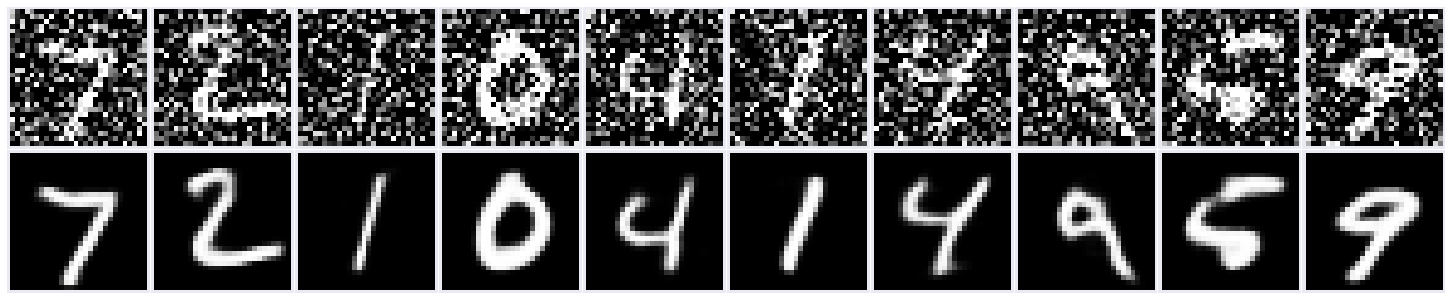

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = sess.run(decoded, feed_dict={inputs_: noisy_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)